# Librerías

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np
from collections import Counter

# Visualización de datos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno

# Expresiones regulares
import re
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
from scipy.stats import ttest_ind
import unicodedata
from unidecode import unidecode

import random
import os

import ipywidgets as widgets
# from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Cargar datos

In [2]:
# Ruta de la carpeta que contiene los archivos
path = "DATA/"
# Verificar si los archivos están en la carpeta
ficheros = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))]

dict_archivos = {}
print("Los archivos de la carpeta `data` son: ")
for file in ficheros:
    if file.endswith(('.csv')):
        print(file)
        if file.endswith('.csv'):
            df = pd.read_csv(path + file)
            dict_archivos[file] = df
print("-"*50)
nuevo_dict = {}
print("Los DataFrames con los que vamos a trabajar son:")
for k,v in dict_archivos.items():
    k_2 = "_".join(list(k.split ("_"))[1:-1])
    if len(str(k_2))<1: pass
    else:
        k_3= "df_" + k_2
        print (k_3)
        nuevo_dict[k_3] = v



Los archivos de la carpeta `data` son: 
df_EDA.csv
df_olist_dataset.csv
olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv
--------------------------------------------------
Los DataFrames con los que vamos a trabajar son:
df_olist
df_customers
df_geolocation
df_orders
df_order_items
df_order_payments
df_order_reviews
df_products
df_sellers
df_category_name


# Función exploración inicial

In [3]:
def exploracion_inicial(df, tipo=None):
    if tipo == 'version_lite':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n########################################################################################')

    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n=5))
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos?")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n########################################################################################')

        print("¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df.info())
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')

        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df.describe(include='all').fillna(''))
        print('\n########################################################################################')

        print("¿Hay valores nulos en el conjunto de datos?")
        print(df.isnull().sum().sort_values(ascending=False))
        print('\n########################################################################################')

        print("¿Cuál es el porcentaje de valores nulos en cada columna?")
        print(round((df.isnull().sum() / len(df) * 100), 2).sort_values(ascending=False))
        print('\n########################################################################################')

        # --> Comprobación de duplicados al final <--
        print("¿Cuántas filas duplicadas hay?")
        num_duplicados = df.duplicated().sum()
        if num_duplicados > 0:
            print(f"\tHay {num_duplicados:,} filas duplicadas.")
        else:
            print("\tNo hay filas duplicadas.")
        print('\n########################################################################################')

In [4]:
df = nuevo_dict['df_olist']

exploracion_inicial(df)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 115,021 filas y 39 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                    2018-08-13  af07308b275d755c9edb36a90c618231   
4                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city customer_state  order_item_id  \
0                      3149     sao paulo             SP              1   
1                      3149     sao paulo             SP              1   
2                      3149     sao paulo             SP              1   
3                     47813     barreiras             BA              1   
4                     75265    vianopolis             GO              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-10-06 11:07:15   29.99           8.72                 1.0   
1  2017-10-06 11:07:15   29.99           8.72                 3.0   
2  2017-10-06 11:07:15   29.99           8.72                 2.0   
3  2018-07-30 03:24:27  118.70          22.76                 1.0   
4  2018-08-13 08:55:23  159.90          19.22                 1.0   

  payment_type  payment_installments  payment_value  \
0  credit_card                   1.0          18.12   
1      voucher                   1.0           2.00   
2      voucher                   1.0          18.59   
3       boleto                   1.0         141.46   
4  credit_card                   3.0         179.12   

                          review_id  review_score review_comment_title  \
0  a54f0611adc9ed256b57ede6b6eb5114           4.0                  NaN   
1  a54f0611adc9ed256b57ede6b6eb5114           4.0                  NaN   
2  a54f0611adc9ed256b57ede6b6eb5114           4.0                  NaN   
3  8d5266042046a06655c8db133d120ba5           4.0     Muito boa a loja   
4  e73b67b67587f7644d5bd1a52deb1b01           5.0                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
2  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
3             


########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


order_id                       customer_id  \
115016  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
115017  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
115018  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
115019  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
115020  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
115016    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
115017    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
115018    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
115019    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
115020    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
115016          2018-02-07 23:22:42           2018-02-28 17:37:56   
115017          2017-08-28 20:52:26           2017-09-21 11:24:17   
115018          2018-01-12 15:35:03           2018-01-25 23:32:54   
115019          2018-01-12 15:35:03           2018-01-25 23:32:54   
115020          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
115016                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
115017                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
115018                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
115019                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
115020                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix customer_city customer_state  order_item_id  \
115016                     11722  praia grande             SP              1   
115017                     45920   nova vicosa             BA              1   
115018                     28685       japuiba             RJ              1   
115019                     28685       japuiba             RJ              2   
115020                     83750          lapa             PR              1   

                              product_id                         seller_id  \
115016  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
115017  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
115018  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
115019  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
115020  006619bbed68b000c8ba3f8725d5409e  ececbfcff9804a2d6b40f589df8eef2b   

        shipping_limit_date   price  freight_value  payment_sequential  \
115016  2018-02-12 13:10:37  174.90          20.10                 1.0   
115017  2017-09-05 15:04:16  205.99          65.02                 1.0   
115018  2018-01-12 21:36:21  179.99          40.59                 1.0   
115019  2018-01-12 21:36:21  179.99          40.59                 1.0   
115020  2018-03-15 10:55:42   68.50          18.36                 1.0   

       payment_type  payment_installments  payment_value  \
115016  credit_card                   3.0         195.00   
115017  credit_card                   5.0         271.01   
115018  credit_card                   4.0         441.16   
115019  credit_card                   4.0         441.16   
115020   debit_card                   1.0          86.86   

                               review_id  review_score review_comment_title  \
115016  29bb71b2760d0f876dfa178a76bc4734           4.0                  NaN   
115017  371579771219f6db2d830d50805977bb           5.0                  NaN   
115018  8ab6855b9fe9b812cd03a480a25058a1           2.0                  NaN   
115019  8ab6855b9fe9b812cd03a480a25058a1           2.0                  NaN   
115020  dc9c59b4688062c25758c2be4cafc523           5.0                  NaN   

                                   review_comment_message


########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


order_id                       customer_id  \
101479  3296617b0f860015465b3259c42115b2  4c0db677ace7cfb1bc3b297422510dea   
29236   6e116aaaf479cdcaa8a1262489a07086  4358412d9f188946dff16379af43b066   
75580   353452698ed9b7e594c057af6d63c95f  ac754190c3f23c6d841cf343b56d8e71   
109715  0ff2dbf70542c665c17ad70b80d48a46  70315a20f74f1cf4c30ce5044078e77b   
46414   1728847cf9a9a8c5f57a2e38bec5ecf9  12ef26e7646470fe563e9fb2a28b837f   

       order_status order_purchase_timestamp    order_approved_at  \
101479    delivered      2017-11-20 11:27:40  2017-11-21 03:46:28   
29236     delivered      2018-03-21 12:11:57  2018-03-21 12:27:52   
75580     delivered      2017-07-14 18:29:40  2017-07-14 18:43:51   
109715    delivered      2018-04-08 13:53:55  2018-04-08 14:10:28   
46414     delivered      2018-07-10 12:15:42  2018-07-10 12:30:21   

       order_delivered_carrier_date order_delivered_customer_date  \
101479          2017-11-27 16:34:51           2017-12-04 17:58:56   
29236           2018-03-23 22:17:20           2018-03-29 20:41:59   
75580           2017-07-21 21:43:39           2017-07-31 19:27:48   
109715          2018-04-11 22:30:41           2018-04-28 15:04:55   
46414           2018-07-12 06:54:00           2018-07-15 16:13:38   

       order_estimated_delivery_date                customer_unique_id  \
101479                    2017-12-12  cba22aad59713df65fb10fbf657eacf8   
29236                     2018-04-11  e00e8d6baa14e557360a8680eace8b45   
75580                     2017-08-07  8f567321ba12101dedc07c70b7021069   
109715                    2018-05-02  4aab7537dbb1db082c9c294d404efaa0   
46414                     2018-07-18  d44f553a3663a6323c901cf1f0a47c87   

        customer_zip_code_prefix customer_city customer_state  order_item_id  \
101479                     99052   passo fundo             RS              1   
29236                       4049     sao paulo             SP              1   
75580                      36500           uba             MG              1   
109715                     79610   tres lagoas             MS              2   
46414                       8021     sao paulo             SP              2   

                              product_id                         seller_id  \
101479  dee98cc0394b12aefccbad334b415c10  b1fc4f64df5a0e8b6913ab38803c57a9   
29236   ebe0908b88b8280a543507871218669b  15ead3a5037a918ddb520dfe39a3d2b9   
75580   fe6f03cedd96bcbc5c8726c5963fd35c  1900267e848ceeba8fa32d80c1a5f5a8   
109715  47142ed1919db60640a061ee6dabb534  1554a68530182680ad5c8b042c3ab563   
46414   21d63115435202a00f15d5e4803ce982  99a54764c341d5dc80b4a8fac4eba3fb   

        shipping_limit_date  price  freight_value  payment_sequential  \
101479  2017-11-27 03:46:28  55.00          16.83                 1.0   
29236   2018-03-27 12:27:52  29.00          18.23                 3.0   
75580   2017-07-20 18:43:51  54.99          19.20                 1.0   
109715  2018-04-12 14:10:28  29.90          23.28                 1.0   
46414   2018-07-12 12:30:21  36.50          15.56                 1.0   

       payment_type  payment_installments  payment_value  \
101479       boleto                   1.0          71.83   
29236       voucher                   1.0           7.31   
75580   credit_card                   4.0         216.89   
109715  credit_card                   2.0         106.36   
46414   credit_card                   6.0         104.12   

                               review_id  review_score review_comment_title  \
101479  49569077f66bc9767b7ec9a050b0d4c2           5.0                  NaN   
29236   ff1c2839f32444b1976d90298dbfadab           5.0                  NaN   
75580   6257afefd3375b84250ac12e3d3009c7           1.0                  NaN   
109715  5edf1a3210c8aee9e423baf7008e40d6           1.0     Compre 2, Leve 1   
46414   db931d490d3154a37bf16052a701cc1b           4.0                  NaN   

                                   review_comment_message  \
10


########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - customer_id
	 - order_status
	 - order_purchase_timestamp
	 - order_approved_at
	 - order_delivered_carrier_date
	 - order_delivered_customer_date
	 - order_estimated_delivery_date
	 - customer_unique_id
	 - customer_zip_code_prefix
	 - customer_city
	 - customer_state
	 - order_item_id
	 - product_id
	 - seller_id
	 - shipping_limit_date
	 - price
	 - freight_value
	 - payment_sequential
	 - payment_type
	 - payment_installments
	 - payment_value
	 - review_id
	 - review_score
	 - review_comment_title
	 - review_comment_message
	 - review_creation_date
	 - review_answer_timestamp
	 - product_category_name
	 - product_name_lenght
	 - product_description_lenght
	 - product_photos_qty
	 - product_weight_g
	 - product_length_cm
	 - product_height_cm
	 - product_width_cm
	 - seller_zip_code_prefix
	 - seller_city
	 - seller_state

######

order_id                       customer_id  \
count                             115021                            115021   
unique                             96461                             96461   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   
mean                                                                         
std                                                                          
min                                                                          
25%                                                                          
50%                                                                          
75%                                                                          
max                                                                          

       order_status order_purchase_timestamp    order_approved_at  \
count        115021                   115021               115021   
unique            2                    95939                88272   
top       delivered      2017-08-08 20:26:31  2017-08-08 20:43:31   
freq         115014                       63                   63   
mean                                                                
std                                                                 
min                                                                 
25%                                                                 
50%                                                                 
75%                                                                 
max                                                                 

       order_delivered_carrier_date order_delivered_customer_date  \
count                        115021                        115021   
unique                        80100                         95649   
top             2017-08-10 11:58:14           2017-08-14 12:46:18   
freq                             63                            63   
mean                                                                
std                                                                 
min                                                                 
25%                                                                 
50%                                                                 
75%                                                                 
max                                                                 

       order_estimated_delivery_date                customer_unique_id  \
count                         115021                            115021   
unique                           445                             93342   
top                       2017-12-20  9a736b248f67d166d2fbb006bcb877c3   
freq                             640                                75   
mean                                                                     
std                                                                      
min                                                                      
25%                                                                      
50%                                                                      
75%                                                                      
max                                                                      

       customer_zip_code_prefix customer_city customer_state order_item_id  \
count                  115021.0        115021         115021      115021.0   
unique                                   4085             27                 
top                                 sao paulo             SP                 
freq                                    18163          48514                 
mean               35081.074908                                   1.196425   
std                29851.321681                                   0.699425   
mi


########################################################################################
¿Hay valores nulos en el conjunto de datos?
review_comment_title             101460
review_comment_message            67193
product_name_lenght                1627
product_photos_qty                 1627
product_description_lenght         1627
review_id                           861
review_score                        861
review_answer_timestamp             861
review_creation_date                861
product_width_cm                     20
product_height_cm                    20
product_length_cm                    20
product_weight_g                     20
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
product_category_name                 0
seller_zip_code_prefix                0
seller_city                           0
order_id                              0
customer_id               

# Normalización de columnas

## **`product_category`**

Se utilizó `df_categorias` para traducir `df['product_category_name']` a inglés.  
Al detectar algunas categorías faltantes, las creamos y realizamos un merge.  
La nueva columna con las categorías en inglés es `product_category`.

In [5]:
df['product_category_name'].unique()

array(['utilidades_domesticas', 'perfumaria', 'automotivo', 'pet_shop',
       'papelaria', 'moveis_decoracao', 'moveis_escritorio',
       'ferramentas_jardim', 'informatica_acessorios', 'cama_mesa_banho',
       'brinquedos', 'construcao_ferramentas_construcao', 'telefonia',
       'beleza_saude', 'eletronicos', 'bebes', 'cool_stuff',
       'relogios_presentes', 'climatizacao', 'esporte_lazer',
       'livros_interesse_geral', 'eletroportateis', 'alimentos',
       'malas_acessorios', 'fashion_underwear_e_moda_praia', 'Other',
       'fashion_bolsas_e_acessorios', 'instrumentos_musicais',
       'construcao_ferramentas_iluminacao', 'livros_tecnicos',
       'construcao_ferramentas_jardim', 'eletrodomesticos',
       'market_place', 'agro_industria_e_comercio', 'artigos_de_festas',
       'casa_conforto', 'cds_dvds_musicais',
       'industria_comercio_e_negocios', 'consoles_games', 'moveis_quarto',
       'construcao_ferramentas_seguranca', 'telefonia_fixa', 'bebidas',
       'movei

In [6]:
df_categorias = nuevo_dict['df_category_name']

In [7]:
df_categorias.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [8]:
df_categorias['product_category_name'].unique()


array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [9]:
print(set(df['product_category_name'].unique()) - set(df_categorias['product_category_name'].unique()))

{'pc_gamer', 'Other', 'portateis_cozinha_e_preparadores_de_alimentos'}


In [10]:
# Categorías que faltan en df_categorias
faltantes = pd.DataFrame({
    'product_category_name': [
        'pc_gamer',
        'portateis_cozinha_e_preparadores_de_alimentos',
        'Other'
    ],
    'product_category_name_english': [
        'pc_gamer',
        'kitchen_portables_and_food_preparers',
        'Other'
    ]
})

In [11]:
# Combinamos con df_categorias
df_categorias = pd.concat([df_categorias, faltantes], ignore_index=True)

In [12]:
# Unimos con df para agregar traducción
df = df.merge(df_categorias, on='product_category_name', how='left')

In [13]:
df = df.rename(columns={'product_category_name_english': 'product_category'})

Se comprueba que no haya nulos en la columna `product_category`

In [14]:
df[df['product_category'].isnull()]

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, payment_sequential, payment_type, payment_installments, payment_value, review_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, seller_zip_code_prefix, seller_city, seller_state, product_category]
Index: []

In [15]:
exploracion_inicial(df, tipo= None)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 115,021 filas y 40 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                    2018-08-13  af07308b275d755c9edb36a90c618231   
4                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city customer_state  order_item_id  \
0                      3149     sao paulo             SP              1   
1                      3149     sao paulo             SP              1   
2                      3149     sao paulo             SP              1   
3                     47813     barreiras             BA              1   
4                     75265    vianopolis             GO              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-10-06 11:07:15   29.99           8.72                 1.0   
1  2017-10-06 11:07:15   29.99           8.72                 3.0   
2  2017-10-06 11:07:15   29.99           8.72                 2.0   
3  2018-07-30 03:24:27  118.70          22.76                 1.0   
4  2018-08-13 08:55:23  159.90          19.22                 1.0   

  payment_type  payment_installments  payment_value  \
0  credit_card                   1.0          18.12   
1      voucher                   1.0           2.00   
2      voucher                   1.0          18.59   
3       boleto                   1.0         141.46   
4  credit_card                   3.0         179.12   

                          review_id  review_score review_comment_title  \
0  a54f0611adc9ed256b57ede6b6eb5114           4.0                  NaN   
1  a54f0611adc9ed256b57ede6b6eb5114           4.0                  NaN   
2  a54f0611adc9ed256b57ede6b6eb5114           4.0                  NaN   
3  8d5266042046a06655c8db133d120ba5           4.0     Muito boa a loja   
4  e73b67b67587f7644d5bd1a52deb1b01           5.0                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
2  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
3             


########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


order_id                       customer_id  \
115016  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
115017  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
115018  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
115019  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
115020  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
115016    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
115017    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
115018    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
115019    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
115020    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
115016          2018-02-07 23:22:42           2018-02-28 17:37:56   
115017          2017-08-28 20:52:26           2017-09-21 11:24:17   
115018          2018-01-12 15:35:03           2018-01-25 23:32:54   
115019          2018-01-12 15:35:03           2018-01-25 23:32:54   
115020          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
115016                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
115017                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
115018                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
115019                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
115020                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix customer_city customer_state  order_item_id  \
115016                     11722  praia grande             SP              1   
115017                     45920   nova vicosa             BA              1   
115018                     28685       japuiba             RJ              1   
115019                     28685       japuiba             RJ              2   
115020                     83750          lapa             PR              1   

                              product_id                         seller_id  \
115016  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
115017  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
115018  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
115019  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
115020  006619bbed68b000c8ba3f8725d5409e  ececbfcff9804a2d6b40f589df8eef2b   

        shipping_limit_date   price  freight_value  payment_sequential  \
115016  2018-02-12 13:10:37  174.90          20.10                 1.0   
115017  2017-09-05 15:04:16  205.99          65.02                 1.0   
115018  2018-01-12 21:36:21  179.99          40.59                 1.0   
115019  2018-01-12 21:36:21  179.99          40.59                 1.0   
115020  2018-03-15 10:55:42   68.50          18.36                 1.0   

       payment_type  payment_installments  payment_value  \
115016  credit_card                   3.0         195.00   
115017  credit_card                   5.0         271.01   
115018  credit_card                   4.0         441.16   
115019  credit_card                   4.0         441.16   
115020   debit_card                   1.0          86.86   

                               review_id  review_score review_comment_title  \
115016  29bb71b2760d0f876dfa178a76bc4734           4.0                  NaN   
115017  371579771219f6db2d830d50805977bb           5.0                  NaN   
115018  8ab6855b9fe9b812cd03a480a25058a1           2.0                  NaN   
115019  8ab6855b9fe9b812cd03a480a25058a1           2.0                  NaN   
115020  dc9c59b4688062c25758c2be4cafc523           5.0                  NaN   

                                   review_comment_message


########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


order_id                       customer_id  \
31837  9f1d354d0b38456cb1333c100e1388c5  019681cd120e7fe89ebdd06172639f58   
12080  bf5d8018171eeb0788be7f1c871eb981  704fb26a9d85d9ad8fd8b167eee000fd   
84110  94d319613cd8c3813cf10449f6049e18  5d31ddffc029174e9dac6e1fdb4f75a7   
32822  c5e79fde963dea8e49adf06e70fefa9f  f8125bb662b6ef384d35dd00b3d64c9d   
71246  f81cffddbb8c9cf0ccdd3a5a4161aa64  88249ff04a01057d1b13027553b56207   

      order_status order_purchase_timestamp    order_approved_at  \
31837    delivered      2017-09-06 12:16:44  2017-09-07 10:34:16   
12080    delivered      2017-07-26 00:34:16  2017-07-26 00:45:10   
84110    delivered      2017-06-19 13:35:55  2017-06-19 13:50:08   
32822    delivered      2017-10-04 15:20:19  2017-10-04 15:28:26   
71246    delivered      2018-06-07 12:47:10  2018-06-07 13:17:40   

      order_delivered_carrier_date order_delivered_customer_date  \
31837          2017-09-08 16:07:44           2017-09-18 21:42:41   
12080          2017-07-26 19:13:52           2017-08-04 18:07:43   
84110          2017-06-20 14:54:24           2017-06-27 15:19:41   
32822          2017-10-05 18:53:51           2017-10-09 23:52:43   
71246          2018-06-18 12:53:00           2018-06-21 13:56:31   

      order_estimated_delivery_date                customer_unique_id  \
31837                    2017-10-04  32b55e3ff7aff85f38bd91db0e006b30   
12080                    2017-08-17  aff615cb1dd35d6595b30bf00097e2eb   
84110                    2017-07-07  4232024117e4618d2cfdc07c30b5d3c7   
32822                    2017-10-27  0e02d417b7a168e2916625d2cc43482f   
71246                    2018-07-12  f85e0629ac347fb05bf71cc997ddccd5   

       customer_zip_code_prefix         customer_city customer_state  \
31837                     78600       barra do garcas             MT   
12080                     19400  presidente venceslau             SP   
84110                     12721              cruzeiro             SP   
32822                      2420             sao paulo             SP   
71246                     98200               ibiruba             RS   

       order_item_id                        product_id  \
31837              2  265928225c1358e74bf8668ff65096f3   
12080              1  af4e4eefc358246062956d3d2930e6f8   
84110              2  20f160a9cf2e856ee5eba259e9ae33f9   
32822              1  e8c6039a25765995ac7c1ec2cbef5765   
71246              1  cf69d780077ed6cd5369b53aa63cd0d3   

                              seller_id  shipping_limit_date   price  \
31837  5160d23075764e18e07c1f4a87fad743  2017-09-13 10:34:16   75.00   
12080  46dc3b2cc0980fb8ec44634e21d2718e  2017-08-01 00:45:10  229.99   
84110  17e34d8224d27a541263c4c64b11a56b  2017-06-23 13:50:08  167.92   
32822  3d871de0142ce09b7081e2b9d1733cb1  2017-10-10 15:28:26   19.90   
71246  5882820ef11c4c068eea0677a7a879b4  2018-06-21 13:17:40  790.00   

       freight_value  payment_sequential payment_type  payment_installments  \
31837           9.71                 1.0       boleto                   1.0   
12080          18.86                 1.0  credit_card                  10.0   
84110          12.68                 1.0  credit_card                  10.0   
32822          15.98                 1.0  credit_card                   1.0   
71246          37.00                 1.0  credit_card                  10.0   

       payment_value                         review_id  review_score  \
31837         198.90  f406ccc2e887b8c766f3c9bc26b45dc9           1.0   
12080         248.85  6f28490842d1cee592ee8c8a0c4e961d           5.0   
84110         361.20  b9c2479c35bad6760286fb00389815fd           4.0   
32822          35.88  588b6e91b1c2aaff5c1aa72bafd2a163           5.0   
71246         827.00  a63df13dd4070ad067843878459401b8           3.0   

      review_comment_title                             review_comment_message  \
31837                  NaN  Não recebi o produto, o site lannister informa...   
12080                  NaN


########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - customer_id
	 - order_status
	 - order_purchase_timestamp
	 - order_approved_at
	 - order_delivered_carrier_date
	 - order_delivered_customer_date
	 - order_estimated_delivery_date
	 - customer_unique_id
	 - customer_zip_code_prefix
	 - customer_city
	 - customer_state
	 - order_item_id
	 - product_id
	 - seller_id
	 - shipping_limit_date
	 - price
	 - freight_value
	 - payment_sequential
	 - payment_type
	 - payment_installments
	 - payment_value
	 - review_id
	 - review_score
	 - review_comment_title
	 - review_comment_message
	 - review_creation_date
	 - review_answer_timestamp
	 - product_category_name
	 - product_name_lenght
	 - product_description_lenght
	 - product_photos_qty
	 - product_weight_g
	 - product_length_cm
	 - product_height_cm
	 - product_width_cm
	 - seller_zip_code_prefix
	 - seller_city
	 - seller_state
	 - pro

order_id                       customer_id  \
count                             115021                            115021   
unique                             96461                             96461   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   
mean                                                                         
std                                                                          
min                                                                          
25%                                                                          
50%                                                                          
75%                                                                          
max                                                                          

       order_status order_purchase_timestamp    order_approved_at  \
count        115021                   115021               115021   
unique            2                    95939                88272   
top       delivered      2017-08-08 20:26:31  2017-08-08 20:43:31   
freq         115014                       63                   63   
mean                                                                
std                                                                 
min                                                                 
25%                                                                 
50%                                                                 
75%                                                                 
max                                                                 

       order_delivered_carrier_date order_delivered_customer_date  \
count                        115021                        115021   
unique                        80100                         95649   
top             2017-08-10 11:58:14           2017-08-14 12:46:18   
freq                             63                            63   
mean                                                                
std                                                                 
min                                                                 
25%                                                                 
50%                                                                 
75%                                                                 
max                                                                 

       order_estimated_delivery_date                customer_unique_id  \
count                         115021                            115021   
unique                           445                             93342   
top                       2017-12-20  9a736b248f67d166d2fbb006bcb877c3   
freq                             640                                75   
mean                                                                     
std                                                                      
min                                                                      
25%                                                                      
50%                                                                      
75%                                                                      
max                                                                      

       customer_zip_code_prefix customer_city customer_state order_item_id  \
count                  115021.0        115021         115021      115021.0   
unique                                   4085             27                 
top                                 sao paulo             SP                 
freq                                    18163          48514                 
mean               35081.074908                                   1.196425   
std                29851.321681                                   0.699425   
mi


########################################################################################
¿Hay valores nulos en el conjunto de datos?
review_comment_title             101460
review_comment_message            67193
product_description_lenght         1627
product_photos_qty                 1627
product_name_lenght                1627
review_score                        861
review_creation_date                861
review_answer_timestamp             861
review_id                           861
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
payment_value                         3
payment_sequential                    3
payment_type                          3
payment_installments                  3
product_category_name                 0
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0
order_id                  

## Fecha

Se estandarizan las columnas de fecha del DataFrame, asegurando que todas estén correctamente formateadas como `datetime`.

A partir de ellas, se generan variables temporales para análisis exploratorio y patrones de comportamiento a lo largo del tiempo.

También se calculan métricas clave del proceso logístico, como tiempos de aprobación, preparación, envío y retraso en la entrega.  

Se comprueba que las transformaciones no generen datos nulos.

In [16]:
def fecha_procesada(df, variable_analisis):
    # Verificamos si hay al menos un valor con hora en la columna
    contiene_hora = df[variable_analisis].astype(str).str.contains(r'\d{2}:\d{2}:\d{2}').any()

    # Aplicamos el formato adecuado según el contenido
    if contiene_hora:
        df[variable_analisis + '_procesada'] = pd.to_datetime(df[variable_analisis], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    else:
        df[variable_analisis + '_procesada'] = pd.to_datetime(df[variable_analisis], format='%Y-%m-%d', errors='coerce')

    # Contar valores nulos después de la conversión
    nulos = df[variable_analisis + '_procesada'].isnull().sum()
    print(f"Número de valores nulos en '{variable_analisis}_procesada': {nulos}")

    # Sustituimos la columna original y eliminamos la auxiliar
    df[variable_analisis] = df[variable_analisis + '_procesada']
    df.drop(columns=[variable_analisis + '_procesada'], inplace=True)

In [17]:
fecha_procesada_purchase = fecha_procesada(df, variable_analisis= 'order_purchase_timestamp')
fecha_procesada_approved_at = fecha_procesada(df, variable_analisis= 'order_approved_at')
fecha_procesada_delivered_carrier_date= fecha_procesada(df, variable_analisis= 'order_delivered_carrier_date')
fecha_procesada_delivered_customer_date= fecha_procesada(df, variable_analisis= 'order_delivered_customer_date')
fecha_procesada_order_estimated_delivery_date = fecha_procesada(df, variable_analisis= 'order_estimated_delivery_date')
fecha_procesada_shipping_limit_date = fecha_procesada(df, variable_analisis= 'shipping_limit_date')

Número de valores nulos en 'order_purchase_timestamp_procesada': 0
Número de valores nulos en 'order_approved_at_procesada': 0
Número de valores nulos en 'order_delivered_carrier_date_procesada': 0
Número de valores nulos en 'order_delivered_customer_date_procesada': 0
Número de valores nulos en 'order_estimated_delivery_date_procesada': 0
Número de valores nulos en 'shipping_limit_date_procesada': 0


In [18]:
df[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date' , 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115021 entries, 0 to 115020
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       115021 non-null  datetime64[ns]
 1   order_approved_at              115021 non-null  datetime64[ns]
 2   order_delivered_carrier_date   115021 non-null  datetime64[ns]
 3   order_delivered_customer_date  115021 non-null  datetime64[ns]
 4   order_estimated_delivery_date  115021 non-null  datetime64[ns]
 5   shipping_limit_date            115021 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 5.3 MB


In [19]:
df['order_purchase_timestamp'].head()

0   2017-10-02 10:56:33
1   2017-10-02 10:56:33
2   2017-10-02 10:56:33
3   2018-07-24 20:41:37
4   2018-08-08 08:38:49
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [20]:
df['day_of_month'] = df['order_purchase_timestamp'].dt.day
df['hour'] = df['order_purchase_timestamp'].dt.hour
df['month'] = df['order_purchase_timestamp'].dt.month
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
df['day_of_week'] = df['order_purchase_timestamp'].dt.day_name()

In [21]:
df[['order_purchase_timestamp','hour', 'day_of_week','day_of_month', 'month', 'month_year']].head()

order_purchase_timestamp  hour day_of_week  day_of_month  month month_year
0      2017-10-02 10:56:33    10      Monday             2     10    2017-10
1      2017-10-02 10:56:33    10      Monday             2     10    2017-10
2      2017-10-02 10:56:33    10      Monday             2     10    2017-10
3      2018-07-24 20:41:37    20     Tuesday            24      7    2018-07
4      2018-08-08 08:38:49     8   Wednesday             8      8    2018-08

In [22]:
df['processing_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['approval_time'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.days
df['prep_time'] = (df['order_delivered_carrier_date'] - df['order_approved_at']).dt.days
df['shipping_late_days'] = (df['order_delivered_carrier_date'] - df['shipping_limit_date']).dt.days

In [23]:
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
df['on_time'] = df['delivery_delay'] <= 0
df['late_delivery'] = df['delivery_delay'] > 0

In [24]:
df['on_time'].dtype

dtype('bool')

In [25]:
df[['processing_time', 'approval_time', 'prep_time', 'shipping_late_days', 'delivery_delay','on_time', 'late_delivery']].head()

processing_time  approval_time  prep_time  shipping_late_days  \
0                8              0          2                  -2   
1                8              0          2                  -2   
2                8              0          2                  -2   
3               13              1          0                  -4   
4                9              0          0                  -5   

   delivery_delay  on_time  late_delivery  
0              -8     True          False  
1              -8     True          False  
2              -8     True          False  
3              -6     True          False  
4             -18     True          False

## Geográficas

Se agrupan los estados de clientes y vendedores en regiones geográficas de Brasil para facilitar los análisis por zona;  
estas categorías se almacenan en las columnas `customer_region` y `seller_region`.

Se traducen los códigos de estado a sus nombres completos para mejorar la legibilidad y facilitar la interpretación;  
los resultados se almacenan en las columnas `customer_full_state` y `seller_full_state`.

Estas transformaciones permiten interpretar y visualizar la información territorial de manera más intuitiva y estructurada.

In [26]:
df["customer_state"].unique()

array(['SP', 'BA', 'GO', 'RN', 'PR', 'RJ', 'RS', 'MG', 'SC', 'RR', 'PE',
       'TO', 'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'RO', 'ES', 'AP', 'MS',
       'MA', 'PI', 'AL', 'AC', 'AM'], dtype=object)

In [27]:
region_map = {
"SP": "Sudeste", "RJ": "Sudeste", "MG": "Sudeste", "ES": "Sudeste",
"PR": "Sur", "SC": "Sur", "RS": "Sur",
"DF": "Centro-Oeste", "GO": "Centro-Oeste", "MS": "Centro-Oeste", "MT": "Centro-Oeste",
"BA": "Nordeste", "PE": "Nordeste", "CE": "Nordeste", "MA": "Nordeste",
"PB": "Nordeste", "RN": "Nordeste", "AL": "Nordeste", "SE": "Nordeste", "PI": "Nordeste",
"AM": "Norte", "PA": "Norte", "TO": "Norte", "RO": "Norte", "RR": "Norte",
"AP": "Norte", "AC": "Norte"
}

df["customer_region"] = df["customer_state"].map(region_map)
df["seller_region"] = df["seller_state"].map(region_map)

In [28]:
brazilian_states = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}
df['customer_full_state'] = df['customer_state'].map(brazilian_states)
df["seller_full_state"] = df["seller_state"].map(brazilian_states)

In [29]:
df[['customer_state','customer_full_state', 'customer_region', 'seller_state', 'seller_full_state', 'seller_region']].head()

customer_state customer_full_state customer_region seller_state  \
0             SP           São Paulo         Sudeste           SP   
1             SP           São Paulo         Sudeste           SP   
2             SP           São Paulo         Sudeste           SP   
3             BA               Bahia        Nordeste           SP   
4             GO               Goiás    Centro-Oeste           SP   

  seller_full_state seller_region  
0         São Paulo       Sudeste  
1         São Paulo       Sudeste  
2         São Paulo       Sudeste  
3         São Paulo       Sudeste  
4         São Paulo       Sudeste

## Agrupación de pedidos: productos, cuotas, tipo de pago, precio ticket, beneficio ticket

En este bloque se crean varias columnas clave para analizar la estructura de los pedidos y los patrones de pago. A continuación se detallan las columnas generadas y su propósito:

1. **`max_order_item_id`**: Identifica el artículo con el identificador más alto en cada pedido, lo cual es esencial para conocer la cantidad de productos involucrados en cada transacción y analizar las características de los mismos.

2. **`max_payment_sequential`**: Captura el número máximo de pagos realizados en un solo pedido. Este dato es útil para estudiar el comportamiento de pago del cliente, como los pagos fraccionados o la modalidad de pago por cuotas.

3. **`most_frequent_payment_type`**: Determina el tipo de pago más común dentro de cada pedido. Esto permite identificar las preferencias del cliente con respecto a los métodos de pago, y puede ayudar a optimizar las opciones de pago disponibles.

4. **`precio_ticket`**: Representa el valor total de cada pedido, calculado sumando los montos de los pagos realizados. Esta columna es fundamental para el análisis de la facturación total de cada cliente.

5. **`beneficio_ticket`**: Calcula el beneficio neto de cada pedido, restando el costo total de los productos y el costo de envío al valor recibido en los pagos. Este valor es crítico para evaluar la rentabilidad de los pedidos y ajustar estrategias de precios y costos.

Estas columnas permiten obtener una comprensión más profunda del comportamiento de compra de los clientes, las preferencias de pago y la rentabilidad de cada pedido. Además, facilitan el análisis de tendencias que pueden ser cruciales para la optimización de las operaciones de venta y la toma de decisiones estratégicas.

In [30]:
df["max_order_item_id"] = df.groupby("order_id")["order_item_id"].transform("max")

In [31]:
df[df['order_id']== '68e48e68da1f50f7c5838ea75e3a20dd'][['order_id','order_item_id', 'max_order_item_id']]

order_id  order_item_id  max_order_item_id
76  68e48e68da1f50f7c5838ea75e3a20dd              1                  4
77  68e48e68da1f50f7c5838ea75e3a20dd              2                  4
78  68e48e68da1f50f7c5838ea75e3a20dd              3                  4
79  68e48e68da1f50f7c5838ea75e3a20dd              4                  4

In [32]:
df["max_payment_sequential"] = df.groupby("order_id")["payment_sequential"].transform("max")

In [33]:
df[df['order_id']== 'e481f51cbdc54678b7cc49136f2d6af7'][['order_id','payment_sequential', 'max_payment_sequential']]

order_id  payment_sequential  \
0  e481f51cbdc54678b7cc49136f2d6af7                 1.0   
1  e481f51cbdc54678b7cc49136f2d6af7                 3.0   
2  e481f51cbdc54678b7cc49136f2d6af7                 2.0   

   max_payment_sequential  
0                     3.0  
1                     3.0  
2                     3.0

In [34]:
df["most_frequent_payment_type"] = df.groupby("order_id")["payment_type"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

In [35]:
df[df['order_id']== 'e481f51cbdc54678b7cc49136f2d6af7'][['order_id','payment_type', 'most_frequent_payment_type']]

order_id payment_type most_frequent_payment_type
0  e481f51cbdc54678b7cc49136f2d6af7  credit_card                    voucher
1  e481f51cbdc54678b7cc49136f2d6af7      voucher                    voucher
2  e481f51cbdc54678b7cc49136f2d6af7      voucher                    voucher

In [36]:
df[df['order_id']=='68e48e68da1f50f7c5838ea75e3a20dd'][['order_id','payment_type','most_frequent_payment_type','payment_value', 'payment_sequential', 'payment_installments']]

order_id payment_type most_frequent_payment_type  \
76  68e48e68da1f50f7c5838ea75e3a20dd  credit_card                credit_card   
77  68e48e68da1f50f7c5838ea75e3a20dd  credit_card                credit_card   
78  68e48e68da1f50f7c5838ea75e3a20dd  credit_card                credit_card   
79  68e48e68da1f50f7c5838ea75e3a20dd  credit_card                credit_card   

    payment_value  payment_sequential  payment_installments  
76          392.6                 1.0                   3.0  
77          392.6                 1.0                   3.0  
78          392.6                 1.0                   3.0  
79          392.6                 1.0                   3.0

In [37]:
payment_sum = df.drop_duplicates(subset=["order_id", "payment_sequential"]).groupby("order_id")["payment_value"].sum()
df["precio_ticket"] = df["order_id"].map(payment_sum)


In [38]:
df[df['order_id']== 'e481f51cbdc54678b7cc49136f2d6af7'][['order_id','payment_sequential','payment_value', 'precio_ticket']]

order_id  payment_sequential  payment_value  \
0  e481f51cbdc54678b7cc49136f2d6af7                 1.0          18.12   
1  e481f51cbdc54678b7cc49136f2d6af7                 3.0           2.00   
2  e481f51cbdc54678b7cc49136f2d6af7                 2.0          18.59   

   precio_ticket  
0          38.71  
1          38.71  
2          38.71

In [39]:
df[df['order_id']=='e481f51cbdc54678b7cc49136f2d6af7'][['order_id', 'order_item_id','price', 'payment_type','payment_value', 'payment_sequential', 'payment_installments', 'precio_ticket']]

order_id  order_item_id  price payment_type  \
0  e481f51cbdc54678b7cc49136f2d6af7              1  29.99  credit_card   
1  e481f51cbdc54678b7cc49136f2d6af7              1  29.99      voucher   
2  e481f51cbdc54678b7cc49136f2d6af7              1  29.99      voucher   

   payment_value  payment_sequential  payment_installments  precio_ticket  
0          18.12                 1.0                   1.0          38.71  
1           2.00                 3.0                   1.0          38.71  
2          18.59                 2.0                   1.0          38.71

In [40]:
df[df['order_id']=='68e48e68da1f50f7c5838ea75e3a20dd'][['order_id', 'order_item_id','price', 'payment_type','payment_value', 'payment_sequential', 'payment_installments', 'precio_ticket']]

order_id  order_item_id  price payment_type  \
76  68e48e68da1f50f7c5838ea75e3a20dd              1   84.9  credit_card   
77  68e48e68da1f50f7c5838ea75e3a20dd              2   84.9  credit_card   
78  68e48e68da1f50f7c5838ea75e3a20dd              3   84.9  credit_card   
79  68e48e68da1f50f7c5838ea75e3a20dd              4   84.9  credit_card   

    payment_value  payment_sequential  payment_installments  precio_ticket  
76          392.6                 1.0                   3.0          392.6  
77          392.6                 1.0                   3.0          392.6  
78          392.6                 1.0                   3.0          392.6  
79          392.6                 1.0                   3.0          392.6

In [41]:
# Sumar price y freight_value por cada order_id y order_item_id único
price_sum = df.drop_duplicates(subset=["order_id", "order_item_id"]).groupby("order_id")["price"].sum()
freight_sum = df.drop_duplicates(subset=["order_id", "order_item_id"]).groupby("order_id")["freight_value"].sum()

# Calcular beneficio_ticket
df["beneficio_ticket"] = df["order_id"].map((payment_sum - price_sum - freight_sum).round(8))

In [42]:
df[df['order_id']== 'e481f51cbdc54678b7cc49136f2d6af7'][['order_id','payment_sequential','payment_value', 'precio_ticket', 'order_item_id', 'price', 'freight_value', 'beneficio_ticket']]

order_id  payment_sequential  payment_value  \
0  e481f51cbdc54678b7cc49136f2d6af7                 1.0          18.12   
1  e481f51cbdc54678b7cc49136f2d6af7                 3.0           2.00   
2  e481f51cbdc54678b7cc49136f2d6af7                 2.0          18.59   

   precio_ticket  order_item_id  price  freight_value  beneficio_ticket  
0          38.71              1  29.99           8.72               0.0  
1          38.71              1  29.99           8.72               0.0  
2          38.71              1  29.99           8.72               0.0

In [43]:
df[df['order_id']=='68e48e68da1f50f7c5838ea75e3a20dd'][['order_id', 'order_item_id','price', 'freight_value','payment_type','payment_value', 'payment_sequential', 'payment_installments', 'precio_ticket', 'beneficio_ticket']]

order_id  order_item_id  price  freight_value  \
76  68e48e68da1f50f7c5838ea75e3a20dd              1   84.9          13.25   
77  68e48e68da1f50f7c5838ea75e3a20dd              2   84.9          13.25   
78  68e48e68da1f50f7c5838ea75e3a20dd              3   84.9          13.25   
79  68e48e68da1f50f7c5838ea75e3a20dd              4   84.9          13.25   

   payment_type  payment_value  payment_sequential  payment_installments  \
76  credit_card          392.6                 1.0                   3.0   
77  credit_card          392.6                 1.0                   3.0   
78  credit_card          392.6                 1.0                   3.0   
79  credit_card          392.6                 1.0                   3.0   

    precio_ticket  beneficio_ticket  
76          392.6               0.0  
77          392.6               0.0  
78          392.6               0.0  
79          392.6               0.0

In [44]:
df[df['beneficio_ticket'] >10].head(2)

order_id                       customer_id  \
1939  239f380355f65dcb68551f07d16fc4a8  4150cf7549e3776c9c3c6b54349b23f3   
2004  4c57f545143e8865ca2347d8cba154a7  4d4f3df77247391775a95ca8bf017d8c   

     order_status order_purchase_timestamp   order_approved_at  \
1939    delivered      2018-06-26 15:00:56 2018-06-27 14:55:12   
2004    delivered      2018-01-26 11:21:04 2018-01-27 13:33:05   

     order_delivered_carrier_date order_delivered_customer_date  \
1939          2018-06-28 14:35:00           2018-07-13 20:48:26   
2004          2018-01-29 21:16:54           2018-02-01 17:54:56   

     order_estimated_delivery_date                customer_unique_id  \
1939                    2018-07-26  c0d2c6f28465444cbe3ad5d91418afe3   
2004                    2018-02-19  9be9d6e41cd2cc9833c427f13ac6bdda   

      customer_zip_code_prefix customer_city customer_state  order_item_id  \
1939                     41195      salvador             BA              1   
2004                      4184     sao paulo             SP              1   

                            product_id                         seller_id  \
1939  fbce4c4cb307679d89a3bf3d3bb353b9  c33847515fa6305ce6feb1e818569f13   
2004  cac9e5692471a0700418aa3400b9b2b1  7ea5bfa6c340f58f8e71fc1f0412b0d6   

     shipping_limit_date   price  freight_value  payment_sequential  \
1939 2018-07-03 14:55:12  149.00          73.63                 1.0   
2004 2018-02-01 13:31:42  124.99          14.62                 1.0   

     payment_type  payment_installments  payment_value  \
1939  credit_card                  10.0         251.63   
2004  credit_card                   6.0         151.01   

                             review_id  review_score review_comment_title  \
1939  6164683c7121ec0e2e63bbfc6db5f15d           5.0              Toalha    
2004  ae5434803f0d3564d51d9c208da2118d           5.0                  NaN   

                                 review_comment_message review_creation_date  \
1939  Recebi o produto antes do prazo, recomendo o b...           2018-07-14   
2004                                                NaN           2018-02-02   

     review_answer_timestamp product_category_name  product_name_lenght  \
1939     2018-07-15 18:37:52       cama_mesa_banho                 53.0   
2004     2018-02-02 23:16:55                 bebes                 57.0   

      product_description_lenght  product_photos_qty  product_weight_g  \
1939                       597.0                 1.0            6550.0   
2004                      2440.0                 1.0             375.0   

      product_length_cm  product_height_cm  product_width_cm  \
1939               30.0               30.0              30.0   
2004               29.0               14.0              20.0   

      seller_zip_code_prefix     seller_city seller_state product_category  \
1939                   88359         brusque           SC   bed_bath_table   
2004                   30180  belo horizonte           MG             baby   

      day_of_month  hour  month month_year day_of_week  processing_time  \
1939            26    15      6    2018-06     Tuesday               17   
2004            26    11      1    2018-01      Friday                6   

      approval_time  prep_time  shipping_late_days  delivery_delay  on_time  \
1939              0          0                  -6             -13     True   
2004              1          2                  -3             -18     True   

      late_delivery customer_region seller_region customer_full_state  \
1939          False        Nordeste           Sur               Bahia   
2004          False         Sudeste       Sudeste           São Paulo   

     seller_full_state  max_order_item_id  max_payment_sequential  \
1939    Santa Catarina                  1                     1.0   
2004      Minas Gerais                  1                     1.0   

     most_frequent_payment_type  precio_ticket  beneficio_ticket  
1939                c

In [45]:
df[df['order_id']=='4c57f545143e8865ca2347d8cba154a7'][['order_id', 'order_item_id','price','freight_value', 'payment_type','payment_value', 'payment_sequential', 'payment_installments', 'precio_ticket' ,  'beneficio_ticket']]

order_id  order_item_id   price  freight_value  \
2004  4c57f545143e8865ca2347d8cba154a7              1  124.99          14.62   

     payment_type  payment_value  payment_sequential  payment_installments  \
2004  credit_card         151.01                 1.0                   6.0   

      precio_ticket  beneficio_ticket  
2004         151.01              11.4

In [46]:
exploracion_inicial(df, tipo=None)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 115,021 filas y 61 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                    2018-08-13  af07308b275d755c9edb36a90c618231   
4                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city customer_state  order_item_id  \
0                      3149     sao paulo             SP              1   
1                      3149     sao paulo             SP              1   
2                      3149     sao paulo             SP              1   
3                     47813     barreiras             BA              1   
4                     75265    vianopolis             GO              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   

  shipping_limit_date   price  freight_value  payment_sequential payment_type  \
0 2017-10-06 11:07:15   29.99           8.72                 1.0  credit_card   
1 2017-10-06 11:07:15   29.99           8.72                 3.0      voucher   
2 2017-10-06 11:07:15   29.99           8.72                 2.0      voucher   
3 2018-07-30 03:24:27  118.70          22.76                 1.0       boleto   
4 2018-08-13 08:55:23  159.90          19.22                 1.0  credit_card   

   payment_installments  payment_value                         review_id  \
0                   1.0          18.12  a54f0611adc9ed256b57ede6b6eb5114   
1                   1.0           2.00  a54f0611adc9ed256b57ede6b6eb5114   
2                   1.0          18.59  a54f0611adc9ed256b57ede6b6eb5114   
3                   1.0         141.46  8d5266042046a06655c8db133d120ba5   
4                   3.0         179.12  e73b67b67587f7644d5bd1a52deb1b01   

   review_score review_comment_title  \
0           4.0                  NaN   
1           4.0                  NaN   
2           4.0                  NaN   
3           4.0     Muito boa a loja   
4           5.0                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
2  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
3                         


########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


order_id                       customer_id  \
115016  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
115017  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
115018  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
115019  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
115020  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
115016    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
115017    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
115018    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
115019    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
115020    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
115016          2018-02-07 23:22:42           2018-02-28 17:37:56   
115017          2017-08-28 20:52:26           2017-09-21 11:24:17   
115018          2018-01-12 15:35:03           2018-01-25 23:32:54   
115019          2018-01-12 15:35:03           2018-01-25 23:32:54   
115020          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
115016                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
115017                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
115018                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
115019                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
115020                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix customer_city customer_state  order_item_id  \
115016                     11722  praia grande             SP              1   
115017                     45920   nova vicosa             BA              1   
115018                     28685       japuiba             RJ              1   
115019                     28685       japuiba             RJ              2   
115020                     83750          lapa             PR              1   

                              product_id                         seller_id  \
115016  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
115017  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
115018  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
115019  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
115020  006619bbed68b000c8ba3f8725d5409e  ececbfcff9804a2d6b40f589df8eef2b   

       shipping_limit_date   price  freight_value  payment_sequential  \
115016 2018-02-12 13:10:37  174.90          20.10                 1.0   
115017 2017-09-05 15:04:16  205.99          65.02                 1.0   
115018 2018-01-12 21:36:21  179.99          40.59                 1.0   
115019 2018-01-12 21:36:21  179.99          40.59                 1.0   
115020 2018-03-15 10:55:42   68.50          18.36                 1.0   

       payment_type  payment_installments  payment_value  \
115016  credit_card                   3.0         195.00   
115017  credit_card                   5.0         271.01   
115018  credit_card                   4.0         441.16   
115019  credit_card                   4.0         441.16   
115020   debit_card                   1.0          86.86   

                               review_id  review_score review_comment_title  \
115016  29bb71b2760d0f876dfa178a76bc4734           4.0                  NaN   
115017  371579771219f6db2d830d50805977bb           5.0                  NaN   
115018  8ab6855b9fe9b812cd03a480a25058a1           2.0                  NaN   
115019  8ab6855b9fe9b812cd03a480a25058a1           2.0                  NaN   
115020  dc9c59b4688062c25758c2be4cafc523           5.0                  NaN   

                                   review_comment_message  \
115016  


########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


order_id                       customer_id  \
88137   e300f3511d8e46ed7e75b5bbc2e7958a  903dc81a0fdd7c15c763416420efdda7   
13086   36307ab4d5c4b59fbc4034d2adb2cb77  27ed9299eff7fddbfdd20337369ccfc8   
102563  a5ace85930526f2e2c1f06c2d3383e90  adfa31b007a919da559f665074d13474   
81561   86ab8c67b078c9f06af6425f03dc508f  ae6ab14831add8aba2de8b13d0ac1daf   
98322   52bf28ebedb0f11a3ba0efec670acd4e  cbfae93b97f390b17f150908bb37a570   

       order_status order_purchase_timestamp   order_approved_at  \
88137     delivered      2018-05-14 12:34:41 2018-05-14 12:52:26   
13086     delivered      2018-05-10 11:05:59 2018-05-10 11:36:17   
102563    delivered      2017-12-02 14:45:57 2017-12-02 15:01:07   
81561     delivered      2017-11-24 00:37:39 2017-11-24 01:10:44   
98322     delivered      2018-03-29 17:05:37 2018-03-29 17:30:57   

       order_delivered_carrier_date order_delivered_customer_date  \
88137           2018-05-15 10:45:00           2018-05-24 19:08:47   
13086           2018-05-10 15:18:00           2018-05-15 13:20:50   
102563          2017-12-04 18:58:13           2018-01-07 16:03:18   
81561           2017-11-30 15:59:42           2017-12-07 16:43:28   
98322           2018-04-02 21:56:26           2018-04-19 23:40:37   

       order_estimated_delivery_date                customer_unique_id  \
88137                     2018-06-07  3807a9ff75bf4012d9a3d069dc66ae92   
13086                     2018-05-29  87032343183c4a396d794003ed5f0efb   
102563                    2018-01-04  fbd7125bc18a4d2dc0261ec2afc8d02a   
81561                     2017-12-29  b7afc3a32c7c5ccbac116285bb835ac2   
98322                     2018-04-19  454ca78b1ee14c1a5095e268a2dabe9e   

        customer_zip_code_prefix      customer_city customer_state  \
88137                      59065              natal             RN   
13086                      15930  candido rodrigues             SP   
102563                     91790       porto alegre             RS   
81561                      31155     belo horizonte             MG   
98322                      88085      florianopolis             SC   

        order_item_id                        product_id  \
88137               1  b6b76b074ed0d77d0f3443b12d8adb5e   
13086               1  df581a0b9a4bf71da645a0a3d5d2b4fe   
102563              1  82bbea2a39c7d1745ad49a2479460e75   
81561               1  32b2a45c7698faf599ad250c65f6f633   
98322               1  e7be446dd7fa8f165244b63de1b85802   

                               seller_id shipping_limit_date   price  \
88137   6560211a19b47992c3666cc44a7e94c0 2018-05-18 12:52:26  119.00   
13086   c013e57c075a06e5b5c48ee03c525719 2018-05-16 11:31:58   32.99   
102563  44073f8b7e41514de3b7815dd0237f4f 2017-12-07 15:01:07  119.90   
81561   e8b3a3a38279a82f0e5d006d5e5b7d2c 2017-12-04 01:10:44   39.90   
98322   08633c14ef2db992c11f840f04fad4cd 2018-04-04 17:30:29   56.90   

        freight_value  payment_sequential payment_type  payment_installments  \
88137           23.33                 1.0  credit_card                   5.0   
13086           13.71                 1.0  credit_card                   1.0   
102563          34.50                 1.0  credit_card                   1.0   
81561           17.92                 1.0  credit_card                   3.0   
98322           17.98                 1.0  credit_card                   3.0   

        payment_value                         review_id  review_score  \
88137          142.33  652279c620e5afb60d74f38b0e24c0ba           5.0   
13086           46.70  bcc1a766a3eeb36d5053acf45e14d7ea           5.0   
102563         154.40  73a58bd10f2667a04ee95df0071d5988           1.0   
81561           57.82  5390fff4116e657a0d273a092fe5f84b           4.0   
98322           74.88  29b8e6fcdd7c220ad5e1a7fb645e9343           5.0   

       review_comment_title                        review_comment_message  \
88137             recomendo  Produto entregue dentro do prazo estipulado.   
13086      


########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - customer_id
	 - order_status
	 - order_purchase_timestamp
	 - order_approved_at
	 - order_delivered_carrier_date
	 - order_delivered_customer_date
	 - order_estimated_delivery_date
	 - customer_unique_id
	 - customer_zip_code_prefix
	 - customer_city
	 - customer_state
	 - order_item_id
	 - product_id
	 - seller_id
	 - shipping_limit_date
	 - price
	 - freight_value
	 - payment_sequential
	 - payment_type
	 - payment_installments
	 - payment_value
	 - review_id
	 - review_score
	 - review_comment_title
	 - review_comment_message
	 - review_creation_date
	 - review_answer_timestamp
	 - product_category_name
	 - product_name_lenght
	 - product_description_lenght
	 - product_photos_qty
	 - product_weight_g
	 - product_length_cm
	 - product_height_cm
	 - product_width_cm
	 - seller_zip_code_prefix
	 - seller_city
	 - seller_state
	 - pro

order_id                       customer_id  \
count                             115021                            115021   
unique                             96461                             96461   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   
mean                                                                         
min                                                                          
25%                                                                          
50%                                                                          
75%                                                                          
max                                                                          
std                                                                          

       order_status       order_purchase_timestamp  \
count        115021                         115021   
unique            2                                  
top       delivered                                  
freq         115014                                  
mean                 2017-12-31 19:52:42.466219008   
min                            2016-09-15 12:16:38   
25%                            2017-09-13 08:03:54   
50%                            2018-01-19 12:38:28   
75%                            2018-05-04 16:45:37   
max                            2018-08-29 15:00:37   
std                                                  

                    order_approved_at   order_delivered_carrier_date  \
count                          115021                         115021   
unique                                                                 
top                                                                    
freq                                                                   
mean    2018-01-01 06:18:34.337077760  2018-01-04 02:41:19.847514880   
min               2016-09-15 12:16:38            2016-10-08 10:34:01   
25%               2017-09-13 16:44:14            2017-09-15 17:57:57   
50%               2018-01-19 19:49:44            2018-01-23 20:51:43   
75%               2018-05-05 02:53:50            2018-05-08 11:42:00   
max               2018-08-29 15:10:26            2018-09-11 19:48:28   
std                                                                    

        order_delivered_customer_date  order_estimated_delivery_date  \
count                          115021                         115021   
unique                                                                 
top                                                                    
freq                                                                   
mean    2018-01-13 07:30:15.583667200  2018-01-24 15:45:55.187313408   
min               2016-10-11 13:46:32            2016-10-04 00:00:00   
25%               2017-09-25 14:53:53            2017-10-04 00:00:00   
50%               2018-02-01 19:27:58            2018-02-15 00:00:00   
75%               2018-05-15 16:54:37            2018-05-28 00:00:00   
max               2018-10-17 13:22:46            2018-10-25 00:00:00   
std                                                                    

                      customer_unique_id customer_zip_code_prefix  \
count                             115021                 115021.0   
unique                             93342                            
top     9a736b248f67d166d2fbb006bcb877c3                            
freq                                  75                            
mean                                                 35081.074908   
min                                                        1003.0   
25%                                                       11310.0   
50%                                                       24320.0   
75%                                                       58801.0   
max                       


########################################################################################
¿Hay valores nulos en el conjunto de datos?
review_comment_title          101460
review_comment_message         67193
product_description_lenght      1627
product_photos_qty              1627
product_name_lenght             1627
                               ...  
freight_value                      0
product_category_name              0
customer_id                        0
seller_zip_code_prefix             0
beneficio_ticket                   0
Length: 61, dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
review_comment_title          88.21
review_comment_message        58.42
product_description_lenght     1.41
product_photos_qty             1.41
product_name_lenght            1.41
                              ...  
payment_type                   0.00
payment_installments           0.00

# Segmentaciones

## Segmentación de clientes

In [47]:
# 1. ¿Cuántos pedidos realiza en promedio un cliente único?
pedidos_por_cliente = df.groupby("customer_unique_id")["order_id"].nunique()
pedidos_promedio = pedidos_por_cliente.mean()
ticket_promedio = df["precio_ticket"].mean()
print(f"Cada cliente realiza en promedio {pedidos_promedio:.2f} pedidos.")
print(f"El ticket promedio de compra es de {ticket_promedio:.2f}.")

Cada cliente realiza en promedio 1.03 pedidos.
El ticket promedio de compra es de 179.27.


In [48]:
# 2. ¿Cuál es el tiempo promedio entre compras de un mismo cliente?
clientes_recurrentes = pedidos_por_cliente[pedidos_por_cliente > 1].index

df_recurrentes = df[df["customer_unique_id"].isin(clientes_recurrentes)].copy()
df_recurrentes.sort_values(by=["customer_unique_id", "order_purchase_timestamp"], inplace=True)
df_recurrentes["numero_pedido"] = df_recurrentes.groupby("customer_unique_id").cumcount() + 1
df_recurrentes["tiempo_entre_compras"] = df_recurrentes.groupby("customer_unique_id")["order_purchase_timestamp"].diff()
df_recurrentes["tiempo_entre_compras_dias"] = df_recurrentes["tiempo_entre_compras"].dt.total_seconds() / 86400

tiempo_promedio = df_recurrentes["tiempo_entre_compras_dias"].mean()
print(f"El tiempo promedio entre compras de los clientes recurrentes es {tiempo_promedio:.2f} días.")

El tiempo promedio entre compras de los clientes recurrentes es 50.85 días.


In [49]:
# 3. ¿Cuál es la tasa de clientes recurrentes y de compra única?

total_clientes = pedidos_por_cliente.count()
porcentaje_recurrentes = (len(clientes_recurrentes) / total_clientes) * 100
porcentaje_unicos = (total_clientes - len(clientes_recurrentes)) / total_clientes * 100

print(f"Porcentaje de clientes recurrentes: {porcentaje_recurrentes:.2f}%")
print(f"Porcentaje de clientes de compra única: {porcentaje_unicos:.2f}%")

Porcentaje de clientes recurrentes: 3.00%
Porcentaje de clientes de compra única: 97.00%


In [50]:
# Obtener los IDs de clientes recurrentes
clientes_recurrentes_ids = pedidos_por_cliente[pedidos_por_cliente > 1].index
# Filtrar el DataFrame original solo con clientes recurrentes
df_recurrentes_ids = df[df['customer_unique_id'].isin(clientes_recurrentes_ids)]
print(f"El número de clientes recurrentes es de {df_recurrentes_ids['customer_unique_id'].nunique()}")
df_recurrentes_ids.head()

El número de clientes recurrentes es de 2800


order_id                       customer_id  \
0   e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1   e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2   e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
18  dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
19  403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   

   order_status order_purchase_timestamp   order_approved_at  \
0     delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1     delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2     delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
18    delivered      2018-06-07 19:03:12 2018-06-12 23:31:02   
19    delivered      2018-01-02 19:00:43 2018-01-02 19:09:04   

   order_delivered_carrier_date order_delivered_customer_date  \
0           2017-10-04 19:55:00           2017-10-10 21:25:13   
1           2017-10-04 19:55:00           2017-10-10 21:25:13   
2           2017-10-04 19:55:00           2017-10-10 21:25:13   
18          2018-06-11 14:54:00           2018-06-21 15:34:32   
19          2018-01-03 18:19:09           2018-01-20 01:38:59   

   order_estimated_delivery_date                customer_unique_id  \
0                     2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                     2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                     2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
18                    2018-07-04  ccafc1c3f270410521c3c6f3b249870f   
19                    2018-02-06  6e26bbeaa107ec34112c64e1ee31c0f5   

    customer_zip_code_prefix   customer_city customer_state  order_item_id  \
0                       3149       sao paulo             SP              1   
1                       3149       sao paulo             SP              1   
2                       3149       sao paulo             SP              1   
18                     74820         goiania             GO              1   
19                     21381  rio de janeiro             RJ              1   

                          product_id                         seller_id  \
0   87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1   87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2   87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
18  009c09f439988bc06a93d6b8186dce73  89a51f50b8095ea78d5768f34c13a76f   
19  638bbb2a5e4f360b71f332ddfebfd672  c4af86330efa7a2620772227d2d670c9   

   shipping_limit_date    price  freight_value  payment_sequential  \
0  2017-10-06 11:07:15    29.99           8.72                 1.0   
1  2017-10-06 11:07:15    29.99           8.72                 3.0   
2  2017-10-06 11:07:15    29.99           8.72                 2.0   
18 2018-06-18 18:59:02   132.40          14.05                 1.0   
19 2018-01-12 19:09:04  1299.00          77.45                 1.0   

   payment_type  payment_installments  payment_value  \
0   credit_card                   1.0          18.12   
1       voucher                   1.0           2.00   
2       voucher                   1.0          18.59   
18  credit_card                  10.0         146.45   
19  credit_card                  10.0        1376.45   

                           review_id  review_score review_comment_title  \
0   a54f0611adc9ed256b57ede6b6eb5114           4.0                  NaN   
1   a54f0611adc9ed256b57ede6b6eb5114           4.0                  NaN   
2   a54f0611adc9ed256b57ede6b6eb5114           4.0                  NaN   
18  5a8608437f4b52bec5cd143f37258b5e           5.0             Nota dez   
19                               NaN           NaN                  NaN   

                               review_comment_message review_creation_date  \
0   Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1   Não testei o produto ainda, mas ele veio corre...           2017-10-11   
2   Não testei o produto aind

In [51]:
df[df['customer_unique_id']=='8d50f5eadf50201ccdcedfb9e2ac8455'][['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'precio_ticket']]

customer_unique_id                          order_id  \
2715    8d50f5eadf50201ccdcedfb9e2ac8455  c2213109a2cc0e75d55585b7aaac6d97   
4193    8d50f5eadf50201ccdcedfb9e2ac8455  23427a6bd9f8fd1b51f1b1e5cc186ab8   
5904    8d50f5eadf50201ccdcedfb9e2ac8455  e3071b7624445af6e4f3a1b23718667d   
13456   8d50f5eadf50201ccdcedfb9e2ac8455  d3582fd5ccccd9cb229a63dfb417c86f   
22103   8d50f5eadf50201ccdcedfb9e2ac8455  bf92c69b7cc70f7fc2c37de43e366173   
28796   8d50f5eadf50201ccdcedfb9e2ac8455  6bdf325f0966e3056651285c0aed5aad   
39068   8d50f5eadf50201ccdcedfb9e2ac8455  4f62d593acae92cea3c5662c76122478   
45684   8d50f5eadf50201ccdcedfb9e2ac8455  b850a16d8faf65a74c51287ef34379ce   
67895   8d50f5eadf50201ccdcedfb9e2ac8455  519203404f6116d406a970763ee75799   
77039   8d50f5eadf50201ccdcedfb9e2ac8455  a1a6eadae352582010f449d8527b55f3   
80260   8d50f5eadf50201ccdcedfb9e2ac8455  112eb6f37f1b9dabbced368fbbc6c9ef   
89112   8d50f5eadf50201ccdcedfb9e2ac8455  369634708db140c5d2c4e365882c443a   
94561   8d50f5eadf50201ccdcedfb9e2ac8455  838f8e96cf584a1d8d22eaf7143c7772   
98104   8d50f5eadf50201ccdcedfb9e2ac8455  89d9b111d2b990deb5f5f9769f92800b   
112424  8d50f5eadf50201ccdcedfb9e2ac8455  cd4b336a02aacabd0ef22f6db711f95e   

       order_purchase_timestamp  precio_ticket  
2715        2018-08-07 23:32:14          34.44  
4193        2018-05-21 22:44:31          53.38  
5904        2017-09-05 22:14:52          51.75  
13456       2018-08-20 19:14:26          38.66  
22103       2017-07-24 22:11:50         166.71  
28796       2018-05-22 23:08:55          62.95  
39068       2017-07-18 23:10:58          21.77  
45684       2017-11-22 20:01:53          21.77  
67895       2017-08-05 08:59:43          81.89  
77039       2018-08-18 12:39:19          96.40  
80260       2018-07-23 21:53:02         107.85  
89112       2017-06-18 22:56:48          51.75  
94561       2018-07-04 22:35:13          30.41  
98104       2017-10-29 16:58:02          21.77  
112424      2017-10-18 23:25:04          37.77

In [52]:
pedidos_por_cliente = df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
pedidos_por_cliente = pedidos_por_cliente.rename(columns={'order_id': 'num_pedidos'})

def assign_cluster(pedidos):
    if pedidos == 1:
        return 'Compra Única'
    elif 2 <= pedidos <= 3:
        return '2-3 Compras'
    elif 4 <= pedidos <= 5:
        return '4-5 Compras'
    elif 6 <= pedidos <= 7:
        return '6-7 Compras'
    else:
        return '9 o más Compras'

pedidos_por_cliente['frecuencia_compra'] = pedidos_por_cliente['num_pedidos'].apply(assign_cluster)

df = df.merge(pedidos_por_cliente[['customer_unique_id', 'num_pedidos', 'frecuencia_compra']], on='customer_unique_id', how='left', suffixes=('', '_new'))

if 'frecuencia_compra_new' in df.columns:
    df.drop(columns=['frecuencia_compra_new'], inplace=True)

print(df[['customer_unique_id', 'num_pedidos', 'frecuencia_compra']].head())

                 customer_unique_id  num_pedidos frecuencia_compra
0  7c396fd4830fd04220f754e42b4e5bff            2       2-3 Compras
1  7c396fd4830fd04220f754e42b4e5bff            2       2-3 Compras
2  7c396fd4830fd04220f754e42b4e5bff            2       2-3 Compras
3  af07308b275d755c9edb36a90c618231            1      Compra Única
4  3a653a41f6f9fc3d2a113cf8398680e8            1      Compra Única


In [53]:
df['precio_ticket'].head()

0     38.71
1     38.71
2     38.71
3    141.46
4    179.12
Name: precio_ticket, dtype: float64

In [54]:
df['precio_ticket'].describe()

count    115021.000000
mean        179.271637
std         269.969315
min           0.000000
25%          65.530000
50%         113.910000
75%         194.740000
max       13664.080000
Name: precio_ticket, dtype: float64

In [55]:
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                    2018-08-13  af07308b275d755c9edb36a90c618231   
4                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city customer_state  order_item_id  \
0                      3149     sao paulo             SP              1   
1                      3149     sao paulo             SP              1   
2                      3149     sao paulo             SP              1   
3                     47813     barreiras             BA              1   
4                     75265    vianopolis             GO              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   

  shipping_limit_date   price  freight_value  payment_sequential payment_type  \
0 2017-10-06 11:07:15   29.99           8.72                 1.0  credit_card   
1 2017-10-06 11:07:15   29.99           8.72                 3.0      voucher   
2 2017-10-06 11:07:15   29.99           8.72                 2.0      voucher   
3 2018-07-30 03:24:27  118.70          22.76                 1.0       boleto   
4 2018-08-13 08:55:23  159.90          19.22                 1.0  credit_card   

   payment_installments  payment_value                         review_id  \
0                   1.0          18.12  a54f0611adc9ed256b57ede6b6eb5114   
1                   1.0           2.00  a54f0611adc9ed256b57ede6b6eb5114   
2                   1.0          18.59  a54f0611adc9ed256b57ede6b6eb5114   
3                   1.0         141.46  8d5266042046a06655c8db133d120ba5   
4                   3.0         179.12  e73b67b67587f7644d5bd1a52deb1b01   

   review_score review_comment_title  \
0           4.0                  NaN   
1           4.0                  NaN   
2           4.0                  NaN   
3           4.0     Muito boa a loja   
4           5.0                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
2  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
3                         

In [56]:
# Paso 1: Asignar el rango del ticket
def assign_cluster(ticket):
    if ticket <= 75:
        return 'Ticket < 75'
    elif 75 < ticket <= 150:
        return 'Ticket 75-150'
    elif 150 < ticket <= 350:
        return 'Ticket 150-350'
    elif 350 < ticket <= 500:
        return 'Ticket 350-500'
    else:
        return 'Ticket > 500'

# Paso 2: Crer columna rango_ticket
df['rango_ticket'] = df['precio_ticket'].apply(assign_cluster)

print(df[['order_id', 'precio_ticket', 'rango_ticket', ]].head(10))

                           order_id  precio_ticket    rango_ticket
0  e481f51cbdc54678b7cc49136f2d6af7          38.71     Ticket < 75
1  e481f51cbdc54678b7cc49136f2d6af7          38.71     Ticket < 75
2  e481f51cbdc54678b7cc49136f2d6af7          38.71     Ticket < 75
3  53cdb2fc8bc7dce0b6741e2150273451         141.46   Ticket 75-150
4  47770eb9100c2d0c44946d9cf07ec65d         179.12  Ticket 150-350
5  949d5b44dbf5de918fe9c16f97b45f8a          72.20     Ticket < 75
6  ad21c59c0840e6cb83a9ceb5573f8159          28.62     Ticket < 75
7  a4591c265e18cb1dcee52889e2d8acc3         175.26  Ticket 150-350
8  6514b8ad8028c9f2cc2374ded245783f          75.16   Ticket 75-150
9  76c6e866289321a7c93b82b54852dc33          35.95     Ticket < 75


In [57]:
df[df['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7' ]

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   

   customer_zip_code_prefix customer_city customer_state  order_item_id  \
0                      3149     sao paulo             SP              1   
1                      3149     sao paulo             SP              1   
2                      3149     sao paulo             SP              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

  shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0 2017-10-06 11:07:15  29.99           8.72                 1.0  credit_card   
1 2017-10-06 11:07:15  29.99           8.72                 3.0      voucher   
2 2017-10-06 11:07:15  29.99           8.72                 2.0      voucher   

   payment_installments  payment_value                         review_id  \
0                   1.0          18.12  a54f0611adc9ed256b57ede6b6eb5114   
1                   1.0           2.00  a54f0611adc9ed256b57ede6b6eb5114   
2                   1.0          18.59  a54f0611adc9ed256b57ede6b6eb5114   

   review_score review_comment_title  \
0           4.0                  NaN   
1           4.0                  NaN   
2           4.0                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
2  Não testei o produto ainda, mas ele veio corre...           2017-10-11   

  review_answer_timestamp  product_category_name  product_name_lenght  \
0     2017-10-12 03:43:48  utilidades_domesticas                 40.0   
1     2017-10-12 03:43:48  utilidades_domesticas                 40.0   
2     2017-10-12 03:43:48  utilidades_domesticas                 40.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       268.0                 4.0             500.0   
1                       268.0                 4.0             500.0   
2                       268.0                 4.0             500.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               19.0                8.0              13.0   
1               19.0                8.0              13.0   
2               19.0                8.0              13.0   

   seller_zip_code_prefix seller_city seller_state product_category  \
0                    9350        maua           SP       housewares   
1                    9350        maua           SP       housewares   
2                    9350        maua           SP       housewares   

   day_of_month  hour  month month_year day_of_week  processing_time  \
0             2    10     10    2017-10      Monday                8   
1    

In [58]:
df[['order_id','customer_unique_id', 'order_item_id', 'price', 'payment_value', 'precio_ticket', 'rango_ticket', 'frecuencia_compra']].head(10)


order_id                customer_unique_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
2  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
3  53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
4  47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
5  949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
6  ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   
7  a4591c265e18cb1dcee52889e2d8acc3  80bb27c7c16e8f973207a5086ab329e2   
8  6514b8ad8028c9f2cc2374ded245783f  932afa1e708222e5821dac9cd5db4cae   
9  76c6e866289321a7c93b82b54852dc33  39382392765b6dc74812866ee5ee92a7   

   order_item_id   price  payment_value  precio_ticket    rango_ticket  \
0              1   29.99          18.12          38.71     Ticket < 75   
1              1   29.99           2.00          38.71     Ticket < 75   
2              1   29.99          18.59          38.71     Ticket < 75   
3              1  118.70         141.46         141.46   Ticket 75-150   
4              1  159.90         179.12         179.12  Ticket 150-350   
5              1   45.00          72.20          72.20     Ticket < 75   
6              1   19.90          28.62          28.62     Ticket < 75   
7              1  147.90         175.26         175.26  Ticket 150-350   
8              1   59.99          75.16          75.16   Ticket 75-150   
9              1   19.90          35.95          35.95     Ticket < 75   

  frecuencia_compra  
0       2-3 Compras  
1       2-3 Compras  
2       2-3 Compras  
3      Compra Única  
4      Compra Única  
5      Compra Única  
6      Compra Única  
7      Compra Única  
8      Compra Única  
9      Compra Única

In [59]:
orden_frecuencia = ['Compra Única', '2-3 Compras', '4-5 Compras', '6-7 Compras', '9 o más Compras']
orden_ticket = ['Ticket < 75', 'Ticket 75-150', 'Ticket 150-350', 'Ticket 350-500', 'Ticket > 500']

df['frecuencia_compra'] = pd.Categorical(df['frecuencia_compra'], categories=orden_frecuencia, ordered=True)
df['rango_ticket'] = pd.Categorical(df['rango_ticket'], categories=orden_ticket, ordered=True)

In [60]:
tabla_clientes_gasto = df.groupby(['frecuencia_compra', 'rango_ticket']).agg(
    clientes=('customer_unique_id', 'nunique'),
    gasto_total=('precio_ticket', 'sum')
).reset_index()

tabla_resumen = tabla_clientes_gasto.pivot(index='frecuencia_compra', columns='rango_ticket', values='clientes').fillna(0)

gasto_total_fila = df.groupby('rango_ticket')['precio_ticket'].sum().rename('Total Gastado')
gasto_total_columna = df.groupby('frecuencia_compra')['precio_ticket'].sum()

tabla_resumen.loc['Total Gastado'] = gasto_total_fila
tabla_resumen['Total Gastado'] = gasto_total_columna
tabla_resumen

rango_ticket       Ticket < 75  Ticket 75-150  Ticket 150-350  Ticket 350-500  \
frecuencia_compra                                                               
Compra Única          30826.00       30250.00        22358.00         3211.00   
2-3 Compras            1440.00        1477.00         1060.00          174.00   
4-5 Compras              25.00          22.00           29.00            6.00   
6-7 Compras               5.00           6.00            7.00            1.00   
9 o más Compras           2.00           2.00            1.00            1.00   
Total Gastado       1778117.58     4089081.33      6664672.01      2087197.61   

rango_ticket       Ticket > 500  Total Gastado  
frecuencia_compra                               
Compra Única            3897.00    19283086.81  
2-3 Compras              145.00     1263389.17  
4-5 Compras                5.00       60249.42  
6-7 Compras                0.00       10434.72  
9 o más Compras            0.00        2842.85  
Total Gastado        6000934.44            NaN

In [61]:
df[(df['frecuencia_compra'] == '9 o más Compras') & (df['precio_ticket'] >= 350) & (df['precio_ticket'] <= 500)]


order_id                       customer_id  \
3471  826b47e4cd7bba4e4c6fa5485f898b74  e68e6423401e85c138229b23d4bf4761   
3472  826b47e4cd7bba4e4c6fa5485f898b74  e68e6423401e85c138229b23d4bf4761   

     order_status order_purchase_timestamp   order_approved_at  \
3471    delivered      2017-12-01 22:37:42 2017-12-01 22:52:53   
3472    delivered      2017-12-01 22:37:42 2017-12-01 22:52:53   

     order_delivered_carrier_date order_delivered_customer_date  \
3471          2017-12-05 20:59:00           2017-12-06 19:09:43   
3472          2017-12-05 20:59:00           2017-12-06 19:09:43   

     order_estimated_delivery_date                customer_unique_id  \
3471                    2017-12-27  3e43e6105506432c953e165fb2acf44c   
3472                    2017-12-27  3e43e6105506432c953e165fb2acf44c   

      customer_zip_code_prefix customer_city customer_state  order_item_id  \
3471                     11700  praia grande             SP              1   
3472                     11700  praia grande             SP              2   

                            product_id                         seller_id  \
3471  82254d93b897fde054504b15f8fe923c  02ecc2a19303f05e59ce133fd923fff7   
3472  446607005fbc439a9439caed96867e26  9dda5bbacd45e18d6485fee649205d09   

     shipping_limit_date  price  freight_value  payment_sequential  \
3471 2017-12-06 22:52:53  239.9          14.36                 1.0   
3472 2017-12-06 22:52:53   97.0          12.92                 1.0   

     payment_type  payment_installments  payment_value  \
3471  credit_card                  10.0         364.18   
3472  credit_card                  10.0         364.18   

                             review_id  review_score review_comment_title  \
3471  e3cfc6716925dda5459bfa878bc1f7a1           3.0                  NaN   
3472  e3cfc6716925dda5459bfa878bc1f7a1           3.0                  NaN   

     review_comment_message review_creation_date review_answer_timestamp  \
3471                    NaN  2017-12-20 00:00:00     2017-12-20 21:35:03   
3472                    NaN  2017-12-20 00:00:00     2017-12-20 21:35:03   

     product_category_name  product_name_lenght  product_description_lenght  \
3471       casa_construcao                 33.0                       424.0   
3472      moveis_decoracao                 53.0                       557.0   

      product_photos_qty  product_weight_g  product_length_cm  \
3471                 2.0            2550.0               38.0   
3472                 1.0             700.0               26.0   

      product_height_cm  product_width_cm  seller_zip_code_prefix  \
3471               28.0              28.0                    9121   
3472                6.0              24.0                   37540   

                seller_city seller_state   product_category  day_of_month  \
3471            santo andre           SP  home_construction             1   
3472  santa rita do sapucai           MG    furniture_decor             1   

      hour  month month_year day_of_week  processing_time  approval_time  \
3471    22     12    2017-12      Friday                4              0   
3472    22     12    2017-12      Friday                4              0   

      prep_time  shipping_late_days  delivery_delay  on_time  late_delivery  \
3471          3                  -2             -21     True          False   
3472          3                  -2             -21     True          False   

     customer_region seller_region customer_full_state seller_full_state  \
3471         Sudeste       Sudeste           São Paulo         São Paulo   
3472         Sudeste       Sudeste           São Paulo      Minas Gerais   

      max_order_item_id  max_payment_sequential most_frequent_payment_type  \
3471                  2                     1.0                credit_card   
3472                  2                     1.0                credit_card   

      precio_ticket  beneficio_ticket  num_pedidos frecuencia_compr

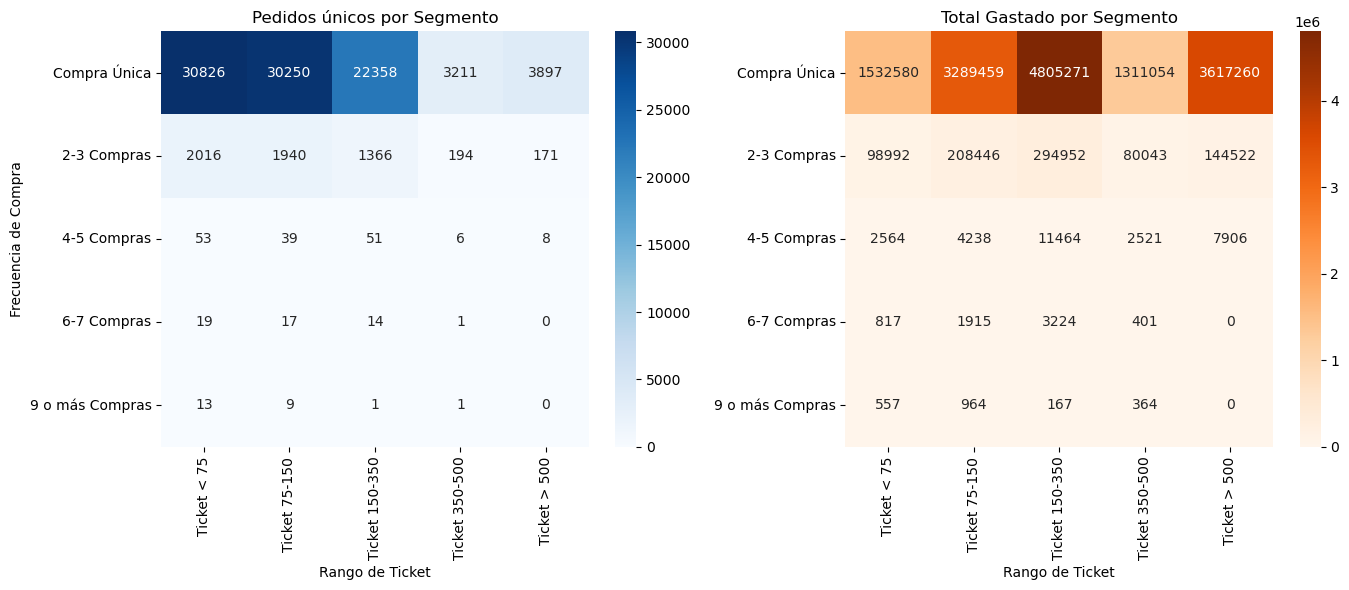

In [62]:
tabla_pedidos = df.groupby(['frecuencia_compra', 'rango_ticket'])['order_id'].nunique().unstack().fillna(0)
df_precios_unicos = df[['order_id', 'frecuencia_compra', 'rango_ticket', 'precio_ticket']].drop_duplicates(subset=['order_id'])
tabla_gasto = df_precios_unicos.groupby(['frecuencia_compra', 'rango_ticket'])['precio_ticket'].sum().unstack().fillna(0)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(tabla_pedidos, annot=True, fmt=".0f", cmap="Blues", ax=axes[0])
axes[0].set_title("Pedidos únicos por Segmento")
axes[0].set_xlabel("Rango de Ticket")
axes[0].set_ylabel("Frecuencia de Compra")

sns.heatmap(tabla_gasto, annot=True, fmt=".0f", cmap="Oranges", ax=axes[1])
axes[1].set_title("Total Gastado por Segmento")
axes[1].set_xlabel("Rango de Ticket")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

**Conclusiones Claves**

- **Demasiadas compras únicas:** La mayoría de los clientes compran solo una vez, lo que indica una baja fidelización.  
- **El ticket medio (75-350) domina:** Este segmento concentra la mayor parte del gasto y la cantidad de pedidos.  
- **Clientes de alto valor poco frecuentes:** Los que gastan más de 500 tienen poca recurrencia, pero generan ingresos relevantes.  
- **Frecuencia y ticket están inversamente relacionados:** A mayor ticket, menor número de pedidos repetidos.  

**Recomendaciones**  
- Implementar estrategias de **retención** para reducir la cantidad de clientes de compra única.  
- **Optimizar precios y promociones** en el rango de **75-350**, ya que concentra el mayor gasto.  
- Desarrollar estrategias de **fidelización** para clientes de alto ticket con incentivos exclusivos.  

In [63]:
df[df['customer_unique_id'] == '8d50f5eadf50201ccdcedfb9e2ac8455']

order_id                       customer_id  \
2715    c2213109a2cc0e75d55585b7aaac6d97  897b7f72042714efaa64ac306ba0cafc   
4193    23427a6bd9f8fd1b51f1b1e5cc186ab8  a8fabc805e9a10a3c93ae5bff642b86b   
5904    e3071b7624445af6e4f3a1b23718667d  0bf8bf19944a7f8b40ba86fef778ca7c   
13456   d3582fd5ccccd9cb229a63dfb417c86f  a682769c4bc10fc6ef2101337a6c83c9   
22103   bf92c69b7cc70f7fc2c37de43e366173  42dbc1ad9d560637c9c4c1533746f86d   
28796   6bdf325f0966e3056651285c0aed5aad  6289b75219d757a56c0cce8d9e427900   
39068   4f62d593acae92cea3c5662c76122478  dfb941d6f7b02f57a44c3b7c3fefb44b   
45684   b850a16d8faf65a74c51287ef34379ce  1bd3585471932167ab72a84955ebefea   
67895   519203404f6116d406a970763ee75799  1c62b48fb34ee043310dcb233caabd2e   
77039   a1a6eadae352582010f449d8527b55f3  3414a9c813e3ca02504b8be8b2deb27f   
80260   112eb6f37f1b9dabbced368fbbc6c9ef  65f9db9dd07a4e79b625effa4c868fcb   
89112   369634708db140c5d2c4e365882c443a  b2b13de0770e06de50080fea77c459e6   
94561   838f8e96cf584a1d8d22eaf7143c7772  f5188d99e9281e214a4a7d1b139a8229   
98104   89d9b111d2b990deb5f5f9769f92800b  9a1afef458843a022e431f4cb304dfe9   
112424  cd4b336a02aacabd0ef22f6db711f95e  89be66634d68fa73a95499b6352e085d   

       order_status order_purchase_timestamp   order_approved_at  \
2715      delivered      2018-08-07 23:32:14 2018-08-07 23:45:21   
4193      delivered      2018-05-21 22:44:31 2018-05-22 01:53:35   
5904      delivered      2017-09-05 22:14:52 2017-09-05 22:30:56   
13456     delivered      2018-08-20 19:14:26 2018-08-20 19:30:05   
22103     delivered      2017-07-24 22:11:50 2017-07-24 22:25:14   
28796     delivered      2018-05-22 23:08:55 2018-05-22 23:36:01   
39068     delivered      2017-07-18 23:10:58 2017-07-18 23:23:26   
45684     delivered      2017-11-22 20:01:53 2017-11-22 20:12:32   
67895     delivered      2017-08-05 08:59:43 2017-08-05 09:10:13   
77039     delivered      2018-08-18 12:39:19 2018-08-18 12:50:37   
80260     delivered      2018-07-23 21:53:02 2018-07-24 10:31:34   
89112     delivered      2017-06-18 22:56:48 2017-06-18 23:10:19   
94561     delivered      2018-07-04 22:35:13 2018-07-05 16:27:55   
98104     delivered      2017-10-29 16:58:02 2017-10-29 17:10:09   
112424    delivered      2017-10-18 23:25:04 2017-10-19 00:36:08   

       order_delivered_carrier_date order_delivered_customer_date  \
2715            2018-08-09 13:35:00           2018-08-10 20:26:44   
4193            2018-05-22 14:18:00           2018-05-23 15:33:09   
5904            2017-09-06 15:26:12           2017-09-11 13:27:49   
13456           2018-08-21 15:11:00           2018-08-24 14:08:43   
22103           2017-07-26 01:42:03           2017-07-31 16:59:58   
28796           2018-05-23 19:02:00           2018-05-24 11:58:23   
39068           2017-07-20 19:00:02           2017-07-21 16:19:40   
45684           2017-11-24 16:07:56           2017-11-27 18:49:13   
67895           2017-08-07 18:50:00           2017-08-09 15:22:28   
77039           2018-08-20 14:43:00           2018-08-24 17:26:42   
80260           2018-07-25 10:25:00           2018-07-26 18:29:28   
89112           2017-06-19 20:12:26           2017-06-23 12:55:50   
94561           2018-07-06 10:15:00           2018-07-10 21:27:30   
98104           2017-10-30 15:58:52           2017-10-31 15:33:47   
112424          2017-10-20 17:11:50           2017-10-23 18:33:01   

       order_estimated_delivery_date                customer_unique_id  \
2715                      2018-08-13  8d50f5eadf50201ccdcedfb9e2ac8455   
4193                      2018-05-29  8d50f5eadf50201ccdcedfb9e2ac8455   
5904                      2017-09-22  8d50f5eadf50201ccdcedfb9e2ac8455   
13456                     2018-09-04  8d50f5eadf50201ccdcedfb9e2ac8455   
22103                     2017-08-15  8d50f5eadf50201ccdcedfb9e2ac8455   
28796                     2018-05-30  8d50f5eadf50201ccdcedfb9e2ac8455   
39068                     2017-07-31  8d50f5eadf50201ccdcedfb9e2ac8455 

In [64]:
freq_mapping = {
    'Compra Única': 1,
    '2-3 Compras': 2,
    '4-5 Compras': 3,
    '6-7 Compras': 4,
    '9 o más Compras': 5
}
df['freq_score'] = df['frecuencia_compra'].map(freq_mapping)

ticket_mapping = {
    'Ticket < 75': 1,
    'Ticket 75-150': 2,
    'Ticket 150-350': 3,
    'Ticket 350-500': 4,
    'Ticket > 500': 5
}
df['VM_score'] = df['rango_ticket'].map(ticket_mapping)

df['freq_score'] = df['freq_score'].astype(int)
df['VM_score'] = df['VM_score'].astype(int)

df['sum_score'] = df['freq_score'] + df['VM_score']

df['Total_score'] = (df['sum_score'] / 2).round().astype(int)

df['Total_score'] = df['Total_score'].clip(1, 5)

df[['customer_unique_id', 'frecuencia_compra', 'rango_ticket', 
    'freq_score', 'VM_score', 'sum_score', 'Total_score']].head()



customer_unique_id frecuencia_compra    rango_ticket  \
0  7c396fd4830fd04220f754e42b4e5bff       2-3 Compras     Ticket < 75   
1  7c396fd4830fd04220f754e42b4e5bff       2-3 Compras     Ticket < 75   
2  7c396fd4830fd04220f754e42b4e5bff       2-3 Compras     Ticket < 75   
3  af07308b275d755c9edb36a90c618231      Compra Única   Ticket 75-150   
4  3a653a41f6f9fc3d2a113cf8398680e8      Compra Única  Ticket 150-350   

   freq_score  VM_score  sum_score  Total_score  
0           2         1          3            2  
1           2         1          3            2  
2           2         1          3            2  
3           1         2          3            2  
4           1         3          4            2

In [65]:
df_sorted = df.sort_values(by='Total_score', ascending=False)

num_customers = df['customer_unique_id'].nunique()
top_n = int(num_customers * 0.10)
bottom_n = top_n  # También el 10% inferior

unique_ids = df_sorted['customer_unique_id'].unique()

top_ids = unique_ids[:top_n]
bottom_ids = unique_ids[-bottom_n:]

customers_top_score = df[df['customer_unique_id'].isin(top_ids)]
customers_bad_score = df[df['customer_unique_id'].isin(bottom_ids)]

print("Número de clientes en el Top 10%:", customers_top_score['customer_unique_id'].nunique())
print("Número de clientes en el Bottom 10%:", customers_bad_score['customer_unique_id'].nunique())

Número de clientes en el Top 10%: 9334
Número de clientes en el Bottom 10%: 9334


In [66]:
df[['frecuencia_compra','rango_ticket', 'freq_score' , 'VM_score', 'Total_score']]

frecuencia_compra    rango_ticket  freq_score  VM_score  Total_score
0            2-3 Compras     Ticket < 75           2         1            2
1            2-3 Compras     Ticket < 75           2         1            2
2            2-3 Compras     Ticket < 75           2         1            2
3           Compra Única   Ticket 75-150           1         2            2
4           Compra Única  Ticket 150-350           1         3            2
...                  ...             ...         ...       ...          ...
115016      Compra Única  Ticket 150-350           1         3            2
115017      Compra Única  Ticket 150-350           1         3            2
115018      Compra Única  Ticket 350-500           1         4            2
115019      Compra Única  Ticket 350-500           1         4            2
115020      Compra Única   Ticket 75-150           1         2            2

[115021 rows x 5 columns]

## Segmentación categorías

In [67]:
# Elimina la columna 'frecuencia_temporal' si ya existe
df = df.drop(columns='frecuencia_temporal', errors='ignore')

In [68]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df = df.sort_values(by=['product_category', 'order_purchase_timestamp'])
df['dias_entre_compras'] = df.groupby('product_category')['order_purchase_timestamp'].diff().dt.days
freq_tiempo_categoria = df.groupby('product_category')['dias_entre_compras'].mean().reset_index()

freq_tiempo_categoria['dias_entre_compras'].fillna(9999, inplace=True)

def asignar_cluster_frecuencia(dias):
    if dias <= 1:
        return 'Compra Diaria'
    elif 1 < dias <= 7:
        return 'Compra Semanal'
    elif 7 < dias <= 15:
        return 'Compra Quincenal'
    elif 15 < dias <= 30:
        return 'Compra Mensual'
    else:
        return 'Compra Estacional'

freq_tiempo_categoria['frecuencia_temporal'] = freq_tiempo_categoria['dias_entre_compras'].apply(asignar_cluster_frecuencia)

df = df.merge(freq_tiempo_categoria[['product_category', 'frecuencia_temporal']],
              on='product_category', how='left')

print(df[['product_category', 'frecuencia_temporal']].drop_duplicates().sort_values(by='frecuencia_temporal'))
df['dias_entre_compras'].fillna(9999, inplace=True)

                product_category frecuencia_temporal
0                          Other       Compra Diaria
104773                      toys       Compra Diaria
45083            furniture_decor       Compra Diaria
53636      furniture_living_room       Compra Diaria
54196               garden_tools       Compra Diaria
...                          ...                 ...
22427            books_technical      Compra Semanal
22930                  computers      Compra Semanal
69194          home_appliances_2      Compra Semanal
43438              fashion_shoes      Compra Semanal
37520   costruction_tools_garden      Compra Semanal

[74 rows x 2 columns]


In [69]:
df['frecuencia_temporal'].unique()

array(['Compra Diaria', 'Compra Semanal', 'Compra Mensual',
       'Compra Quincenal', 'Compra Estacional'], dtype=object)

In [70]:
df['frecuencia_temporal'] = pd.Categorical(
    df['frecuencia_temporal'],
    categories=['Compra Estacional', 'Compra Mensual', 'Compra Quincenal', 'Compra Semanal', 'Compra Diaria'],
    ordered=True
)

In [71]:
df['frecuencia_temporal'].unique()

['Compra Diaria', 'Compra Semanal', 'Compra Mensual', 'Compra Quincenal', 'Compra Estacional']
Categories (5, object): ['Compra Estacional' < 'Compra Mensual' < 'Compra Quincenal' < 'Compra Semanal' < 'Compra Diaria']

In [72]:
freq_score_mapping = {
    'Compra Diaria': 5,
    'Compra Semanal': 4,
    'Compra Quincenal': 3,
    'Compra Mensual': 2,
    'Compra Estacional': 1
}
df['freq_score_categoria'] = df['frecuencia_temporal'].map(freq_score_mapping).astype(int)

In [73]:
df[df['frecuencia_temporal']=='Compra Quincenal'][['frecuencia_temporal','freq_score_categoria']].head()


frecuencia_temporal  freq_score_categoria
22368    Compra Quincenal                     3
22369    Compra Quincenal                     3
22370    Compra Quincenal                     3
22371    Compra Quincenal                     3
22372    Compra Quincenal                     3

In [74]:
df[['frecuencia_temporal','freq_score_categoria' ]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115021 entries, 0 to 115020
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   frecuencia_temporal   115021 non-null  category
 1   freq_score_categoria  115021 non-null  int32   
dtypes: category(1), int32(1)
memory usage: 562.0 KB


In [75]:
df['price'].describe()


count    115021.000000
mean        120.078171
std         183.036937
min           0.850000
25%          39.900000
50%          74.900000
75%         133.000000
max        6735.000000
Name: price, dtype: float64

In [76]:
def asignar_cluster_valor(precio):
    if precio < 75:
        return 'Precio < 75'
    elif 75 <= precio < 200:
        return 'Precio 75-200'
    elif 200 <= precio < 500:
        return 'Precio 200-500'
    elif 500 <= precio < 1000:
        return 'Precio 500-1000'
    else:
        return 'Precio > 1000'

df['rango_precio_producto'] = df['price'].apply(asignar_cluster_valor)

df_merged = df[['product_category', 'rango_precio_producto']].drop_duplicates()

print(df_merged.sort_values(by='rango_precio_producto').drop_duplicates())

                             product_category rango_precio_producto
108965                          watches_gifts        Precio 200-500
33620                              cool_stuff        Precio 200-500
54160       furniture_mattress_and_upholstery        Precio 200-500
33434               construction_tools_safety        Precio 200-500
87843                  signaling_and_security        Precio 200-500
...                                       ...                   ...
23184                   computers_accessories         Precio > 1000
54308                            garden_tools         Precio > 1000
88726   small_appliances_home_oven_and_coffee         Precio > 1000
59419                           health_beauty         Precio > 1000
77772          industry_commerce_and_business         Precio > 1000

[303 rows x 2 columns]


In [77]:
df['rango_precio_producto'].unique()

array(['Precio < 75', 'Precio 75-200', 'Precio 200-500', 'Precio > 1000',
       'Precio 500-1000'], dtype=object)

In [78]:
df['rango_precio_producto'] = pd.Categorical(
    df['rango_precio_producto'],
    categories=['Precio < 75', 'Precio 75-200', 'Precio 200-500', 'Precio 500-1000', 'Precio > 1000'],
    ordered=True
)

In [79]:
df['rango_precio_producto'].unique()

['Precio < 75', 'Precio 75-200', 'Precio 200-500', 'Precio > 1000', 'Precio 500-1000']
Categories (5, object): ['Precio < 75' < 'Precio 75-200' < 'Precio 200-500' < 'Precio 500-1000' < 'Precio > 1000']

In [80]:
valor_score_mapping = {
    'Precio < 75': 1,
    'Precio 75-200': 2,
    'Precio 200-500': 3,
    'Precio 500-1000': 4,
    'Precio > 1000': 5
}

df['score_valor_producto'] = df['rango_precio_producto'].map(valor_score_mapping).astype(int)

In [81]:
df['score_valor_producto'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 115021 entries, 0 to 115020
Series name: score_valor_producto
Non-Null Count   Dtype
--------------   -----
115021 non-null  int32
dtypes: int32(1)
memory usage: 449.4 KB


In [82]:
df['frecuencia_temporal'].head()

0    Compra Diaria
1    Compra Diaria
2    Compra Diaria
3    Compra Diaria
4    Compra Diaria
Name: frecuencia_temporal, dtype: category
Categories (5, object): ['Compra Estacional' < 'Compra Mensual' < 'Compra Quincenal' < 'Compra Semanal' < 'Compra Diaria']

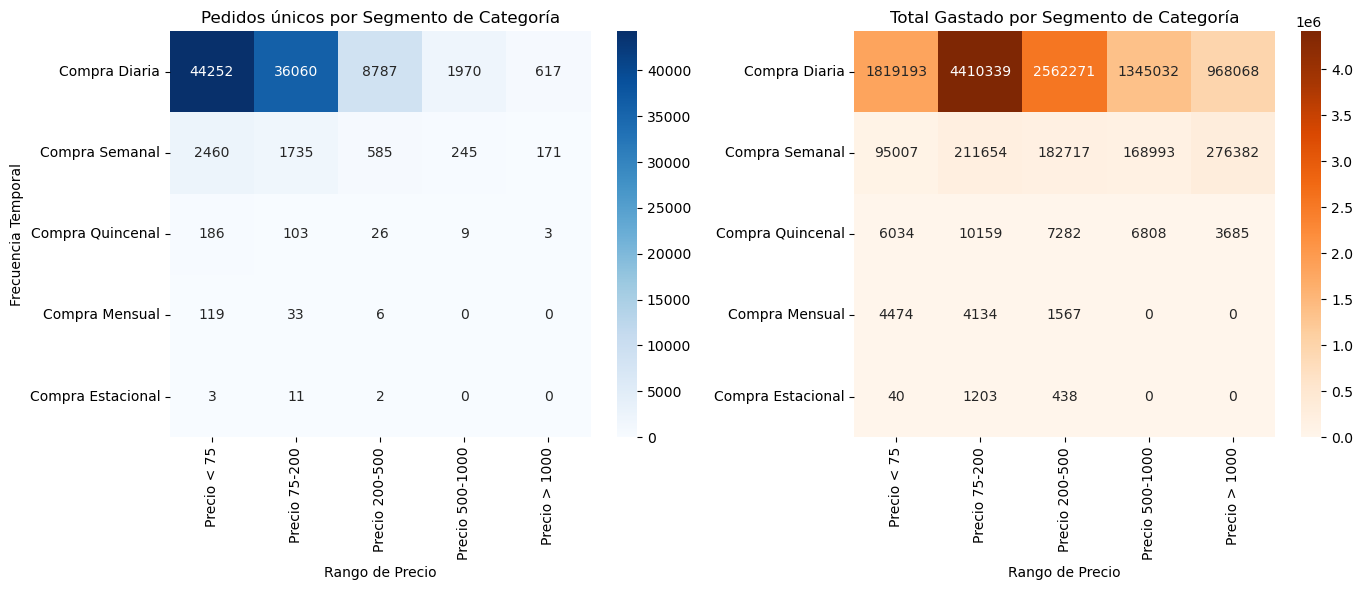

In [83]:
tabla_pedidos_categoria = df.groupby(['frecuencia_temporal', 'rango_precio_producto'])['order_id'].nunique().unstack().fillna(0)
df_precios_unicos_categoria = df[['order_id', 'frecuencia_temporal', 'rango_precio_producto', 'price']].drop_duplicates(subset=['order_id'])
tabla_gasto_categoria = df_precios_unicos_categoria.groupby(['frecuencia_temporal', 'rango_precio_producto'])['price'].sum().unstack().fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(tabla_pedidos_categoria.iloc[::-1], annot=True, fmt=".0f", cmap="Blues", ax=axes[0])
axes[0].set_title("Pedidos únicos por Segmento de Categoría")
axes[0].set_xlabel("Rango de Precio")
axes[0].set_ylabel("Frecuencia Temporal")

sns.heatmap(tabla_gasto_categoria.iloc[::-1], annot=True, fmt=".0f", cmap="Oranges", ax=axes[1])
axes[1].set_title("Total Gastado por Segmento de Categoría")
axes[1].set_xlabel("Rango de Precio")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

**Conclusiones Claves**

- **La mayoría de los pedidos son de compras diarias y de bajo precio (< 200).**  
- **Las compras más caras (> 500) tienen baja frecuencia, pero representan una parte importante del gasto total.**  
- **El segmento de compra semanal es el más relevante después del diario en términos de volumen y gasto.**  
- **Las compras quincenales, mensuales y estacionales son marginales y tienen poco impacto en las ventas.**  

**Recomendaciones**
- **Optimizar precios y promociones** en los segmentos de compras diarias y semanales, especialmente en el rango de **75-200**.  
- **Fomentar la recurrencia** en clientes de compras de alto precio mediante programas de fidelización o beneficios exclusivos.  
- **Explorar estrategias para aumentar la frecuencia de compra** en clientes quincenales y mensuales.  

In [84]:
# Paso 1: Calcular el Total_score para las categorías
df['sum_score_categoria'] = df['freq_score_categoria'] + df['score_valor_producto']
df['total_score_categoria'] = (df['sum_score'] / 2).round().astype(int)

# Paso 2: Agrupar los scores en un rango de 1 a 5, considerando el máximo 10
bins = [1, 2, 4, 6, 8, 10]  # Dividimos de 1 a 10 en 5 rangos
labels = [1, 2, 3, 4, 5]  # Etiquetas para los rangos de 1 a 5

df['total_score_categoria_grouped'] = pd.cut(df['total_score_categoria'], bins=bins, labels=labels, right=True)

# Paso 3: Ordenar las categorías por Total_score
df_sorted_categoria = df.sort_values(by='total_score_categoria', ascending=False)

# Paso 4: Calcular el 10% superior e inferior
num_categorias = df['product_category'].nunique()
top_n_categoria = int(num_categorias * 0.10)
bottom_n_categoria = top_n_categoria  # También el 10% inferior

unique_categories = df_sorted_categoria['product_category'].unique()

top_categories = unique_categories[:top_n_categoria]
bottom_categories = unique_categories[-bottom_n_categoria:]

# Paso 5: Filtrar las categorías top y bottom
categories_top_score = df[df['product_category'].isin(top_categories)]
categories_bad_score = df[df['product_category'].isin(bottom_categories)]

# Mostrar resultados
print("Número de categorías en el Top 10%:", categories_top_score['product_category'].nunique())
print("Número de categorías en el Bottom 10%:", categories_bad_score['product_category'].nunique())


Número de categorías en el Top 10%: 7
Número de categorías en el Bottom 10%: 7


In [85]:
df[['frecuencia_temporal','rango_precio_producto', 'freq_score_categoria', 'score_valor_producto', 'total_score_categoria' ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115021 entries, 0 to 115020
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   frecuencia_temporal    115021 non-null  category
 1   rango_precio_producto  115021 non-null  category
 2   freq_score_categoria   115021 non-null  int32   
 3   score_valor_producto   115021 non-null  int32   
 4   total_score_categoria  115021 non-null  int32   
dtypes: category(2), int32(3)
memory usage: 1.5 MB


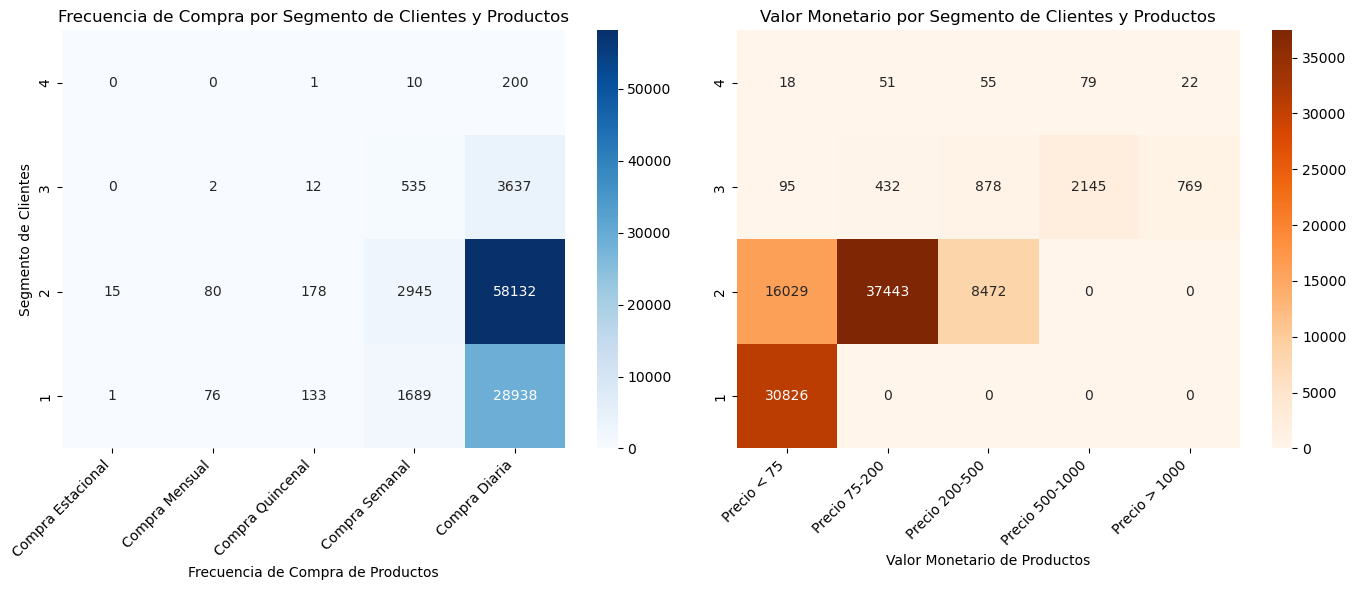

In [86]:
# Paso 1: Generar los heatmaps para la frecuencia y el valor monetario

# Heatmap de Frecuencia (relacionar el Total_score de clientes con el freq_score_categoria de productos)
tabla_frecuencia = df.groupby(['Total_score', 'frecuencia_temporal'])['order_id'].nunique().unstack().fillna(0)

# Heatmap de Valor Monetario (relacionar el Total_score de clientes con el score_valor_producto de productos)
tabla_valor = df.groupby(['Total_score', 'rango_precio_producto'])['order_id'].nunique().unstack().fillna(0)

# Paso 2: Visualizar los heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap de frecuencia
sns.heatmap(tabla_frecuencia.iloc[::-1], annot=True, fmt=".0f", cmap="Blues", ax=axes[0])
axes[0].set_title("Frecuencia de Compra por Segmento de Clientes y Productos")
axes[0].set_xlabel("Frecuencia de Compra de Productos")
axes[0].set_ylabel("Segmento de Clientes")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Heatmap de valor monetario
sns.heatmap(tabla_valor.iloc[::-1], annot=True, fmt=".0f", cmap="Oranges", ax=axes[1])
axes[1].set_title("Valor Monetario por Segmento de Clientes y Productos")
axes[1].set_xlabel("Valor Monetario de Productos")
axes[1].set_ylabel("")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Conclusiones Claves**

- **Los clientes más activos (segmentos 1-2) concentran la mayoría de las compras, especialmente diarias y semanales.**  
- **Los clientes con menor actividad (segmentos 3-4) apenas contribuyen al volumen de compras.**  
- **Las compras de bajo valor (< 75) representan la mayor parte del gasto total.**  
- **El gasto en productos de alto precio (> 500) es marginal y está concentrado en pocos clientes.**  

**Recomendaciones**
- **Focalizar estrategias de retención** en los clientes de segmentos 1-2, ya que son los más rentables.  
- **Diseñar incentivos para aumentar la actividad** de los clientes del segmento 3 y evitar que migren a inactividad.  
- **Explorar promociones en productos de mayor precio** para aumentar su participación en las ventas.  

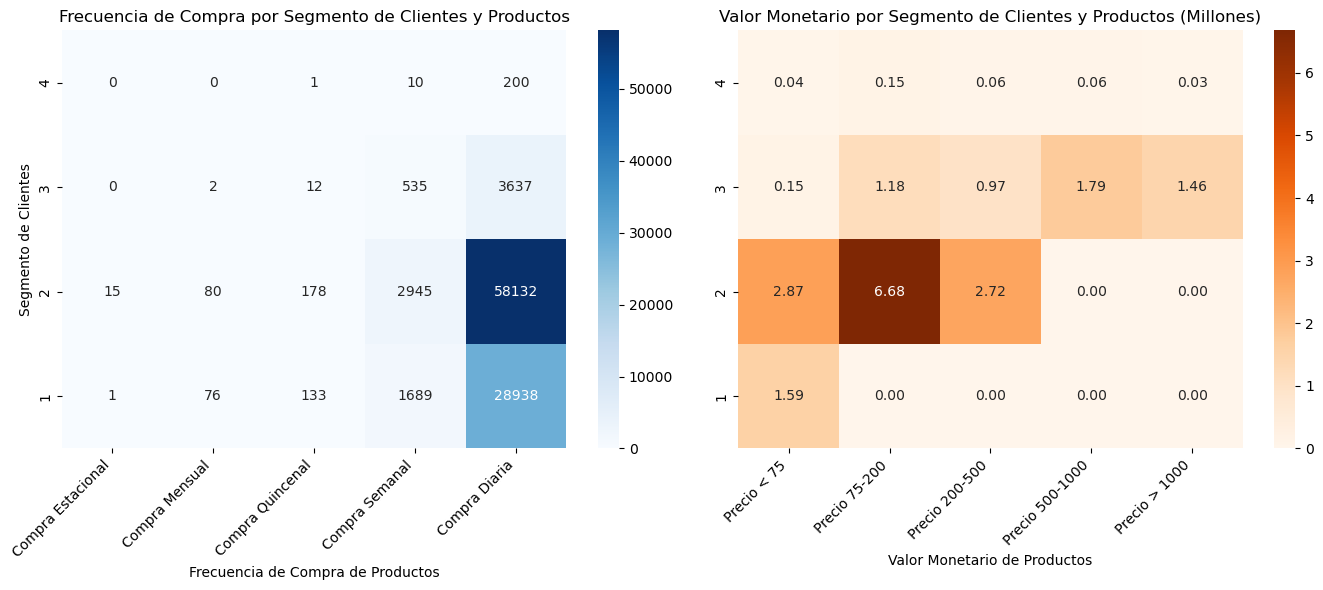

In [87]:
# Paso 1: Generar los heatmaps para la frecuencia y el valor monetario

# Heatmap de Frecuencia (relacionar el Total_score de clientes con el freq_score_categoria de productos)
tabla_frecuencia = df.groupby(['Total_score', 'frecuencia_temporal'])['order_id'].nunique().unstack().fillna(0)

# Heatmap de Valor Monetario (relacionar el Total_score de clientes con el score_valor_producto de productos)
# Convertir a millones
tabla_valor = df.groupby(['Total_score', 'rango_precio_producto'])['payment_value'].sum().unstack().fillna(0) / 1000000

# Paso 2: Visualizar los heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap de frecuencia
sns.heatmap(tabla_frecuencia.iloc[::-1], annot=True, fmt=".0f", cmap="Blues", ax=axes[0])
axes[0].set_title("Frecuencia de Compra por Segmento de Clientes y Productos")
axes[0].set_xlabel("Frecuencia de Compra de Productos")
axes[0].set_ylabel("Segmento de Clientes")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Heatmap de valor monetario
sns.heatmap(tabla_valor.iloc[::-1], annot=True, fmt=".2f", cmap="Oranges", ax=axes[1])
axes[1].set_title("Valor Monetario por Segmento de Clientes y Productos (Millones)")
axes[1].set_xlabel("Valor Monetario de Productos")
axes[1].set_ylabel("")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [88]:
tabla_frecuencia

frecuencia_temporal  Compra Estacional  Compra Mensual  Compra Quincenal  \
Total_score                                                                
1                                    1              76               133   
2                                   15              80               178   
3                                    0               2                12   
4                                    0               0                 1   

frecuencia_temporal  Compra Semanal  Compra Diaria  
Total_score                                         
1                              1689          28938  
2                              2945          58132  
3                               535           3637  
4                                10            200

In [89]:
tabla_valor

rango_precio_producto  Precio < 75  Precio 75-200  Precio 200-500  \
Total_score                                                         
1                         1.592180       0.000000        0.000000   
2                         2.866490       6.679135        2.718722   
3                         0.154440       1.184541        0.974540   
4                         0.040613       0.146775        0.063360   

rango_precio_producto  Precio 500-1000  Precio > 1000  
Total_score                                            
1                             0.000000       0.000000  
2                             0.000000       0.000000  
3                             1.791447       1.463524  
4                             0.062848       0.034780

In [90]:
df[['frecuencia_compra','rango_ticket', 'freq_score' , 'VM_score', 'Total_score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115021 entries, 0 to 115020
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   frecuencia_compra  115021 non-null  category
 1   rango_ticket       115021 non-null  category
 2   freq_score         115021 non-null  int32   
 3   VM_score           115021 non-null  int32   
 4   Total_score        115021 non-null  int32   
dtypes: category(2), int32(3)
memory usage: 1.5 MB


In [91]:
df[['frecuencia_compra','rango_ticket', 'freq_score' , 'VM_score', 'Total_score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115021 entries, 0 to 115020
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   frecuencia_compra  115021 non-null  category
 1   rango_ticket       115021 non-null  category
 2   freq_score         115021 non-null  int32   
 3   VM_score           115021 non-null  int32   
 4   Total_score        115021 non-null  int32   
dtypes: category(2), int32(3)
memory usage: 1.5 MB


In [92]:
df[['frecuencia_temporal', 'rango_precio_producto','freq_score_categoria', 'score_valor_producto', 'total_score_categoria']].info()
#df[['frecuencia_compra','rango_ticket', 'freq_score' , 'VM_score', 'Total_score']].head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115021 entries, 0 to 115020
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   frecuencia_temporal    115021 non-null  category
 1   rango_precio_producto  115021 non-null  category
 2   freq_score_categoria   115021 non-null  int32   
 3   score_valor_producto   115021 non-null  int32   
 4   total_score_categoria  115021 non-null  int32   
dtypes: category(2), int32(3)
memory usage: 1.5 MB


# ¿Cuáles son las categorías más populares?

In [93]:
productos_mas_vendidos = df.groupby(['product_id', 'product_category'])['order_item_id'].count().reset_index()
productos_mas_vendidos.rename(columns={'order_item_id': 'total_vendidos'}, inplace=True)
productos_mas_vendidos = productos_mas_vendidos.sort_values(by='total_vendidos', ascending=False)
productos_mas_vendidos.head(10)

product_id       product_category  total_vendidos
21612  aca2eb7d00ea1a7b8ebd4e68314663af        furniture_decor             529
19286  99a4788cb24856965c36a24e339b6058         bed_bath_table             513
8427   422879e10f46682990de24d770e7f83d           garden_tools             505
7204   389d119b48cf3043d311335e499d9c6b           garden_tools             403
6924   368c6c730842d78016ad823897a372db           garden_tools             395
10585  53759a2ecddad2bb87a079a1f1519f73           garden_tools             389
26431  d1c427060a0f73f6b889a5c7c61f2ac4  computers_accessories             346
10612  53b36df67ebb7c41585e8d54d6772e08          watches_gifts             325
2734   154e7e31ebfa092203795c972e5804a6          health_beauty             276
7879   3dd2a17168ec895c781a9191c1e95ad7  computers_accessories             276

In [94]:
df_categorias_agg = df.groupby('product_category').agg(
    order_count=('order_id', 'count'),
    total_payment_value=('payment_value', 'sum')
    )

df_categorias_agg['order_count_pct'] = (df_categorias_agg['order_count'] / df_categorias_agg['order_count'].sum() * 100).round(2).astype(str) + '%'
df_categorias_agg['total_payment_value_pct'] = (df_categorias_agg['total_payment_value'] / df_categorias_agg['total_payment_value'].sum() * 100).round(2).astype(str) + '%'

df_categorias_agg = df_categorias_agg.sort_values(by=['total_payment_value'], ascending=False).head(10)
df_categorias_agg


order_count  total_payment_value order_count_pct  \
product_category                                                          
bed_bath_table               11649           1692557.09          10.13%   
health_beauty                 9764           1620868.35           8.49%   
computers_accessories         7897           1549252.47           6.87%   
furniture_decor               8553           1393972.04           7.44%   
watches_gifts                 6063           1387046.31           5.27%   
sports_leisure                8731           1349194.08           7.59%   
housewares                    7172           1069787.97           6.24%   
auto                          4283            833610.84           3.72%   
garden_tools                  4463            810460.70           3.88%   
cool_stuff                    3904            744339.94           3.39%   

                      total_payment_value_pct  
product_category                               
bed_bath_table                          8.56%  
health_beauty                            8.2%  
computers_accessories                   7.84%  
furniture_decor                         7.05%  
watches_gifts                           7.01%  
sports_leisure                          6.82%  
housewares                              5.41%  
auto                                    4.22%  
garden_tools                             4.1%  
cool_stuff                              3.76%

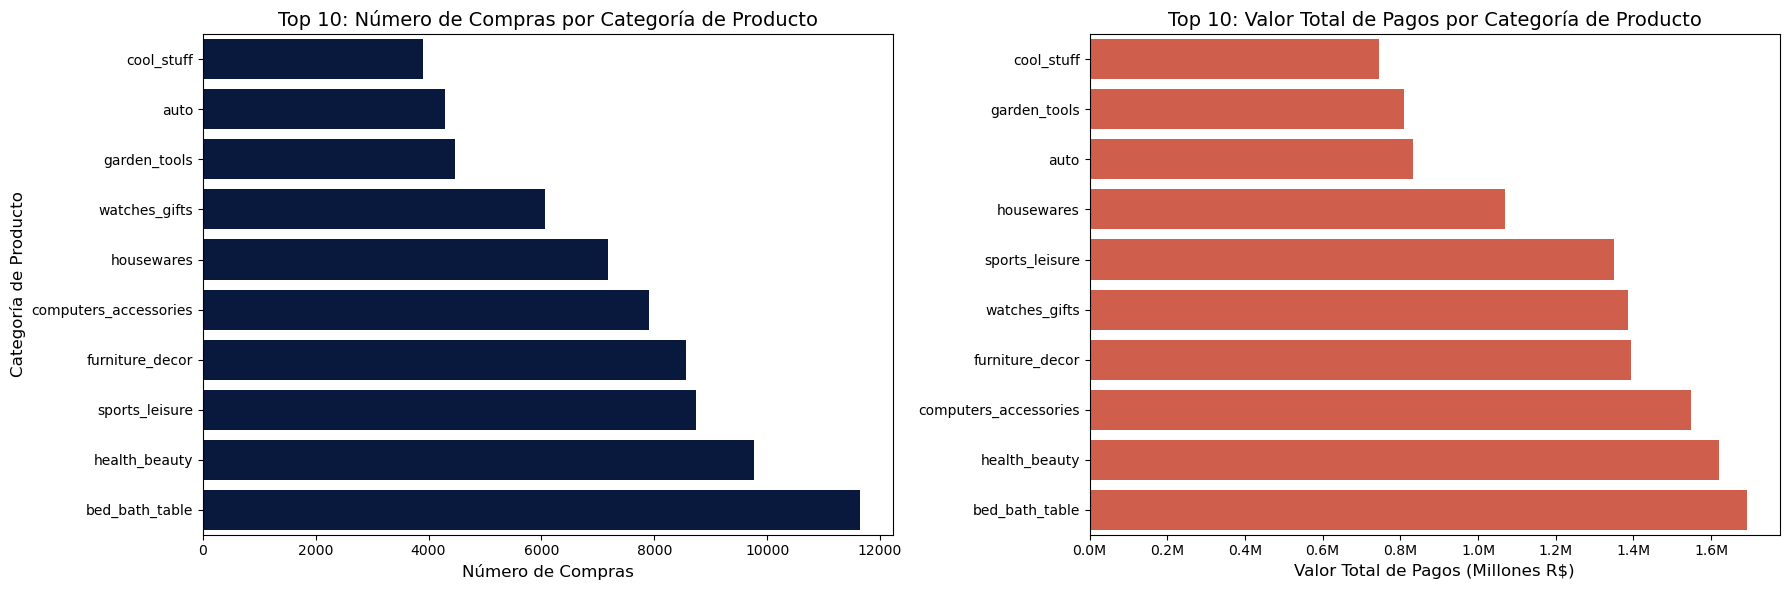

In [95]:
# 🔹 Seleccionar las 10 categorías principales por número de pedidos
top_10_categories = df_categorias_agg.nlargest(10, "order_count").reset_index()  # Restablecer el índice para incluir 'product_category_name'

# 🔹 Ordenar las categorías por número de pedidos (de mayor a menor)
top_10_categories = top_10_categories.sort_values("order_count", ascending=True)

# 🔹 Convertir los valores monetarios a millones
top_10_categories["total_payment_value_millions"] = top_10_categories["total_payment_value"] / 1_000_000

# 🔹 Configurar la figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 📊 **Gráfico 1: Número de pedidos**
sns.barplot(
    ax=axes[0],
    x="order_count",
    y="product_category",  #
    data=top_10_categories,
    color="#001647"
)
axes[0].set_title("Top 10: Número de Compras por Categoría de Producto", fontsize=14)
axes[0].set_xlabel("Número de Compras", fontsize=12)
axes[0].set_ylabel("Categoría de Producto", fontsize=12)

# 📊 **Gráfico 2: Valor total de pagos en millones (también ordenado)**
top_10_categories = top_10_categories.sort_values("total_payment_value_millions", ascending=True)
sns.barplot(
    ax=axes[1],
    x="total_payment_value_millions",
    y="product_category",
    data=top_10_categories,
    color="#E64E36"
)
axes[1].set_title("Top 10: Valor Total de Pagos por Categoría de Producto", fontsize=14)
axes[1].set_xlabel("Valor Total de Pagos (Millones R$)", fontsize=12)
axes[1].set_ylabel("")

# 🔹 Formato en millones
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{x:,.1f}M"))

# 🔹 Ajustar el espacio entre gráficos
plt.tight_layout()

# 🔹 Mostrar gráfico
plt.show()


In [96]:
df = df.drop(columns=['orders', 'revenue', 'revenue_millions'], errors='ignore')

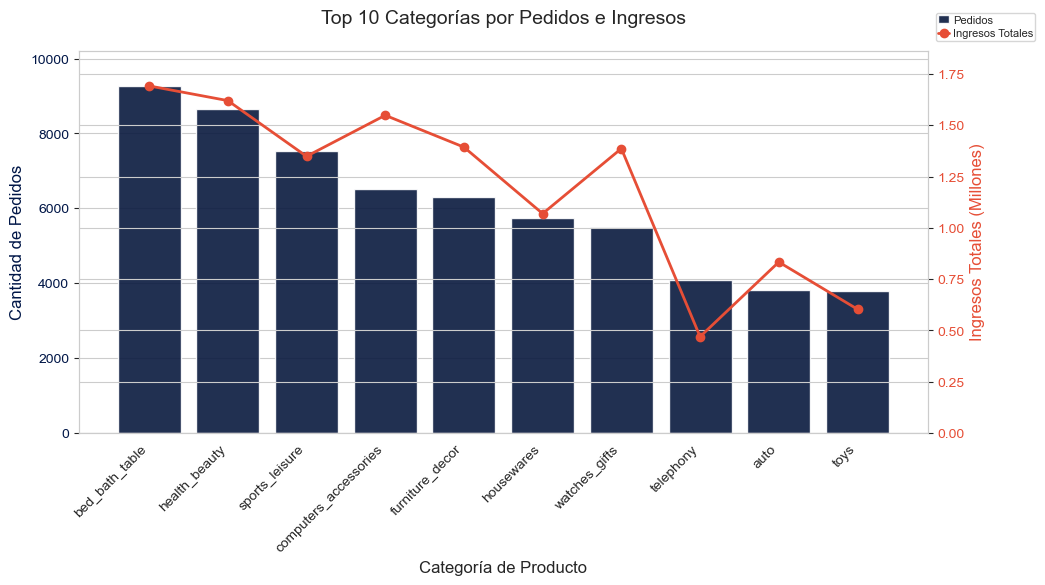

In [97]:
# 1) Crear columnas 'orders' y 'revenue' para cada categoría, dentro del mismo DataFrame
#    - Se agrupa y luego se hace un merge para que df tenga esas columnas.
df_agg = (
    df.groupby('product_category', as_index=False)
      .agg({
          'order_id': 'nunique',
          'payment_value': 'sum'
      })
      .rename(columns={'order_id': 'orders', 'payment_value': 'revenue'})
)

# 2) Agregar la columna 'revenue_millions' en el DataFrame agregado
df_agg['revenue_millions'] = df_agg['revenue'] / 1_000_000

# 3) Unir df_agg a df para que cada fila en df tenga las columnas 'orders', 'revenue', 'revenue_millions'
df = df.merge(df_agg, on='product_category', how='left')

# 4) Seleccionar top 10 categorías con más pedidos (en df_agg)
top_10_df = df_agg.nlargest(10, 'orders').copy()

# 5) Graficar Pedidos (barras) e Ingresos (línea)
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras (pedidos)
sns.barplot(
    x='product_category',
    y='orders',
    data=top_10_df,
    color='#001647',
    alpha=0.9,
    ax=ax1,
    label='Pedidos'
)
ax1.set_xlabel("Categoría de Producto", fontsize=12)
ax1.set_ylabel("Cantidad de Pedidos", color='#001647', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#001647')
ax1.set_ylim(0, top_10_df['orders'].max() * 1.1)
ax1.set_title("Top 10 Categorías por Pedidos e Ingresos", fontsize=14, pad=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Eje secundario (ingresos)
ax2 = ax1.twinx()
ax2.plot(
    top_10_df['product_category'],
    top_10_df['revenue_millions'],
    color='#E64E36',
    marker='o',
    linewidth=2,
    label='Ingresos Totales'
)
ax2.set_ylabel("Ingresos Totales (Millones)", color='#E64E36', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#E64E36')
ax2.set_ylim(0, top_10_df['revenue_millions'].max() * 1.1)

# Unificar leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
all_lines = lines1 + lines2
all_labels = labels1 + labels2

ax1.legend(
    all_lines,
    all_labels,
    loc='upper left',
    bbox_to_anchor=(1.01, 1.10),
    borderaxespad=0,
    frameon=True,
    fontsize=8,
    handlelength=1,
    handletextpad=0.3,
    borderpad=0.2,
    labelspacing=0.3
)


plt.tight_layout(rect=[0, 0, 0.88, 1])  
plt.show()


In [98]:
top_10_df

product_category  orders     revenue  revenue_millions
8          bed_bath_table    9271  1692557.09          1.692557
44          health_beauty    8649  1620868.35          1.620868
68         sports_leisure    7528  1349194.08          1.349194
16  computers_accessories    6529  1549252.47          1.549252
40        furniture_decor    6303  1393972.04          1.393972
50             housewares    5743  1069787.97          1.069788
73          watches_gifts    5493  1387046.31          1.387046
71              telephony    4092   469636.49          0.469636
6                    auto    3809   833610.84          0.833611
72                   toys    3804   603470.92          0.603471

# ¿Cuáles son los estados en los que más se compra?

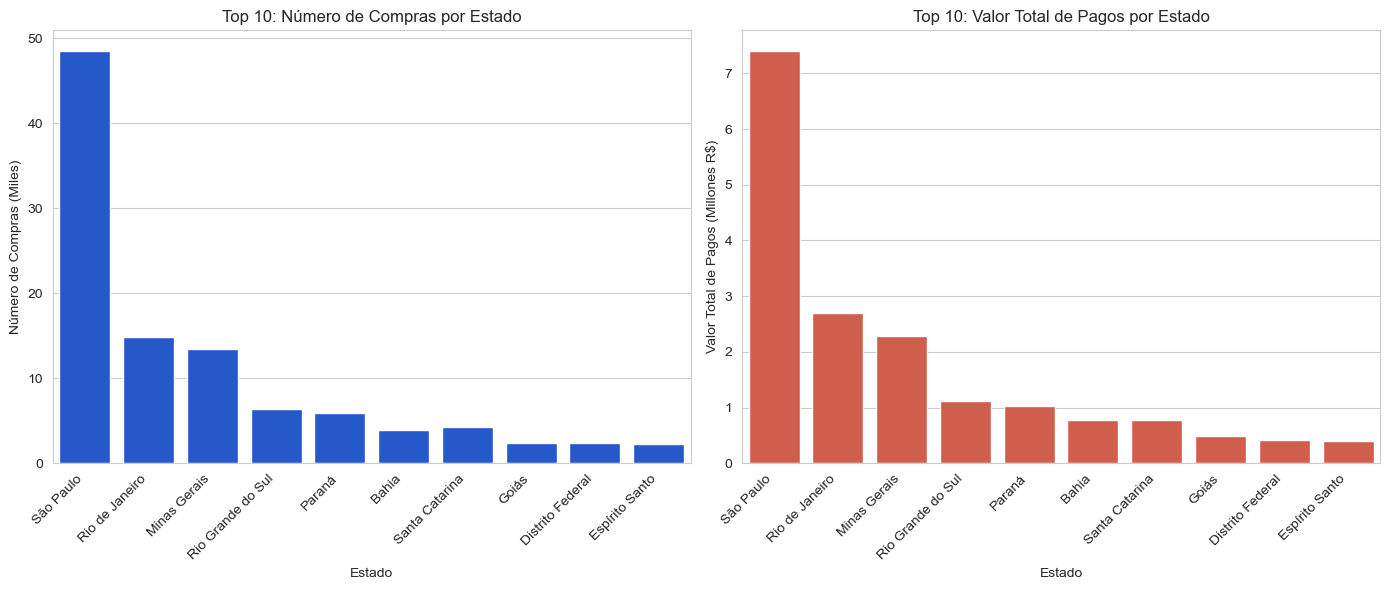

In [99]:
state_summary = df.groupby('customer_full_state').agg(
    order_count=('order_id', 'count'),
    total_payment_value=('payment_value', 'sum')
).sort_values(by='total_payment_value', ascending=False).head(10)

state_summary['total_payment_value'] /= 1_000_000
state_summary['order_count'] /= 1_000
state_summary.reset_index(inplace=True)


plt.figure(figsize=(14, 6))

# Gráfico 1: Número de pedidos por estado
plt.subplot(1, 2, 1)
sns.barplot(x='customer_full_state', y='order_count', data=state_summary, color='#0a4ee4')
plt.title('Top 10: Número de Compras por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Compras (Miles)')
plt.xticks(rotation=45, ha='right')

# Gráfico 2: Valor total de pagos por estado 
plt.subplot(1, 2, 2)
sns.barplot(x='customer_full_state', y='total_payment_value', data=state_summary, color='#e64e36')
plt.title('Top 10: Valor Total de Pagos por Estado')
plt.xlabel('Estado')
plt.ylabel('Valor Total de Pagos (Millones R$)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## ¿Cuáles son las regiones en las que más se compra?

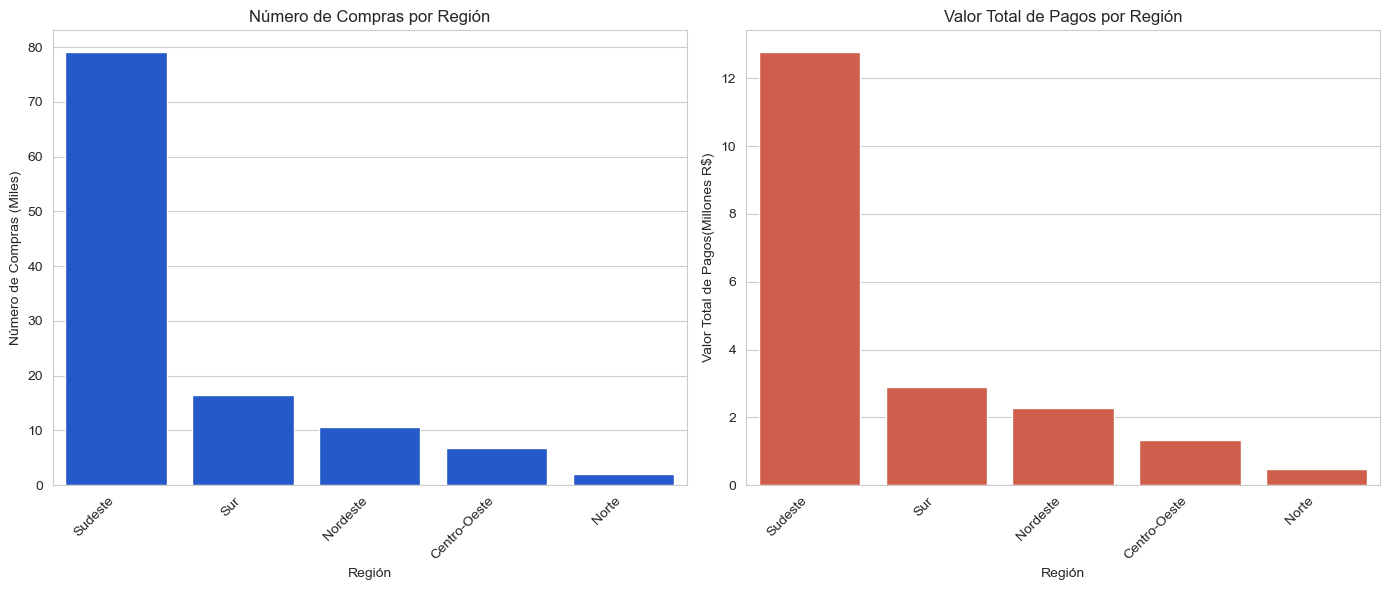

In [100]:
# Agrupar por región del cliente
region_summary = df.groupby('customer_region').agg(
    order_count=('order_id', 'count'),
    total_payment_value=('payment_value', 'sum')
).sort_values(by='total_payment_value', ascending=False)

# Convertir a miles y millones
region_summary['total_payment_value'] /= 1_000_000
region_summary['order_count'] /= 1_000
region_summary.reset_index(inplace=True)

plt.figure(figsize=(14, 6))

# Gráfico 1: Número de pedidos por región
plt.subplot(1, 2, 1)
sns.barplot(x='customer_region', y='order_count', data=region_summary, color='#0a4ee4')
plt.title('Número de Compras por Región')
plt.xlabel('Región')
plt.ylabel('Número de Compras (Miles)')
plt.xticks(rotation=45, ha='right')

# Gráfico 2: Valor total de pagos por región (en millones)
plt.subplot(1, 2, 2)
sns.barplot(x='customer_region', y='total_payment_value', data=region_summary, color='#e64e36')
plt.title('Valor Total de Pagos por Región')
plt.xlabel('Región')
plt.ylabel('Valor Total de Pagos(Millones R$)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## ¿Cuáles son las categorías más vendidas por Estado?

In [101]:
ventas_por_estado_categoria = df.groupby(['customer_full_state', 'product_category']).size().reset_index(name='total_vendidos')
ventas_por_estado_categoria = ventas_por_estado_categoria.sort_values(by=['customer_full_state', 'total_vendidos'], ascending=[True, False])

top_por_estado = ventas_por_estado_categoria.groupby('customer_full_state').head(5)
top_por_estado.sort_values(by='total_vendidos', ascending=False).head(20)

customer_full_state       product_category  total_vendidos
1284           São Paulo         bed_bath_table            5491
1320           São Paulo          health_beauty            4250
1343           São Paulo         sports_leisure            3718
1316           São Paulo        furniture_decor            3668
1326           São Paulo             housewares            3374
1046      Rio de Janeiro         bed_bath_table            1744
593         Minas Gerais         bed_bath_table            1393
1078      Rio de Janeiro        furniture_decor            1114
627         Minas Gerais          health_beauty            1085
1082      Rio de Janeiro          health_beauty            1061
1104      Rio de Janeiro         sports_leisure            1059
600         Minas Gerais  computers_accessories            1017
1054      Rio de Janeiro  computers_accessories            1010
623         Minas Gerais        furniture_decor             988
650         Minas Gerais         sports_leisure             980
978    Rio Grande do Sul         bed_bath_table             661
1007   Rio Grande do Sul        furniture_decor             570
692               Paraná        furniture_decor             526
986    Rio Grande do Sul  computers_accessories             507
1033   Rio Grande do Sul         sports_leisure             483

In [102]:
df_top5_sorted = top_por_estado.groupby('customer_full_state').agg({'total_vendidos': 'sum'}).sort_values('total_vendidos', ascending=False).reset_index()

df_1 = df_top5_sorted.iloc[:9]
df_2 = df_top5_sorted.iloc[9:18]
df_3 = df_top5_sorted.iloc[18:]

def plot_bar(df_part, title):
    df_filtered = top_por_estado[top_por_estado['customer_full_state'].isin(df_part['customer_full_state'])]

    df_pivot = df_filtered.pivot_table(
        index='customer_full_state',
        columns='product_category',
        values='total_vendidos',
        aggfunc='sum',
        fill_value=0
    ).reset_index()

    df_pivot['total_compras'] = df_pivot.drop('customer_full_state', axis=1).sum(axis=1)
    df_pivot = df_pivot.sort_values('total_compras', ascending=False)

    fig = px.bar(df_pivot,
                 x='customer_full_state',
                 y=df_pivot.columns[1:-1],
                 title=title,
                 labels={'customer_full_state': 'Estado', 'value': 'Número de Compras'},
                 color_discrete_sequence=['#e64e36', '#001647', '#c8906d', '#779e3d', '#0a4ee4', '#df9fc7', '#87c7ad'])

    fig.update_layout(
        barmode='stack',
        xaxis_title='Estado',
        yaxis_title='Número de Compras',
        xaxis_tickangle= -45,
        legend_title='Categorías de Producto',
    )
    return fig

fig1 = plot_bar(df_1, 'Top 9 Estados con Más Ventas')
fig2 = plot_bar(df_2, 'Estados del 10 al 18 con Más Ventas')
fig3 = plot_bar(df_3, 'Estados del 19 al 27 con Más Ventas')

fig1.show()
fig2.show()
fig3.show()

In [103]:
# Agrupar por región y categoría de producto
ventas_por_region_categoria = df.groupby(['customer_region', 'product_category']).size().reset_index(name='total_vendidos')

# Ordenar por región y cantidad vendida
ventas_por_region_categoria = ventas_por_region_categoria.sort_values(by=['customer_region', 'total_vendidos'], ascending=[True, False])

# Seleccionar el top 5 por región
top_por_region = ventas_por_region_categoria.groupby('customer_region').head(5)

# Ver los 20 más vendidos en total
top_por_region.sort_values(by='total_vendidos', ascending=False).head(20)

customer_region       product_category  total_vendidos
209         Sudeste         bed_bath_table            8866
245         Sudeste          health_beauty            6562
268         Sudeste         sports_leisure            5936
241         Sudeste        furniture_decor            5916
217         Sudeste  computers_accessories            5347
282             Sur         bed_bath_table            1478
314             Sur        furniture_decor            1453
341             Sur         sports_leisure            1332
290             Sur  computers_accessories            1220
111        Nordeste          health_beauty            1183
318             Sur          health_beauty            1170
138        Nordeste          watches_gifts             815
133        Nordeste         sports_leisure             755
83         Nordeste  computers_accessories             732
136        Nordeste              telephony             707
40     Centro-Oeste          health_beauty             635
8      Centro-Oeste         bed_bath_table             594
62     Centro-Oeste         sports_leisure             542
14     Centro-Oeste  computers_accessories             422
36     Centro-Oeste        furniture_decor             416

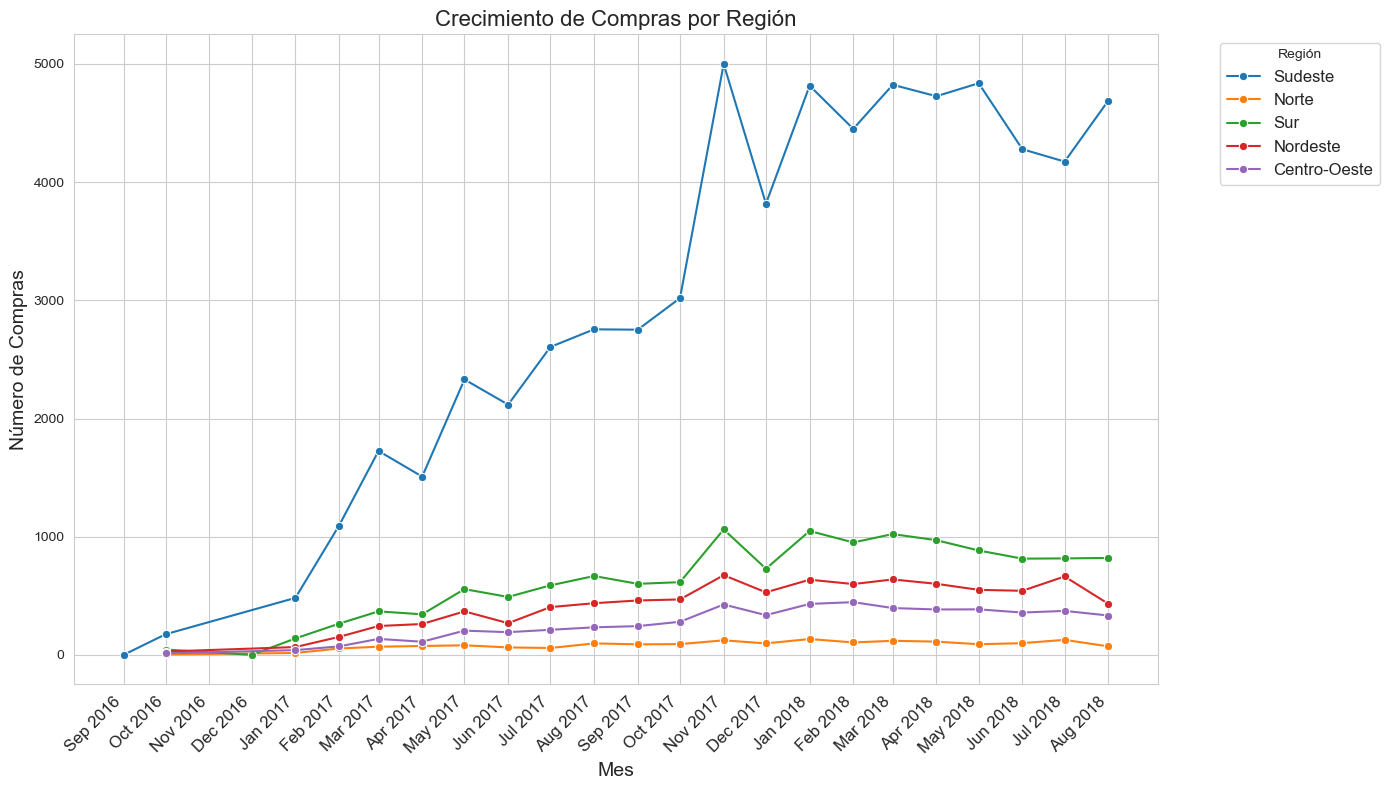

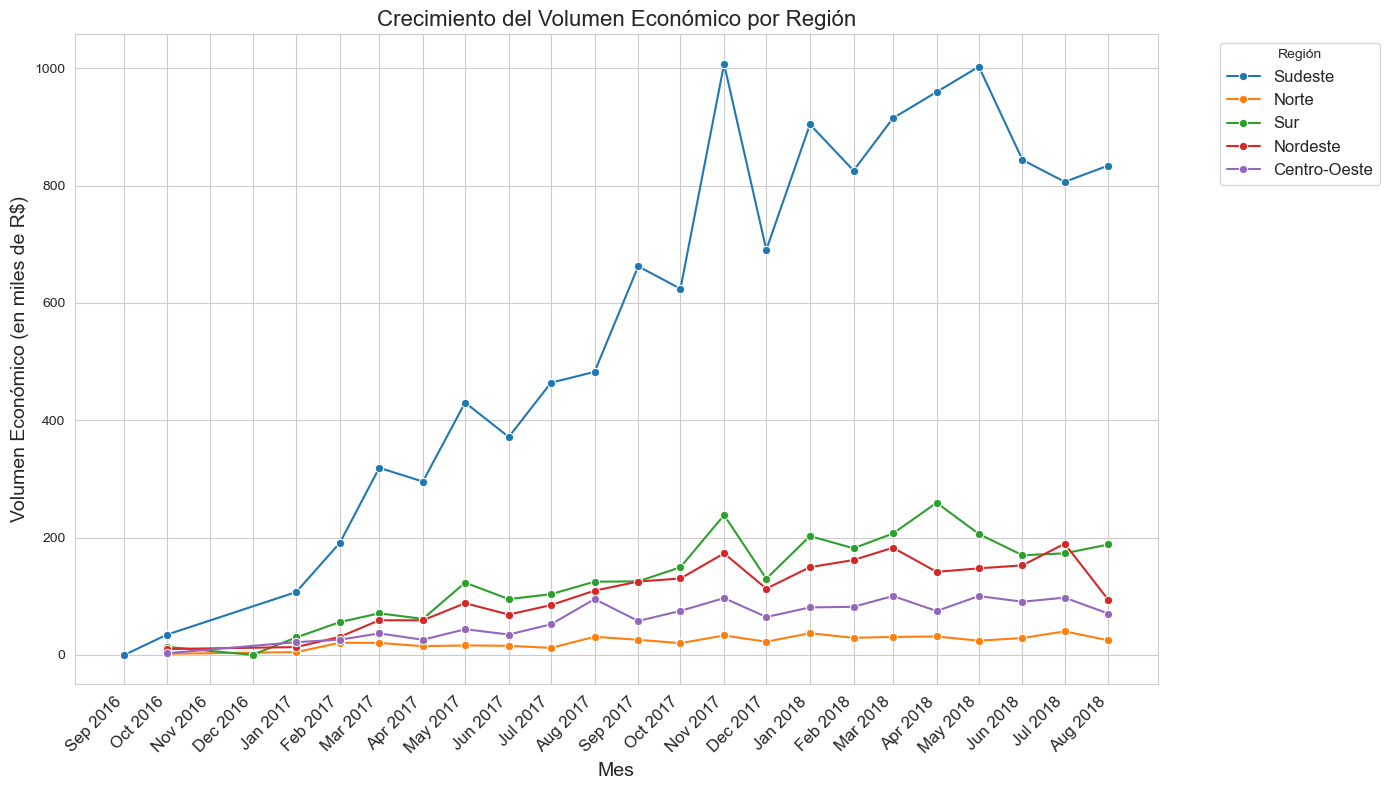

In [104]:
ventas_por_region_mes = df.groupby(['customer_region', 'month_year']).agg(
    total_pedidos=('order_id', 'nunique'),
    total_ventas=('payment_value', 'sum')
).reset_index()

ventas_por_region_mes['total_ventas'] = ventas_por_region_mes['total_ventas'] / 1_000

top_regiones = ventas_por_region_mes.groupby('customer_region')['total_ventas'].sum().sort_values(ascending=False).head(5).index
ventas_por_region_mes = ventas_por_region_mes[ventas_por_region_mes['customer_region'].isin(top_regiones)]

ventas_por_region_mes['month_year'] = pd.to_datetime(ventas_por_region_mes['month_year'], format='%Y-%m')
ventas_por_region_mes = ventas_por_region_mes.sort_values('month_year')

plt.figure(figsize=(14, 8))
sns.lineplot(data=ventas_por_region_mes, x='month_year', y='total_pedidos', hue='customer_region', marker='o', palette='tab10')
plt.title("Crecimiento de Compras por Región", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Número de Compras", fontsize=14)

# Asegurarse de que todos los meses estén etiquetados
plt.xticks(
    pd.date_range(ventas_por_region_mes['month_year'].min(), ventas_por_region_mes['month_year'].max(), freq='MS'),
    labels=[date.strftime('%b %Y') for date in pd.date_range(ventas_por_region_mes['month_year'].min(), ventas_por_region_mes['month_year'].max(), freq='MS')],
    rotation=45, ha='right', fontsize=12
)

plt.legend(title="Región", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=ventas_por_region_mes, x='month_year', y='total_ventas', hue='customer_region', marker='o', palette='tab10')
plt.title("Crecimiento del Volumen Económico por Región", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Volumen Económico (en miles de R$)", fontsize=14)

# Asegurarse de que todos los meses estén etiquetados
plt.xticks(
    pd.date_range(ventas_por_region_mes['month_year'].min(), ventas_por_region_mes['month_year'].max(), freq='MS'),
    labels=[date.strftime('%b %Y') for date in pd.date_range(ventas_por_region_mes['month_year'].min(), ventas_por_region_mes['month_year'].max(), freq='MS')],
    rotation=45, ha='right', fontsize=12
)

plt.legend(title="Región", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)
plt.tight_layout()
plt.show()


In [105]:
# Asumiendo que 'top_por_region' es el DataFrame con los datos procesados
fig = px.bar(top_por_region,
             x='customer_region',
             y='total_vendidos',
             color='product_category',
             title='Top 5 Categorías de Producto Más Vendidas por Región',
             labels={'total_vendidos': 'Total Vendido', 'customer_region': 'Región', 'product_category_name': 'Categoría de Producto'},
             color_discrete_sequence=['#e64e36', '#001647', '#c8906d', '#779e3d', '#0a4ee4', '#df9fc7', '#87c7ad'])

fig.update_layout(barmode='stack',
                  xaxis_title="Región",
                  yaxis_title="Total Vendido",
                  xaxis={'categoryorder':'total descending'},
                  showlegend=True)

fig.show()


In [106]:
# 1) Calcular el total de 'total_vendidos' por región
region_totals = top_por_region.groupby('customer_region', as_index=False)['total_vendidos'].sum()

# 2) Renombrar la columna de total (solo local, no cambies 'top_por_region')
region_totals.columns = ['customer_region', 'region_total']

# 3) Combinar (merge) para agregar la columna 'region_total' a 'top_por_region'
top_por_region = top_por_region.merge(region_totals, on='customer_region', how='left')

# 4) Crear la columna de porcentaje
top_por_region['pct_vendidos'] = (top_por_region['total_vendidos'] / top_por_region['region_total']) * 100

# 5) Graficar en porcentaje (en lugar de 'total_vendidos')
fig = px.bar(
    top_por_region,
    x='customer_region',
    y='pct_vendidos',
    color='product_category',
    title='Top 5 Categorías de Producto Más Vendidas por Región (Porcentaje)',
    labels={'pct_vendidos': 'Porcentaje', 'customer_region': 'Región', 'product_category': 'Categoría de Producto'},
    color_discrete_sequence=['#e64e36', '#001647', '#c8906d', '#779e3d', '#0a4ee4', '#df9fc7', '#87c7ad']
)

# 6) Ajustar el layout para ver la suma hasta 100% en el eje Y
fig.update_layout(
    barmode='stack',                  # Apilar para que cada región sume 100%
    xaxis_title="Región",
    yaxis_title="Porcentaje",
    xaxis={'categoryorder':'total descending'},
    yaxis=dict(range=[0,100]),        # Rango de 0 a 100 en el eje Y
    showlegend=True
)

fig.show()


# ¿Cuál es el medio de pago predominante?

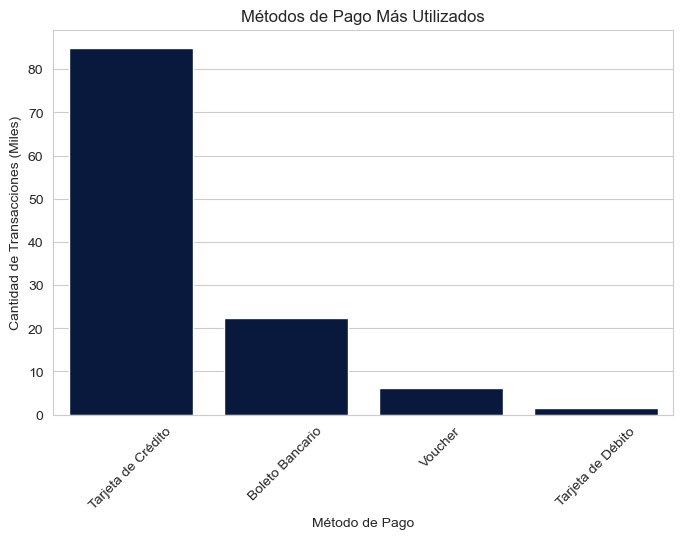

In [107]:
metodos_pago = df["payment_type"].value_counts() / 1000

plt.figure(figsize=(8, 5))
sns.barplot(x=metodos_pago.index, y=metodos_pago.values, color="#001647")  # Color azul oscuro

plt.title("Métodos de Pago Más Utilizados")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Transacciones (Miles)")

# Traducción de etiquetas
etiquetas_en_espanol = {
    "credit_card": "Tarjeta de Crédito",
    "boleto": "Boleto Bancario",
    "voucher": "Voucher",
    "debit_card": "Tarjeta de Débito",
}  # Agrega aquí la traducción de otras etiquetas si es necesario
plt.xticks(
    ticks=range(len(metodos_pago.index)),
    labels=[etiquetas_en_espanol.get(etiqueta, etiqueta) for etiqueta in metodos_pago.index],
    rotation=45
)

plt.show()

In [108]:
metodos_pago = df["payment_type"].value_counts()
metodos_pago

payment_type
credit_card    84895
boleto         22347
voucher         6123
debit_card      1653
Name: count, dtype: int64

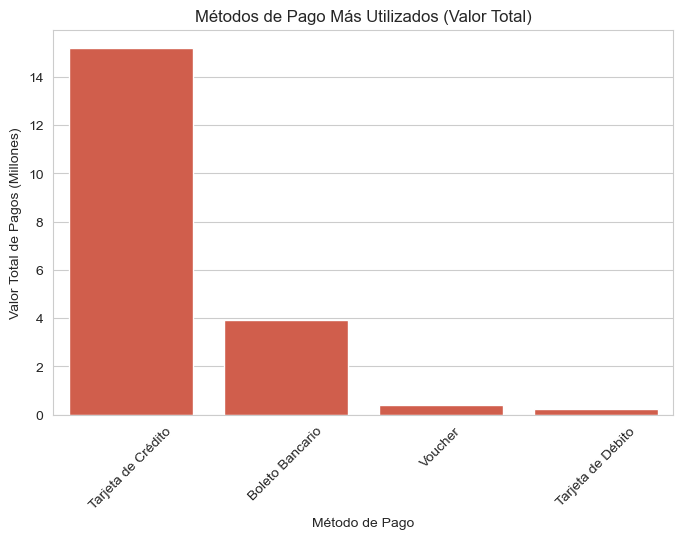

In [109]:
metodos_pago = df.groupby('payment_type')['payment_value'].sum() / 1000000
metodos_pago = metodos_pago.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=metodos_pago.index, y=metodos_pago.values, color="#e64e36")

# Traducción de etiquetas
etiquetas_en_espanol = {
    "credit_card": "Tarjeta de Crédito",
    "boleto": "Boleto Bancario",
    "voucher": "Voucher",
    "debit_card": "Tarjeta de Débito",
}

plt.title("Métodos de Pago Más Utilizados (Valor Total)")
plt.xlabel("Método de Pago")
plt.ylabel("Valor Total de Pagos (Millones)")

# Aplicar la traducción en plt.xticks()
plt.xticks(
    ticks=range(len(metodos_pago.index)),
    labels=[etiquetas_en_espanol.get(etiqueta, etiqueta) for etiqueta in metodos_pago.index],
    rotation=45
)

plt.show()


In [110]:
metodos_pago = df.groupby('payment_type')['payment_value'].sum()
metodos_pago = metodos_pago.sort_values(ascending=False)
metodos_pago

payment_type
credit_card    15189911.87
boleto          3940999.14
voucher          396110.42
debit_card       246373.27
Name: payment_value, dtype: float64

# ¿Cuál es el gasto promedio atendiendo al número de cuotas?

Payment installments indica el nº de cuotas totales de un pedido. Se contabiliza el precio del ticket para ver la tendencia a la hora de aplazar pagos.

In [111]:
pago_cuotas = df.groupby("payment_installments")["precio_ticket"].mean().reset_index()

fig = px.bar(
    pago_cuotas,
    x="payment_installments",
    y="precio_ticket",
    color_discrete_sequence=["#0a4ee4"]
)
fig.update_layout(
    title="Precio Ticket Promedio según Número de Cuotas",
    xaxis_title="Número de Cuotas",
    yaxis_title="Precio Ticket Promedio",
    showlegend=False
)
fig.update_xaxes(tickmode="linear", dtick=1)

fig.show()

In [112]:
pago_cuotas = df.groupby("payment_installments")["precio_ticket"].sum().reset_index()

fig = px.bar(
    pago_cuotas,
    x="payment_installments",
    y="precio_ticket",
    color_discrete_sequence=["#0a4ee4"]
)
fig.update_layout(
    title="Gasto Total según Número de Cuotas",
    xaxis_title="Número de Cuotas",
    yaxis_title="Gasto Total",
    showlegend=False
)
fig.update_xaxes(tickmode="linear", dtick=1)

fig.show()

In [113]:
suma_payment_value = df.groupby(['order_id', 'payment_sequential'])['payment_value'].first().sum()
suma_precio_ticket = df.groupby('order_id')['precio_ticket'].first().sum()

print(f"payment_value: {suma_payment_value}")
print(f"precio_ticket: {suma_precio_ticket}")


payment_value: 15419682.85
precio_ticket: 15419682.85


In [114]:
df.groupby("payment_installments")["precio_ticket"].sum().reset_index()

payment_installments  precio_ticket
0                    0.0         318.57
1                    1.0     8232402.93
2                    2.0     1833426.00
3                    3.0     1785612.09
4                    4.0     1417652.48
5                    5.0     1176596.62
6                    6.0     1070788.59
7                    7.0      345240.06
8                    8.0     1542567.38
9                    9.0      144772.20
10                  10.0     2908794.97
11                  11.0        3113.27
12                  12.0       52569.68
13                  13.0        2546.19
14                  14.0        2641.16
15                  15.0       36929.46
16                  16.0        2765.57
17                  17.0        1221.66
18                  18.0       18947.12
19                  20.0       11729.45
20                  21.0        1337.14
21                  22.0         228.71
22                  23.0         236.48
23                  24.0       27565.19

# ¿Cuál es la distribución de las calificaciones de los clientes en las reseñas?

In [115]:
review_counts = df['review_score'].value_counts().sort_index().reset_index()
review_counts.columns = ['Review Score', 'Cantidad']
review_counts["Review Score"] = review_counts["Review Score"].astype(int).astype(str)

fig = px.bar(
    review_counts,
    x="Review Score",
    y="Cantidad"
)

fig.update_traces(
    marker_color="#001647",  # Color azul
    textposition='outside',
    hoverinfo='x+y',
    hovertemplate='Score: %{x}<br>Cantidad: %{y}'
)

fig.update_layout(
    title="Distribución de Calificaciones de los clientes",
    xaxis_title="Calificación de la Reseña",
    yaxis_title="Cantidad",
    template="plotly_white"
)

fig.show()

# ¿Qué categorías de productos tienen las mejores y peores calificaciones?

In [116]:
calificaciones_categoria = df.groupby('product_category')['review_score'].mean().sort_values()
print(f"El top 5 de las categorías con mejor calificación: {calificaciones_categoria.round(2).sort_values(ascending = False).head()}")

El top 5 de las categorías con mejor calificación: product_category
fashion_childrens_clothes                5.00
cds_dvds_musicals                        4.64
books_imported                           4.53
books_general_interest                   4.50
small_appliances_home_oven_and_coffee    4.45
Name: review_score, dtype: float64


In [117]:
print(f"El top 5 de las categorías con peor calificación: {calificaciones_categoria.round(2).head()}")

El top 5 de las categorías con peor calificación: product_category
security_and_services                   2.50
pc_gamer                                3.33
diapers_and_hygiene                     3.38
kitchen_portables_and_food_preparers    3.43
office_furniture                        3.55
Name: review_score, dtype: float64


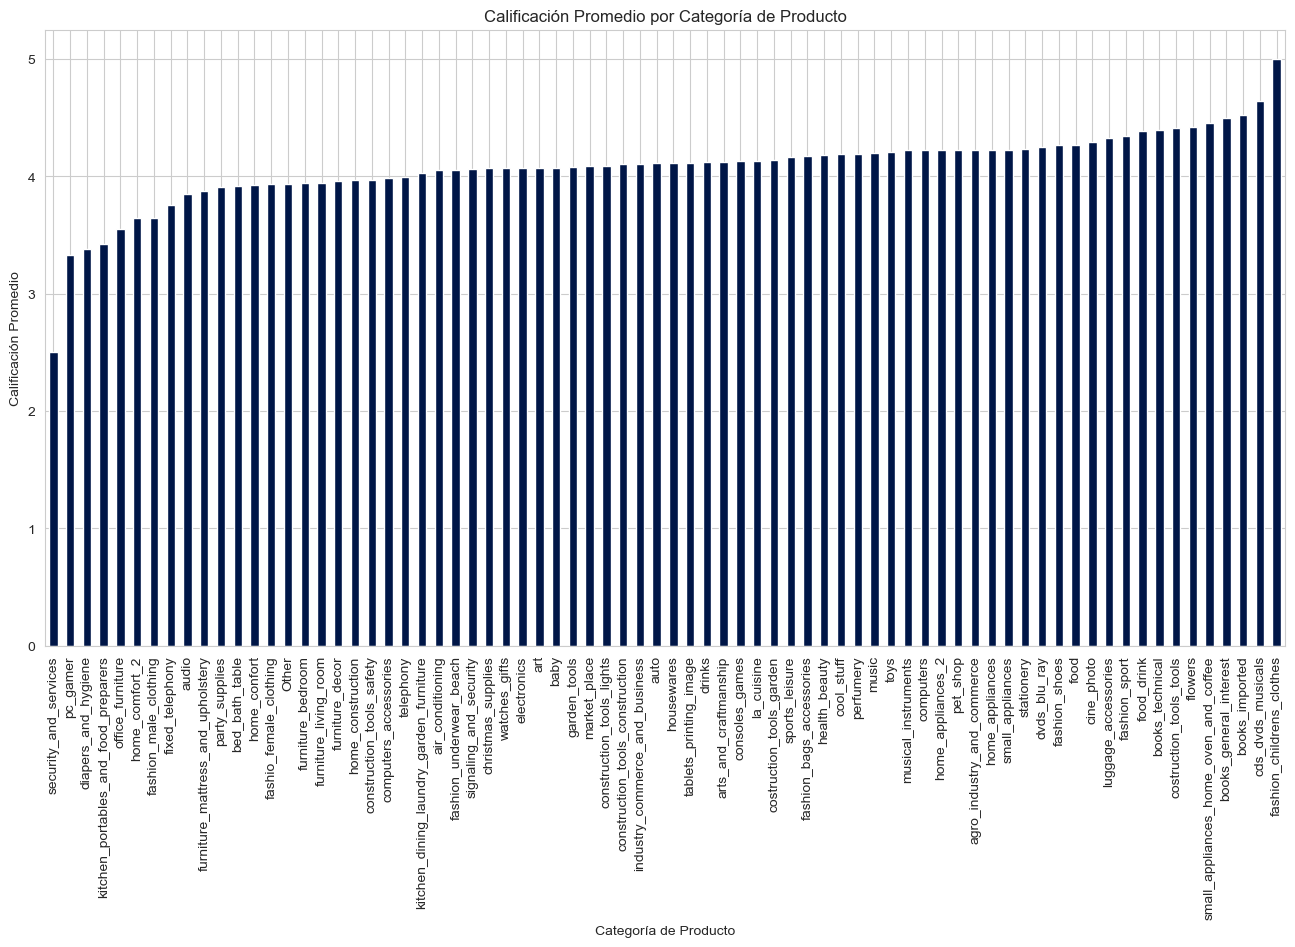

In [118]:
calificaciones_categoria = df.groupby('product_category')['review_score'].mean().sort_values()

colores = "#001647"

plt.figure(figsize=(16, 8))
calificaciones_categoria.plot(kind='bar', color=colores)
plt.title('Calificación Promedio por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Calificación Promedio')
plt.show()


# ¿Cómo se distribuyen las calificaciones por Estado?

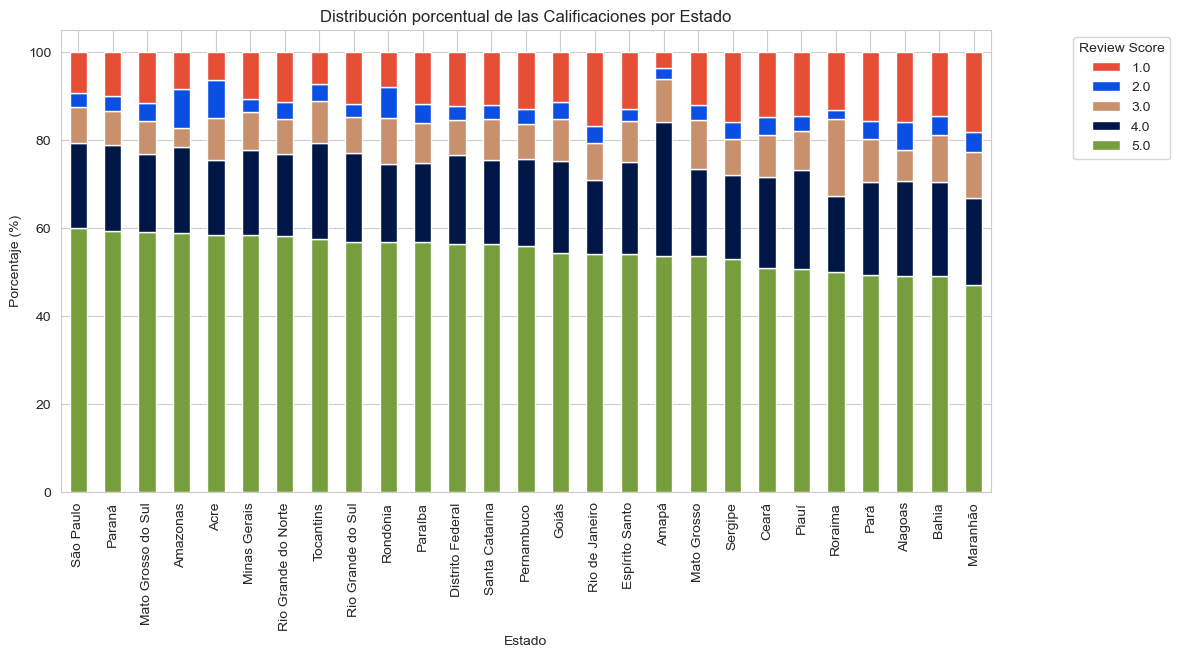

In [119]:

df_review_state = df.groupby('customer_full_state')['review_score'].value_counts().unstack().fillna(0)
df_review_state_pct = df_review_state.div(df_review_state.sum(axis=1), axis=0) * 100
df_review_state_pct = df_review_state_pct.round(2)

# Ordenar de mayor a menor según la calificación de 5 estrellas
df_review_state_pct = df_review_state_pct.iloc[:, ::-1]  # Primero invertir el orden de las columnas (5 → 1)
df_review_state_pct = df_review_state_pct.sort_values(by=5, ascending=False)  # Luego ordenar por la columna "5"

df_review_state_pct.plot(
    kind='bar',
    stacked=True,
    color=['#779e3d', '#001647', '#c8906d', '#0a4ee4', '#e64e36'],
    figsize=(12, 6)
)

plt.title('Distribución porcentual de las Calificaciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Porcentaje (%)')
plt.legend(
    title="Review Score",
    loc="upper right",
    bbox_to_anchor=(1.2,1),
    reverse=True
)

plt.show()


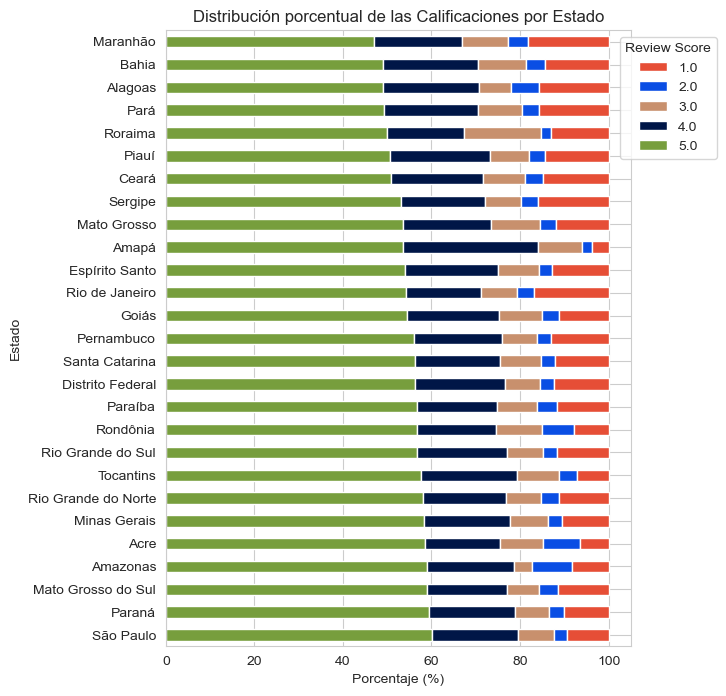

In [120]:
df_review_state = df.groupby('customer_full_state')['review_score'].value_counts().unstack().fillna(0)
df_review_state_pct = df_review_state.div(df_review_state.sum(axis=1), axis=0) * 100
df_review_state_pct = df_review_state_pct.round(2)

# Ordenar de mayor a menor según la calificación de 5 estrellas
df_review_state_pct = df_review_state_pct.iloc[:, ::-1]  # Primero invertir el orden de las columnas (5 → 1)
df_review_state_pct = df_review_state_pct.sort_values(by=5, ascending=False)  # Luego ordenar por la columna "5"

df_review_state_pct.plot(
    kind='barh',  # Cambiar a gráfico horizontal
    stacked=True,
    color=['#779e3d', '#001647', '#c8906d', '#0a4ee4', '#e64e36'],
    figsize=(6, 8)
)

plt.title('Distribución porcentual de las Calificaciones por Estado')
plt.xlabel('Porcentaje (%)')  # Etiqueta ajustada para gráfico horizontal
plt.ylabel('Estado')  # Etiqueta ajustada para gráfico horizontal
plt.legend(
    title="Review Score",
    loc="upper right",
    bbox_to_anchor=(1.2,1),
    reverse=True
)

plt.show()


In [121]:
df_review_state = df.groupby('customer_full_state')['review_score'].value_counts().unstack().fillna(0)
df_review_state_pct = df_review_state.div(df_review_state.sum(axis=1), axis=0) * 100
df_review_state_pct = df_review_state_pct.round(2)
df_review_state_pct.sort_values(by=5.0, ascending=False)

review_score           1.0   2.0    3.0    4.0    5.0
customer_full_state                                  
São Paulo             9.33  3.11   8.12  19.31  60.13
Paraná               10.00  3.44   7.63  19.53  59.40
Mato Grosso do Sul   11.52  4.20   7.32  17.89  59.06
Amazonas              8.33  8.93   4.17  19.64  58.93
Acre                  6.38  8.51   9.57  17.02  58.51
Minas Gerais         10.56  3.12   8.51  19.39  58.41
Rio Grande do Norte  11.31  3.95   7.90  18.67  58.17
Tocantins             7.21  3.90   9.61  21.62  57.66
Rio Grande do Sul    11.73  3.05   8.05  20.37  56.80
Rondônia              7.86  7.14  10.36  17.86  56.79
Paraíba              11.75  4.40   8.97  18.11  56.77
Distrito Federal     12.23  3.16   8.03  20.22  56.35
Santa Catarina       12.01  3.20   9.24  19.22  56.33
Pernambuco           12.94  3.32   7.91  19.80  56.03
Goiás                11.30  3.81   9.54  20.92  54.43
Rio de Janeiro       16.73  3.97   8.21  16.90  54.18
Espírito Santo       12.87  2.86   9.23  20.96  54.09
Amapá                 3.66  2.44   9.76  30.49  53.66
Mato Grosso          11.89  3.56  11.14  19.76  53.65
Sergipe              15.89  3.91   8.07  19.01  53.12
Ceará                14.76  4.02   9.52  20.79  50.91
Piauí                14.44  3.47   8.96  22.49  50.64
Roraima              13.04  2.17  17.39  17.39  50.00
Pará                 15.62  4.02   9.92  21.14  49.30
Alagoas              15.75  6.39   7.08  21.69  49.09
Bahia                14.40  4.31  10.71  21.54  49.04
Maranhão             18.13  4.56  10.36  19.85  47.10

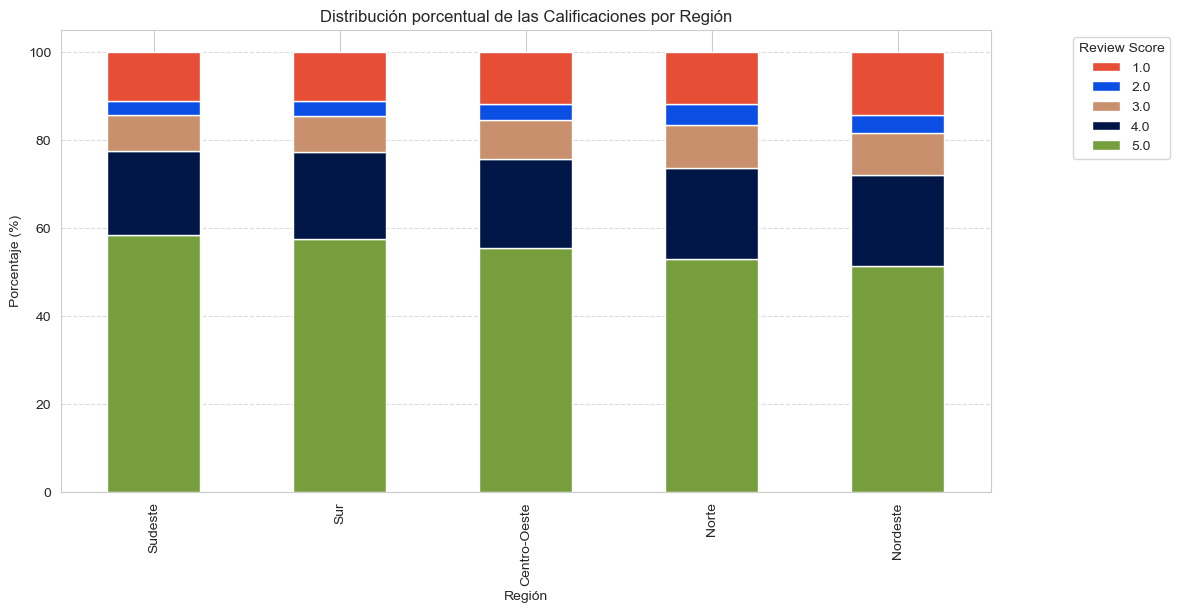

In [122]:
df_review_region = df.groupby('customer_region')['review_score'].value_counts().unstack().fillna(0)
df_review_region_pct = df_review_region.div(df_review_region.sum(axis=1), axis=0) * 100
df_review_region_pct = df_review_region_pct.round(2)

# Ordenar de mayor a menor según la calificación de 5 estrellas
df_review_region_pct = df_review_region_pct.iloc[:, ::-1]  # Primero invertir el orden de las columnas (5 → 1)
df_review_region_pct = df_review_region_pct.sort_values(by=5, ascending=False)  # Luego ordenar por la columna "5"

df_review_region_pct.plot(
    kind='bar',
    stacked=True,
    color=['#779e3d', '#001647', '#c8906d', '#0a4ee4', '#e64e36'],  # Colores en orden 5 → 1
    figsize=(12, 6)
)

plt.title('Distribución porcentual de las Calificaciones por Región')
plt.xlabel('Región')
plt.ylabel('Porcentaje (%)')
plt.legend(
    title="Review Score",
    loc="upper right",
    bbox_to_anchor=(1.2,1),
    reverse=True
)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [123]:
df_review_region = df.groupby('customer_region')['review_score'].value_counts().unstack().fillna(0)
df_review_region_pct = df_review_region.div(df_review_region.sum(axis=1), axis=0) * 100
df_review_region_pct = df_review_region_pct.round(2)
df_review_region_pct.sort_values(by=5.0, ascending=False)

review_score       1.0   2.0   3.0    4.0    5.0
customer_region                                 
Sudeste          11.03  3.27  8.23  18.92  58.55
Sur              11.18  3.23  8.21  19.78  57.60
Centro-Oeste     11.76  3.58  8.97  20.10  55.58
Norte            11.68  4.92  9.60  20.75  53.04
Nordeste         14.28  4.14  9.45  20.62  51.52

# ¿Los clientes que dejan comentarios negativos tienen patrones de compra distintos a los que dejan comentarios positivos?

In [124]:
df['review_score'].count()

reseñas_positivas_ = df[df['review_score'] >= 4]
reseñas_neutras_ = df[df['review_score'] == 3]
reseñas_negativas_ = df[df['review_score'] <= 2]
sin_reseña_ = df[df['review_score'].isnull()]

# Calcular el porcentaje y formatear a 2 decimales
total_reseñas = df['review_score'].count()

print(f"reseñas positivas: {reseñas_positivas_['payment_value'].count()} ({(reseñas_positivas_['payment_value'].count() / total_reseñas) * 100:.2f}%)")
print(f"reseñas neutras: {reseñas_neutras_['payment_value'].count()} ({(reseñas_neutras_['payment_value'].count() / total_reseñas) * 100:.2f}%)")
print(f"reseñas negativas: {reseñas_negativas_['payment_value'].count()} ({(reseñas_negativas_['payment_value'].count() / total_reseñas) * 100:.2f}%)")
print(f"sin reseñas: {sin_reseña_['payment_value'].count()} ({(sin_reseña_['payment_value'].count() / total_reseñas) * 100:.2f}%)")
print(f"Total reseñas: {total_reseñas}")


reseñas positivas: 87669 (76.79%)
reseñas neutras: 9601 (8.41%)
reseñas negativas: 16887 (14.79%)
sin reseñas: 861 (0.75%)
Total reseñas: 114160


In [125]:
print("reseñas 5:", df[df['review_score'] == 5]['review_score'].count())
print("reseñas 4:", df[df['review_score'] == 4]['review_score'].count())
print("reseñas 3:", df[df['review_score'] == 3]['review_score'].count())
print("reseñas 2:", df[df['review_score'] == 2]['review_score'].count())
print("reseñas 1:", df[df['review_score'] == 1]['review_score'].count())

reseñas 5: 65634
reseñas 4: 22035
reseñas 3: 9601
reseñas 2: 3869
reseñas 1: 13021


In [126]:
reseñas_positivas = df[df['review_score'] >= 4]
reseñas_neutras = df[df['review_score'] ==3]
reseñas_negativas = df[df['review_score'] <= 2]
sin_reseña = df[df['review_score'].isnull()]

print("Promedio de valor de pago en reseñas positivas:", reseñas_positivas['payment_value'].mean().round(2))
print("Promedio de valor de pago en reseñas neutras:", reseñas_neutras['payment_value'].mean().round(2))
print("Promedio de valor de pago en reseñas negativas:", reseñas_negativas['payment_value'].mean().round(2))
print("Promedio de valor de pago sin reseña:", sin_reseña['payment_value'].mean().round(2))

Promedio de valor de pago en reseñas positivas: 161.56
Promedio de valor de pago en reseñas neutras: 167.89
Promedio de valor de pago en reseñas negativas: 224.18
Promedio de valor de pago sin reseña: 245.84


In [127]:
reseñas_positivas = df[df['review_score'] >= 4]
reseñas_neutras = df[df['review_score'] ==3]
reseñas_negativas = df[df['review_score'] <= 2]
sin_reseña = df[df['review_score'].isnull()]

print("Precio promedio en reseñas positivas:", reseñas_positivas['price'].mean().round(2))
print("Precio promedio en reseñas neutras:", reseñas_neutras['price'].mean().round(2))
print("Precio promedio en reseñas negativas:", reseñas_negativas['price'].mean().round(2))
print("Precio promedio sin reseña:", sin_reseña['price'].mean().round(2))

Precio promedio en reseñas positivas: 120.83
Precio promedio en reseñas neutras: 108.83
Precio promedio en reseñas negativas: 121.62
Precio promedio sin reseña: 138.44


In [128]:
reseñas_positivas = df[df['review_score'] >= 4]
reseñas_neutras = df[df['review_score'] ==3]
reseñas_negativas = df[df['review_score'] <= 2]
sin_reseña = df[df['review_score'].isnull()]

print("Valor de flete promedio en reseñas positivas:", reseñas_positivas['freight_value'].mean().round(2))
print("Valor de flete promedio en reseñas neutras:", reseñas_neutras['freight_value'].mean().round(2))
print("Valor de flete promedio en reseñas negativas:", reseñas_negativas['freight_value'].mean().round(2))
print("Valor de flete promedio sin reseña:", sin_reseña['freight_value'].mean().round(2))

Valor de flete promedio en reseñas positivas: 19.75
Valor de flete promedio en reseñas neutras: 20.24
Valor de flete promedio en reseñas negativas: 21.09
Valor de flete promedio sin reseña: 20.96


In [129]:
reseñas_positivas = df[df['review_score'] >= 4]
reseñas_neutras = df[df['review_score'] ==3]
reseñas_negativas = df[df['review_score'] <= 2]
sin_reseña = df[df['review_score'].isnull()]

print("Ticket de mayor precio en reseñas positivas:", reseñas_positivas['precio_ticket'].max())
print("Ticket de mayor precio  en reseñas neutras:", reseñas_neutras['precio_ticket'].max())
print("Ticket de mayor precio  en reseñas negativas:", reseñas_negativas['precio_ticket'].max())
print("Ticket de mayor precio  sin reseña:", sin_reseña['precio_ticket'].max())

Ticket de mayor precio en reseñas positivas: 6929.31
Ticket de mayor precio  en reseñas neutras: 3242.84
Ticket de mayor precio  en reseñas negativas: 13664.08
Ticket de mayor precio  sin reseña: 6922.21


In [130]:
max_positivas = reseñas_positivas.loc[reseñas_positivas['precio_ticket'].idxmax()]
max_neutras = reseñas_neutras.loc[reseñas_neutras['precio_ticket'].idxmax()]
max_negativas = reseñas_negativas.loc[reseñas_negativas['precio_ticket'].idxmax()]
max_sin_reseña = sin_reseña.loc[sin_reseña['precio_ticket'].idxmax()]

tabla_max = pd.DataFrame([max_positivas, max_neutras, max_negativas, max_sin_reseña])
tabla_max.insert(0, 'Valoración', ['Positiva', 'Neutra', 'Negativa', 'Sin Reseña'])

tabla_max

Valoración                          order_id  \
70650    Positiva  0812eb902a67711a1cb742b3cdaa65ae   
87958      Neutra  912343626f370ead5ef2e85a9d757e22   
44008    Negativa  03caa2c082116e1d31e67e9ae3700499   
23130  Sin Reseña  fefacc66af859508bf1a7934eab1e97f   

                            customer_id order_status order_purchase_timestamp  \
70650  c6e2731c5b391845f6800c97401a43a9    delivered      2017-02-12 20:37:36   
87958  f7622098214b4634b7fe7eee269b5426    delivered      2018-06-01 19:08:41   
44008  1617b1357756262bfa56ab541c47bc16    delivered      2017-09-29 15:24:52   
23130  f48d464a0baaea338cb25f816991ab1f    delivered      2018-07-25 18:10:17   

        order_approved_at order_delivered_carrier_date  \
70650 2017-02-12 20:45:12          2017-02-16 09:23:13   
87958 2018-06-01 19:31:26          2018-06-04 11:38:00   
44008 2017-10-02 15:28:20          2017-10-10 15:43:17   
23130 2018-07-27 04:05:13          2018-08-03 14:42:00   

      order_delivered_customer_date order_estimated_delivery_date  \
70650           2017-03-03 14:23:18                    2017-03-09   
87958           2018-06-15 00:05:57                    2018-07-19   
44008           2017-10-17 18:22:29                    2017-10-23   
23130           2018-08-15 14:57:50                    2018-08-10   

                     customer_unique_id  customer_zip_code_prefix  \
70650  dc4802a71eae9be1dd28f5d788ceb526                     79042   
87958  adfa1cab2b2c8706db21bb13c0a1beb1                     78360   
44008  0a0a92112bd4c708ca5fde585afaa872                     20080   
23130  459bef486812aa25204be022145caa62                     29066   

               customer_city customer_state  order_item_id  \
70650           campo grande             MS              1   
87958  campo novo do parecis             MT              1   
44008         rio de janeiro             RJ              1   
23130                vitoria             ES              1   

                             product_id                         seller_id  \
70650  489ae2aa008f021502940f251d4cce7f  e3b4998c7a498169dc7bce44e6bb6277   
87958  cec51758e9839eb5414b214934430da6  52d76513f0c4d97f3b99570e2c94ee31   
44008  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   
23130  69c590f7ffc7bf8db97190b6cb6ed62e  80ceebb4ee9b31afb6c6a916a574a1e2   

      shipping_limit_date   price  freight_value  payment_sequential  \
70650 2017-02-16 20:37:36  6735.0         194.31                 1.0   
87958 2018-06-11 19:30:41   529.9          64.69                 1.0   
44008 2017-10-06 15:28:20  1680.0          28.01                 1.0   
23130 2018-08-02 04:05:13  6729.0         193.21                 1.0   

      payment_type  payment_installments  payment_value  \
70650  credit_card                   8.0        6929.31   
87958  credit_card                  10.0        3242.84   
44008  credit_card                   1.0       13664.08   
23130       boleto                   1.0        6922.21   

                              review_id  review_score review_comment_title  \
70650  e2fbd9f0ef7b724c7ecb351601a857e7           5.0                  NaN   
87958  b00226ada6d8fc0b12d3639eb2aac021           3.0           falta item   
44008  211fa81a22870cc634265ea85b751e40           1.0                  NaN   
23130                               NaN           NaN                  NaN   

                                  review_comment_message review_creation_date  \
70650  Mesmo a máquina ter vindo errada, já se pronti...  2017-03-04 00:00:00   
87958                    talvez chegue em outro despacho  2018-06-16 00:00:00   
44008  Peço por favor verificar a entrega do pedido, ...  2017-10-18 00:00:00   
23130                                                NaN                  NaN   

      review_answer_timestamp    product_category_name  product_name_lenght  \
70650     2017-03-04 21:40:41    utilidades_domesticas                 31.0   
87958     2018-06-17 05:33:13  si

In [131]:
df[df['order_id']=="fefacc66af859508bf1a7934eab1e97f"]

order_id                       customer_id  \
23130  fefacc66af859508bf1a7934eab1e97f  f48d464a0baaea338cb25f816991ab1f   

      order_status order_purchase_timestamp   order_approved_at  \
23130    delivered      2018-07-25 18:10:17 2018-07-27 04:05:13   

      order_delivered_carrier_date order_delivered_customer_date  \
23130          2018-08-03 14:42:00           2018-08-15 14:57:50   

      order_estimated_delivery_date                customer_unique_id  \
23130                    2018-08-10  459bef486812aa25204be022145caa62   

       customer_zip_code_prefix customer_city customer_state  order_item_id  \
23130                     29066       vitoria             ES              1   

                             product_id                         seller_id  \
23130  69c590f7ffc7bf8db97190b6cb6ed62e  80ceebb4ee9b31afb6c6a916a574a1e2   

      shipping_limit_date   price  freight_value  payment_sequential  \
23130 2018-08-02 04:05:13  6729.0         193.21                 1.0   

      payment_type  payment_installments  payment_value review_id  \
23130       boleto                   1.0        6922.21       NaN   

       review_score review_comment_title review_comment_message  \
23130           NaN                  NaN                    NaN   

      review_creation_date review_answer_timestamp product_category_name  \
23130                  NaN                     NaN                   pcs   

       product_name_lenght  product_description_lenght  product_photos_qty  \
23130                 50.0                      1935.0                 4.0   

       product_weight_g  product_length_cm  product_height_cm  \
23130            5660.0               54.0               18.0   

       product_width_cm  seller_zip_code_prefix seller_city seller_state  \
23130              47.0                   86026    londrina           PR   

      product_category  day_of_month  hour  month month_year day_of_week  \
23130        computers            25    18      7    2018-07   Wednesday   

       processing_time  approval_time  prep_time  shipping_late_days  \
23130               20              1          7                   1   

       delivery_delay  on_time  late_delivery customer_region seller_region  \
23130               5    False           True         Sudeste           Sur   

      customer_full_state seller_full_state  max_order_item_id  \
23130      Espírito Santo            Paraná                  1   

       max_payment_sequential most_frequent_payment_type  precio_ticket  \
23130                     1.0                     boleto        6922.21   

       beneficio_ticket  num_pedidos frecuencia_compra  rango_ticket  \
23130               0.0            1      Compra Única  Ticket > 500   

       freq_score  VM_score  sum_score  Total_score  dias_entre_compras  \
23130           1         5          6            3                 9.0   

      frecuencia_temporal  freq_score_categoria rango_precio_producto  \
23130      Compra Semanal                     4         Precio > 1000   

       score_valor_producto  sum_score_categoria  total_score_categoria  \
23130                     5                    9                      3   

      total_score_categoria_grouped  orders    revenue  revenue_millions  
23130                             2     177  274671.88          0.274672

In [132]:
reseñas_positivas = df[df['review_score'] >= 4]
reseñas_neutras = df[df['review_score'] ==3]
reseñas_negativas = df[df['review_score'] <= 2]
sin_reseña = df[df['review_score'].isnull()]

print("Mínimo valor de pago en reseñas positivas:", reseñas_positivas['payment_value'].min())
print("Mínimo valor de pago en reseñas neutras:", reseñas_neutras['payment_value'].min())
print("Mínimo valor de pago en reseñas negativas:", reseñas_negativas['payment_value'].min())
print("Mínimo valor de pago sin reseña:", sin_reseña['payment_value'].min())

Mínimo valor de pago en reseñas positivas: 0.0
Mínimo valor de pago en reseñas neutras: 0.14
Mínimo valor de pago en reseñas negativas: 0.0
Mínimo valor de pago sin reseña: 0.14


In [133]:
reseñas_positivas = df[df['review_score'] >= 4]
reseñas_neutras = df[df['review_score'] ==3]
reseñas_negativas = df[df['review_score'] <= 2]
sin_reseña = df[df['review_score'].isnull()]

print("Precio ticket promedio en reseñas positivas:", reseñas_positivas['precio_ticket'].mean().round(2))
print("Precio ticket promedio en reseñas neutras:", reseñas_neutras['precio_ticket'].mean().round(2))
print("Precio ticket promedio en reseñas negativas:", reseñas_negativas['precio_ticket'].mean().round(2))
print("Precio ticket promedio sin reseña:", sin_reseña['precio_ticket'].mean().round(2))

Precio ticket promedio en reseñas positivas: 168.84
Precio ticket promedio en reseñas neutras: 173.49
Precio ticket promedio en reseñas negativas: 232.74
Precio ticket promedio sin reseña: 256.81


In [134]:
variedad_reviews = df.groupby('order_id')['review_score'].nunique()
diferentes_reviews = variedad_reviews[variedad_reviews >1]

print(f"Cantidad de órdenes con diferentes review scores: {diferentes_reviews.count()}")
print(diferentes_reviews.head(10))


Cantidad de órdenes con diferentes review scores: 0
Series([], Name: review_score, dtype: int64)


In [135]:
df[df['order_id'].isin(diferentes_reviews.index)][['order_id', 'order_item_id', 'review_score']].sort_values('order_id')


Empty DataFrame
Columns: [order_id, order_item_id, review_score]
Index: []

# ¿Cómo impacta el tiempo de entrega en la calificación del pedido?

Se crea columna `delivery_delay`, indica la diferencia entre la fecha estimada de entrega y la fecha real de entrega.

Se crean las columnas `on_time, `late_delivery`que de manera independiente informan si la entrega se hizo a tiempo o tarde

In [136]:
df['late_delivery_label'] = df['late_delivery'].map({False: "on_time", True: "late_delivery"})

# Agrupar por review_score y estado de entrega
df_delivery_review = df.groupby(['late_delivery_label', 'review_score']).size().unstack().fillna(0)

# Convertir a porcentaje
df_delivery_review = df_delivery_review.div(df_delivery_review.sum(axis=1), axis=0) * 100

# Graficar
fig = px.bar(
    df_delivery_review.T,
    barmode="stack",
    color_discrete_sequence=['#e64e36', '#001647', '#c8906d', '#779e3d', '#0a4ee4']
)

fig.update_layout(
    title="Impacto de los pedidos tardíos y en tiempo en las Puntuaciones",
    xaxis_title="Puntuación",
    yaxis_title="Porcentaje (%)",
    xaxis=dict(type="category"),
    legend_title="Entrega a Tiempo",
)

fig.show()


In [137]:
df_delivery_review = df.groupby(['review_score', 'late_delivery_label']).size().unstack().fillna(0)
df_delivery_review = df_delivery_review.div(df_delivery_review.sum(axis=1), axis=0) * 100



# Graficar
fig = px.bar(
    df_delivery_review,
    barmode="stack",
    color_discrete_sequence=['#e64e36', '#001647', '#c8906d', '#779e3d', '#0a4ee4']
)

fig.update_layout(
    title="Impacto de los pedidos tardíos y en tiempo en las Puntuaciones",
    xaxis_title="Puntuación",
    yaxis_title="Porcentaje (%)",
    xaxis=dict(type="category"),
    legend_title="Entrega a Tiempo",
)

fig.show()


In [138]:
df_delivery_review = df.groupby(['review_score', 'late_delivery_label']).size().unstack().fillna(0)
df_delivery_review = df_delivery_review.div(df_delivery_review.sum(axis=1), axis=0) * 100

# Graficar
fig = px.bar(
    df_delivery_review,
    barmode="stack",
    color_discrete_sequence=['#e64e36', '#001647', '#c8906d', '#779e3d', '#0a4ee4'],
    orientation='h'  # Cambiar a gráfico horizontal
)

fig.update_layout(
    title="Impacto de los pedidos tardíos y en tiempo en las Puntuaciones",
    xaxis_title="Porcentaje (%)",  # Cambiar etiqueta para el eje X
    yaxis_title="Puntuación",  # Cambiar etiqueta para el eje Y
    legend_title="Entrega a Tiempo",
    height=800,  # Ajustar altura
    width=600,   # Ajustar anchura
)

fig.show()


In [139]:
df[df['review_score']<3]['order_id'].count()

16890

In [140]:
(df[(df['review_score'] >3) & (df['late_delivery'] == True)]['order_id'].count())/(df[df['review_score']>3]['order_id'].count())


0.022083062427996212

In [141]:
(df[(df['review_score'] <3) & (df['late_delivery'] == True)]['order_id'].count())/(df[df['review_score']<3]['order_id'].count())

0.2738306690349319

In [142]:
(df[(df['review_score'] < 2) & (df['late_delivery'] == True)]['order_id'].count())/(df[df['review_score']<2]['order_id'].count())

0.3068120728054681

In [143]:
df['late_delivery_label'] = df['late_delivery'].map({False: "on_time", True: "late_delivery"})

df_delivery_review = df.groupby(['late_delivery_label', 'review_score']).size().unstack().fillna(0)

fig = px.bar(
    df_delivery_review.T,
    barmode="stack",
    color_discrete_sequence=['#e64e36', '#001647', '#c8906d', '#779e3d', '#0a4ee4']
)

fig.update_layout(
    title="Impacto de los pedidos tardíos y en tiempo en las Puntuaciones",
    xaxis_title="Puntuaciones",
    yaxis_title="Cantidad de Pedidos",
    xaxis=dict(type="category"),
    legend_title="Entrega a Tiempo",
)

fig.show()



# ¿Cuáles son los plazos en las distintas fases de envío?

In [144]:

print('\033[1mTiempo total de procesamiento del pedido: medir la eficiencia de todo el proceso logístico, desde la compra hasta la entrega final.\033[0m')
max_processing_time = df.sort_values(by='processing_time', ascending=False).iloc[0]['processing_time']
min_processing_time = df.sort_values(by='processing_time', ascending=False).iloc[-1]['processing_time']
mean_processing_time = df['processing_time'].mean().round(2)
print(f"Tiempo total de procesamiento del pedido máximo: {max_processing_time}")
print(f"Tiempo total de procesamiento del pedido mínimo: {min_processing_time}")
print(f"Tiempo total de procesamiento del pedido medio: {mean_processing_time}")
print("_" * 20)

print('\033[1mTiempo de aprobación del pedido:Identificar si hay un retraso en la aprobación de pedidos que podría estar afectando los tiempos generales.\033[0m')
max_approval_time = df.sort_values(by='approval_time', ascending=False).iloc[0]['approval_time']
min_approval_time = df.sort_values(by='approval_time', ascending=False).iloc[-1]['approval_time']
mean_approval_time = df['approval_time'].mean().round(2)
print(f"Tiempo total de aprobación del pedido máximo: {max_approval_time}")
print(f"Tiempo total de aprobación del pedido mínimo: {min_approval_time}")
print(f"Tiempo total de aprobación del pedido medio: {mean_approval_time}")
print("_" * 20)

print('\033[1mTiempo de preparación antes de la entrega al transportista:Un retraso en esta fase puede indicar problemas en la preparación de los productos o en la gestión de inventario.\033[0m')
max_prep_time = df.sort_values(by='prep_time', ascending=False).iloc[0]['prep_time']
min_prep_time = df.sort_values(by='prep_time', ascending=False).iloc[-1]['prep_time']
mean_prep_time = df['prep_time'].mean().round(2)
print(f"Tiempo total de preparación antes de la entrega al transportista máximo: {max_prep_time}")
print(f"Tiempo total de preparación antes de la entrega al transportista mínimo: {min_prep_time}")
print(f"Tiempo total de preparación antes de la entrega al transportista medio: {mean_prep_time}")
print("_" * 20)

print('\033[1mCumplimiento con la fecha límite de envío:  Identificar si hay retrasos en la fase de envío que podrían afectar la capacidad de cumplir con las fechas de entrega estimadas.\033[0m')
max_shipping_late_days = df.sort_values(by='shipping_late_days', ascending=False).iloc[0]['shipping_late_days']
min_shipping_late_days = df.sort_values(by='shipping_late_days', ascending=False).iloc[-1]['shipping_late_days']
mean_shipping_late_days = df['shipping_late_days'].mean().round(2)
print(f"Retraso en la dase de envío máximo: {max_shipping_late_days}")
print(f"Retraso en la dase de envío máximo mínimo: {min_shipping_late_days}")
print(f"Retraso en la dase de envío máximo medio: {mean_shipping_late_days}")
print("_" * 20)

print('\033[1mCumplimiento con la fecha estimada de entrega: permite ver si los pedidos llegaron dentro de los tiempos estimados, lo cual es fundamental para la satisfacción del cliente.\033[0m')
max_delivery_delay = df.sort_values(by='delivery_delay', ascending=False).iloc[0]['delivery_delay']
min_delivery_delay = df.sort_values(by='delivery_delay', ascending=False).iloc[-1]['delivery_delay']
mean_delivery_delay = df['delivery_delay'].mean().round(2)
print(f"Mayor retraso en la fecha estimada de entrega : {max_delivery_delay}")
print(f"Mayor adelanto en la fecha estimada de entrega: {min_delivery_delay}")
print(f"Cumplimiento con la fecha estimada de entrega medio: {mean_delivery_delay}")
print("_" * 20)
print('\033[1mTiempo de entrega real frente a estimada: Es útil para mejorar las estimaciones de tiempo y detectar problemas recurrentes en la cadena de suministro.\033[0m')
a_tiempo =  df['on_time'].sum()
print(f"El número de entregas en plazo es de: {a_tiempo}")
print("_" * 20)
print('\033[1mAnálisis de pedidos tardíos:Determinar qué porcentaje de pedidos llegan tarde, lo cual es crucial para mejorar el servicio al cliente y la logística.\033[0m')
retrasos = df['late_delivery'].sum()
print(f"El número de entregas fuera de plazo es de: {retrasos}")

Tiempo total de procesamiento del pedido: medir la eficiencia de todo el proceso logístico, desde la compra hasta la entrega final.
Tiempo total de procesamiento del pedido máximo: 209
Tiempo total de procesamiento del pedido mínimo: 0
Tiempo total de procesamiento del pedido medio: 12.02
____________________
Tiempo de aprobación del pedido:Identificar si hay un retraso en la aprobación de pedidos que podría estar afectando los tiempos generales.
Tiempo total de aprobación del pedido máximo: 30
Tiempo total de aprobación del pedido mínimo: 0
Tiempo total de aprobación del pedido medio: 0.27
____________________
Tiempo de preparación antes de la entrega al transportista:Un retraso en esta fase puede indicar problemas en la preparación de los productos o en la gestión de inventario.
Tiempo total de preparación antes de la entrega al transportista máximo: 125
Tiempo total de preparación antes de la entrega al transportista mínimo: -172
Tiempo total de preparación antes de la entrega al tr

In [145]:

def plot_all(df):
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(3, 3, figsize=(18, 14))

    # 1) Violin Plot: Distribución del Tiempo de Procesamiento
    sns.violinplot(x=df['processing_time'], inner='quartile', color='#E64E36', ax=axes[0, 0])
    axes[0, 0].set_title('Distribución del Tiempo de Procesamiento', fontsize=12)
    axes[0, 0].set_xlabel('Tiempo (días)', fontsize=10)
    axes[0, 0].grid(True, linestyle="--", alpha=0.7)

    # 2) Boxplot: Tiempo de Aprobación
    sns.boxplot(x=df['approval_time'], color='#779E3D', ax=axes[0, 1])
    mean_approval = df['approval_time'].mean()
    axes[0, 1].axvline(mean_approval, color='black', linestyle='--', label=f'Media: {mean_approval:.2f} días')
    axes[0, 1].legend()
    axes[0, 1].set_title('Distribución del Tiempo de Aprobación', fontsize=12)
    axes[0, 1].set_xlabel('Tiempo (días)', fontsize=10)
    axes[0, 1].grid(True, linestyle="--", alpha=0.7)

    # 3) Boxplot: Tiempo de Preparación
    sns.boxplot(x=df['prep_time'], color='#C8906D', ax=axes[0, 2])
    axes[0, 2].set_title('Distribución del Tiempo de Preparación', fontsize=12)
    axes[0, 2].set_xlabel('Tiempo (días)', fontsize=10)
    axes[0, 2].grid(True, linestyle="--", alpha=0.7)

    # 4) Histograma: Tiempo de Preparación
    sns.histplot(df['prep_time'], kde=True, bins=30, color='#C8906D', ax=axes[1, 0])
    axes[1, 0].set_title('Histograma del Tiempo de Preparación', fontsize=12)
    axes[1, 0].set_xlabel('Tiempo (días)', fontsize=10)
    axes[1, 0].grid(True, linestyle="--", alpha=0.7)

    # 5) Boxplot: Retrasos en Envío
    sns.boxplot(x=df['shipping_late_days'], color='#E64E36', ax=axes[1, 1])
    axes[1, 1].set_title('Distribución de Retrasos en Envío', fontsize=12)
    axes[1, 1].set_xlabel('Días de Retraso', fontsize=10)
    axes[1, 1].grid(True, linestyle="--", alpha=0.7)

    # 6) Histograma: Retrasos en Envío
    sns.histplot(df['shipping_late_days'], kde=True, bins=30, color='#E64E36', ax=axes[1, 2])
    axes[1, 2].set_title('Histograma de Retrasos en Envío', fontsize=12)
    axes[1, 2].set_xlabel('Días de Retraso', fontsize=10)
    axes[1, 2].grid(True, linestyle="--", alpha=0.7)

    # 7) Boxplot: Retrasos/Adelantos en la Entrega
    sns.boxplot(x=df['delivery_delay'], color='#87C7AD', ax=axes[2, 0])
    axes[2, 0].set_title('Distribución de Retrasos/Adelantos', fontsize=12)
    axes[2, 0].set_xlabel('Días (positivo=retraso, negativo=adelanto)', fontsize=9)
    axes[2, 0].grid(True, linestyle="--", alpha=0.7)

    # 8) Histograma: Retrasos/Adelantos
    sns.histplot(df['delivery_delay'], kde=True, bins=30, color='#87C7AD', ax=axes[2, 1])
    axes[2, 1].set_title('Histograma de Retrasos/Adelantos', fontsize=12)
    axes[2, 1].set_xlabel('Días (positivo=retraso, negativo=adelanto)', fontsize=9)
    axes[2, 1].grid(True, linestyle="--", alpha=0.7)

    # 9) Gráfico de Barras: Entregas a Tiempo vs. Tardías
    on_time = df['on_time'].sum()         # Cantidad de True
    late = df['late_delivery'].sum()      # Cantidad de True
    total = on_time + late

    bars = axes[2, 2].bar(
        ['A Tiempo', 'Tardío'],
        [on_time, late],
        color=['#0A4EE4', '#E64E36'],
        alpha=0.9
    )
    axes[2, 2].set_title('Entregas a Tiempo vs. Tardías', fontsize=12)
    axes[2, 2].grid(True, linestyle="--", alpha=0.7)

    # Agregar porcentajes sobre las barras
    for bar, value in zip(bars, [on_time, late]):
        if total > 0:
            pct = (value / total) * 100
        else:
            pct = 0
        axes[2, 2].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + (0.02 * value if value != 0 else 0.5),
            f'{pct:.2f}%',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    # Ajustar espaciado
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()

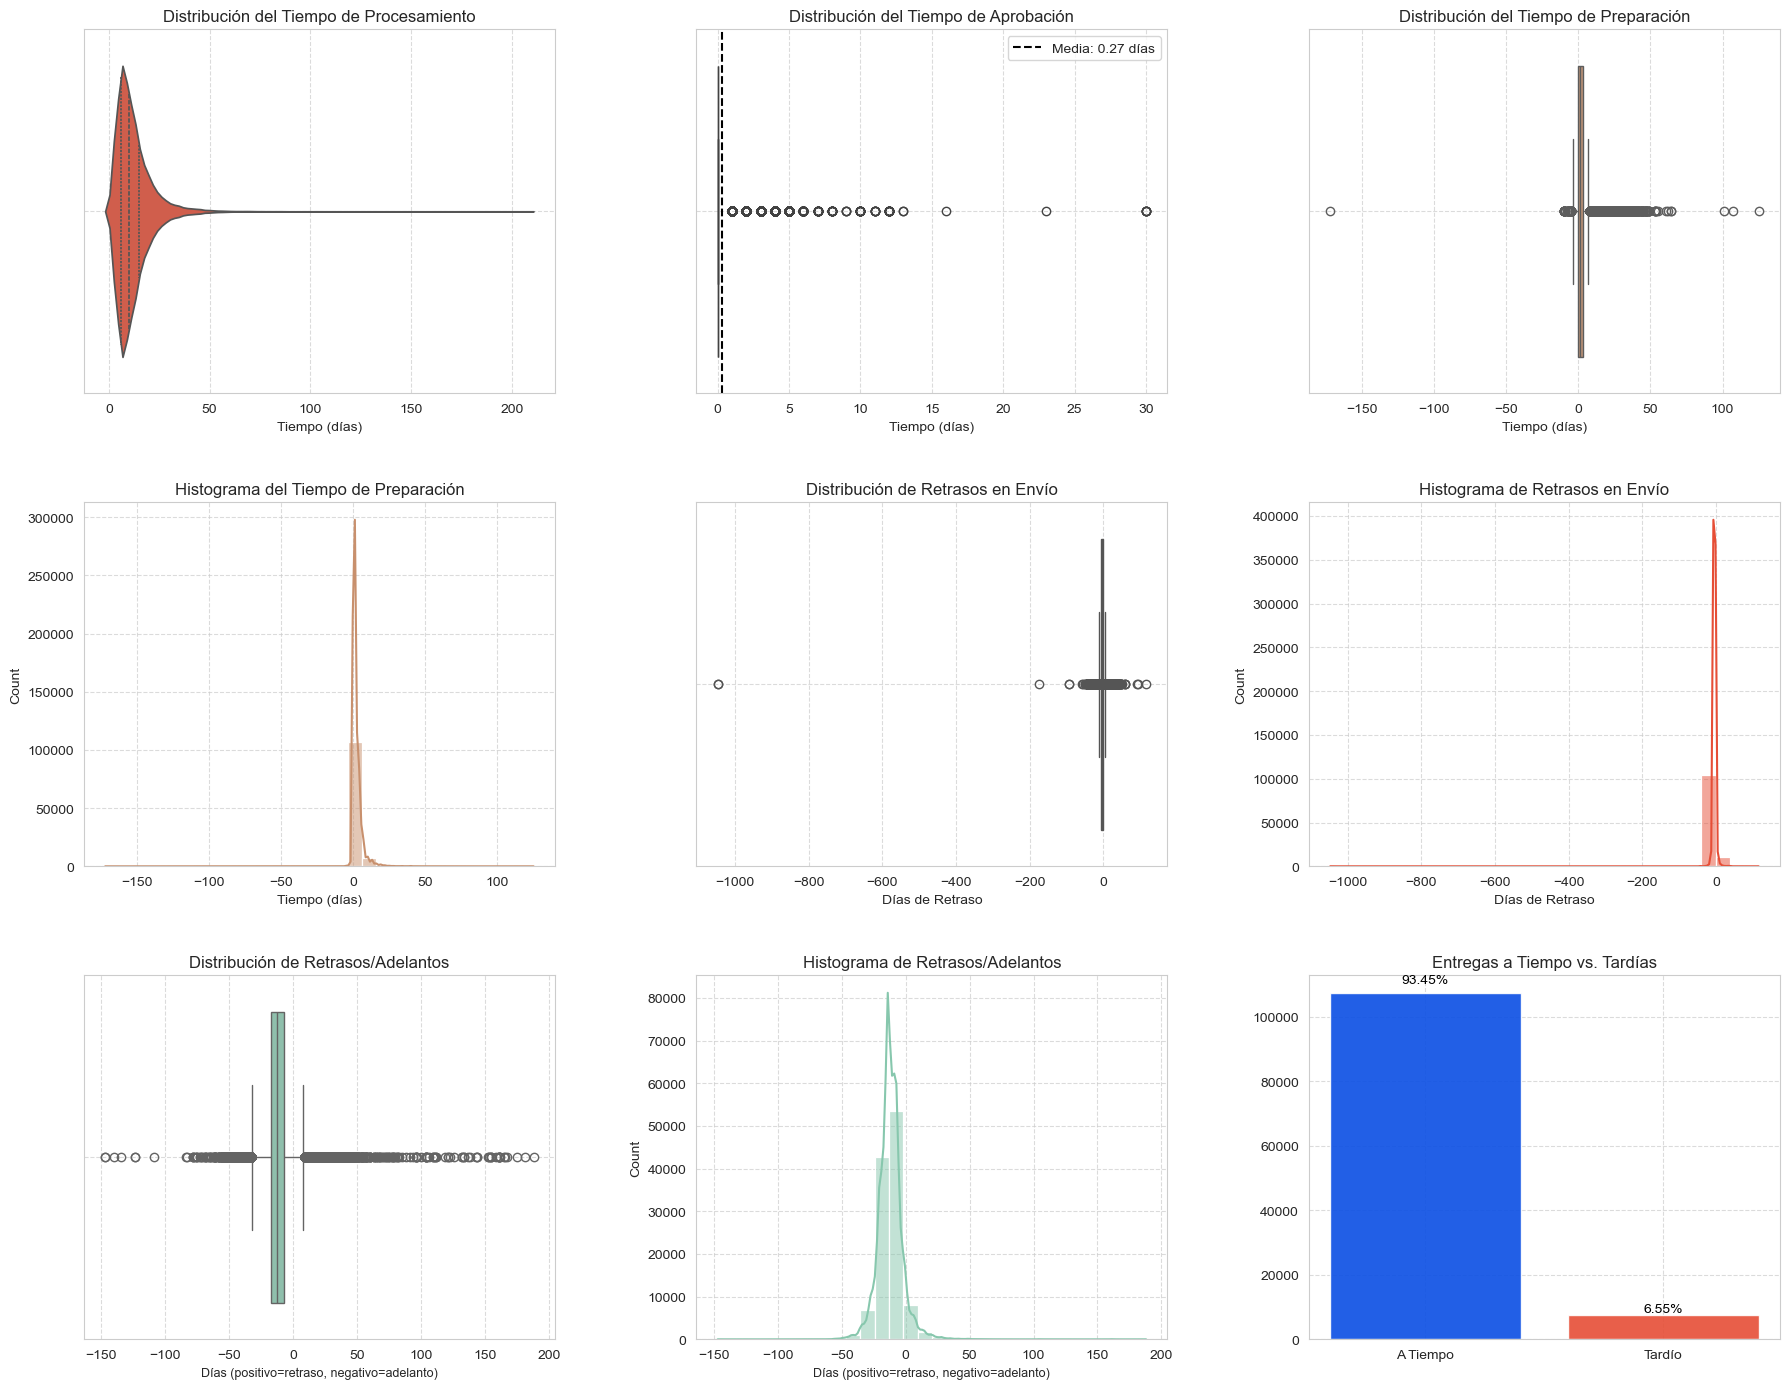

In [146]:
plot_all(df)

# ¿Cuáles son las tendencias de compras a lo largo del año?

In [147]:
pedidos_diarios = df.groupby(df['order_purchase_timestamp'].dt.date).size().reset_index()
pedidos_diarios.columns = ['Fecha', 'Número de pedidos']

fig = px.line(
    pedidos_diarios,
    x='Fecha',
    y='Número de pedidos',
    title="Tendencia diaria de Compras"
)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title="Fecha",
    yaxis_title="Número de Compras",
    template="plotly_white"
)

fig.show()

In [148]:
pedidos_diarios = df.groupby(df['order_purchase_timestamp'].dt.date).size().reset_index()
pedidos_diarios.columns = ['Fecha', 'Número de pedidos']


fig = px.line(
    pedidos_diarios,
    x='Fecha',
    y='Número de pedidos',
    title="Tendencia diaria de pedidos",
    markers=True,
    template='plotly_white'
)

# Suavizar la línea (opcional)
fig.update_traces(line_shape='spline')

# Ajustar ejes y diseño
fig.update_layout(
    xaxis=dict(
        title="Fecha",
        tickangle=-45,
        tickformat='%b %d, %Y',
        rangeselector=dict(
            buttons=list([
                dict(count=7, label="Última semana", step="day", stepmode="backward"),
                dict(count=1, label="Último mes", step="month", stepmode="backward"),
                dict(step="all", label="Todo")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    yaxis_title="Número de pedidos",
    hovermode="x unified"
)

fig.show()


In [149]:
pedidos_por_hora = df.groupby('hour').size().reset_index(name='Número de pedidos')

fig = px.line(
    pedidos_por_hora,
    x='hour',
    y='Número de pedidos',
    title="Tendencia de pedidos por hora del día",
    markers=True,
    template="plotly_white"
)

# Suavizar la línea
fig.update_traces(line_shape='spline')

# Configurar ejes y layout
fig.update_layout(
    xaxis=dict(
        title="Hora del día (0-23)",
        dtick=1,              # Forzar ticks cada 1 hora
        tick0=0,
        range=[-0.5, 23.5],   # Mostrar de -0.5 a 23.5 para ver bien el primer y último punto
    ),
    yaxis_title="Número de pedidos",
    showlegend=False,         # Ocultar leyenda (solo hay una serie)
    hovermode="x unified"
)

fig.show()


In [150]:
pedidos_por_dia_semana = df.groupby('day_of_week').size().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index(name='Número de pedidos')

fig = px.line(
    pedidos_por_dia_semana,
    x='day_of_week',
    y='Número de pedidos',
    title="Tendencia de pedidos por día de la semana"
)

fig.update_layout(
    xaxis_title="Día de la semana",
    yaxis_title="Número de pedidos",
    template="plotly_white"
)

fig.show()



In [151]:
pedidos_por_dia = df.groupby('day_of_month').size().reset_index(name='Número de pedidos')
fig = px.line(
    pedidos_por_dia,
    x='day_of_month',
    y='Número de pedidos',
    markers=True,  # Puntos en cada día
    title="Tendencia de pedidos por día del mes",
    template="plotly_white"
)

# Suavizar la línea
fig.update_traces(line_shape='spline')

# Ajustar el eje X
fig.update_layout(
    xaxis=dict(
        title="Día del mes",
        dtick=1,                 # Forzar un tick cada 1 día
        tickmode='linear',
        range=[0.5, 31.5],       # Mostrar ligeramente antes y después de 1..31
    ),
    yaxis_title="Número de pedidos",
    hovermode="x unified"
)

fig.show()

In [152]:
pedidos_por_mes = df.groupby('month').size().reset_index(name='Número de pedidos')

fig = px.line(
    pedidos_por_mes,
    x='month',
    y='Número de pedidos',
    markers=True,  # Mostrar puntos en cada mes
    title="Tendencia de pedidos por mes",
    template="plotly_white"
)

# Suavizar la línea
fig.update_traces(line_shape='spline')

# Configurar ejes
fig.update_layout(
    xaxis=dict(
        title="Mes (1-12)",
        dtick=1,          # Forzar un tick cada 1 mes
        range=[0.5, 12.5] # Mostrar un poco antes y después para no cortar extremos
    ),
    yaxis_title="Número de pedidos",
    hovermode="x unified"
)

fig.show()


In [153]:
pedidos_mensuales = df.groupby("month_year")["order_id"].count()

fig = px.line(
    x=pedidos_mensuales.index.astype(str),
    y=pedidos_mensuales.values,
    labels={'x': 'Fecha', 'y': 'Número de pedidos'},
    title="Tendencia mensual de pedidos",
    markers=True,              # Puntos en cada mes
    template="plotly_white"
)

# Suavizar la línea
fig.update_traces(line_shape='spline')

fig.update_layout(
    xaxis_tickangle=-45,       # Rotar etiquetas del eje X
    xaxis_title="Fecha",
    yaxis_title="Número de pedidos"
)

fig.show()

In [154]:
# Contar pedidos por categoría y mes-año
df_ventas_mensuales = df.groupby(['month_year', 'product_category'])['order_id'].nunique().reset_index(name='Pedidos')

# Obtener las 5 categorías más vendidas en total
top5_categorias = df_ventas_mensuales.groupby('product_category')['Pedidos'].sum().nlargest(5).index

# Filtrar solo las top 5 categorías
df_top5_mensual = df_ventas_mensuales[df_ventas_mensuales['product_category'].isin(top5_categorias)]

# Convertir a string para graficar bien
df_top5_mensual['month_year'] = df_top5_mensual['month_year'].astype(str)

# Crear gráfico de líneas
fig = px.line(
    df_top5_mensual,
    x='month_year',
    y='Pedidos',
    color='product_category',
    title='Evolución de ventas de las 5 categorías más vendidas por mes',
    labels={'month_year': 'Mes', 'Pedidos': 'Número de Pedidos',"product_category":"Categoría de Producto"},
    color_discrete_sequence=['#0a4ee4', '#e64e36', '#c8906d', '#001647', '#779e3d']
)

fig.update_layout(
    xaxis_title="Mes",
    yaxis_title="Número de pedidos",
    xaxis_tickangle=-45,
    template="plotly_white"
)

fig.show()


In [155]:
df_ventas_mensuales = df.groupby(['month_year', 'product_category'])['order_id'].nunique().reset_index(name='Pedidos')
df_ventas_mensuales['month_year'] = df_ventas_mensuales['month_year'].astype(str)

df_top3 = df_ventas_mensuales.groupby('month_year').apply(lambda x: x.nlargest(3, 'Pedidos')).reset_index(drop=True)
df_top3['month_year'] = df_top3['month_year'].astype(str)
categorias = df_top3['product_category'].unique()

colores = ['#0a4ee4', '#e64e36', '#F09F29','#c8906d', '#001647', '#779e3d', '#df9fc7', '#87c7ad']
color_map = {}
for i, cat in enumerate(categorias):
    color_map[cat] = colores[i % len(colores)]

fig = px.bar(
    df_top3,
    x='month_year',
    y='Pedidos',
    color='product_category',
    title='Top 3 categorías más vendidas por mes',
    labels={'month_year': 'Mes', 'Pedidos': 'Número de Pedidos'},
    color_discrete_map=color_map,
)

fig.update_layout(
    xaxis_tickangle=-45,
    barmode='stack',
    legend_title='Categoría de Producto'
)

fig.show()


In [156]:
df_ventas_hora = df.groupby(['hour', 'product_category']).size().reset_index(name='Pedidos')

df_top3_hora = df_ventas_hora.groupby('hour').apply(lambda x: x.nlargest(3, 'Pedidos')).reset_index(drop=True)

fig = px.bar(
    df_top3_hora,
    x='hour',
    y='Pedidos',
    color='product_category',
    title='Top 3 categorías más vendidas por hora del día',
    labels={'hour': 'Hora del día', 'Pedidos': 'Número de Pedidos'},
    color_discrete_sequence=['#0a4ee4', '#e64e36', '#c8906d', '#001647', '#779e3d', '#df9fc7', '#87c7ad']
)

fig.update_layout(
    barmode='stack',
    legend_title='Categoría de Producto'
)

fig.show()


In [157]:
df_ventas_semana = df.groupby(['day_of_week', 'product_category']).size().reset_index(name='Pedidos')

df_top3_semana = df_ventas_semana.groupby('day_of_week').apply(lambda x: x.nlargest(3, 'Pedidos')).reset_index(drop=True)

# Ordenar los días de la semana correctamente
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_top3_semana['day_of_week'] = pd.Categorical(df_top3_semana['day_of_week'], categories=orden_dias, ordered=True)

fig = px.bar(
    df_top3_semana.sort_values('day_of_week'),
    x='day_of_week',
    y='Pedidos',
    color='product_category',
    title='Top 3 categorías más vendidas por día de la semana',
    labels={'day_of_week': 'Día de la semana', 'Pedidos': 'Número de Pedidos'},
    color_discrete_sequence=['#0a4ee4', '#e64e36', '#c8906d', '#001647', '#779e3d', '#df9fc7', '#87c7ad']
)

fig.update_layout(
    barmode='stack',
    legend_title='Categoría de Producto'
)

fig.show()

In [158]:
df_ventas_dia = df.groupby(['day_of_month', 'product_category']).size().reset_index(name='Pedidos')

df_top3_dia = df_ventas_dia.groupby('day_of_month').apply(lambda x: x.nlargest(3, 'Pedidos')).reset_index(drop=True)

fig = px.bar(
    df_top3_dia,
    x='day_of_month',
    y='Pedidos',
    color='product_category',
    title='Top 3 categorías más vendidas por día del mes',
    labels={'day_of_month': 'Día del mes', 'Pedidos': 'Número de Pedidos'},
    color_discrete_sequence=['#0a4ee4', '#e64e36', '#c8906d', '#001647', '#779e3d', '#df9fc7', '#87c7ad']
)

fig.update_layout(
    barmode='stack',
    legend_title='Categoría de Producto'
)

fig.show()


In [159]:
df_ventas_mes = df.groupby(['month', 'product_category']).size().reset_index(name='Pedidos')

df_top3_mes = df_ventas_mes.groupby('month').apply(lambda x: x.nlargest(3, 'Pedidos')).reset_index(drop=True)

df_top3_mes['month'] = pd.Categorical(df_top3_mes['month'],
                                      categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                      ordered=True)

fig = px.bar(
    df_top3_mes,
    x=df_top3_mes['month'],
    y='Pedidos',
    color='product_category',
    title='Top 3 categorías más vendidas por mes',
    labels={'month': 'Mes', 'Pedidos': 'Número de Pedidos'},
    color_discrete_sequence=['#0a4ee4', '#e64e36', '#c8906d', '#001647', '#779e3d', '#df9fc7', '#87c7ad']
)

fig.update_layout(
    xaxis=dict(tickmode="array", tickvals=list(range(1, 13)), ticktext=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']),
    barmode='stack',
    legend_title='Categoría de Producto'
)

fig.show()


In [160]:
clientes_por_mes = df.groupby('month_year')['customer_unique_id'].nunique().reset_index(name='clientes_unicos')
clientes_por_mes = clientes_por_mes.sort_values('month_year')

fig = px.bar(
    clientes_por_mes,
    x=clientes_por_mes['month_year'].astype(str),
    y='clientes_unicos',
    color_discrete_sequence=['#001647']
)

fig.update_traces(textposition='outside')

fig.update_layout(
    title="Clientes Únicos por Mes",
    xaxis_title="Mes y Año",
    yaxis_title="Clientes Únicos",
    xaxis=dict(
        categoryorder='array',
        categoryarray=clientes_por_mes['month_year'].astype(str),
        tickmode='array',
        tickvals=clientes_por_mes['month_year'].astype(str),
        ticktext=clientes_por_mes['month_year'].astype(str)
    ),
    xaxis_tickangle=-45,
    showlegend=False
)

fig.show()


In [161]:
clientes_nuevos_por_mes = []
meses_ordenados = sorted(df['month_year'].unique())

for mes_actual in meses_ordenados:
    clientes_mes = df[df['month_year'] == mes_actual]['customer_unique_id'].unique()
    clientes_anteriores = df[df['month_year'] < mes_actual]['customer_unique_id'].unique()

    nuevos = set(clientes_mes) - set(clientes_anteriores)
    clientes_nuevos_por_mes.append({'month_year': mes_actual, 'clientes_nuevos': len(nuevos)})

df_clientes_nuevos = pd.DataFrame(clientes_nuevos_por_mes)
df_clientes_nuevos = df_clientes_nuevos.sort_values('month_year')

fig = px.bar(
    df_clientes_nuevos,
    x=df_clientes_nuevos['month_year'].astype(str),
    y='clientes_nuevos',
    color_discrete_sequence=['#001647']
)

fig.update_traces(textposition='outside')

fig.update_layout(
    title="Incremento de Clientes Nuevos por Mes",
    xaxis_title="Mes y Año",
    yaxis_title="Número de Clientes Nuevos",
    xaxis=dict(
        categoryorder='array',
        categoryarray=df_clientes_nuevos['month_year'].astype(str),
        tickmode='array',
        tickvals=df_clientes_nuevos['month_year'].astype(str),
        ticktext=df_clientes_nuevos['month_year'].astype(str)
    ),
    xaxis_tickangle=-45,
    showlegend=False
)

fig.show()


In [162]:
ventas_diarias = df.groupby(df['order_purchase_timestamp'].dt.date).agg(
    total_pedidos = ('order_id', 'nunique'),
    total_ventas=('price', 'sum'),
    total_beneficio=('beneficio_ticket', 'sum')
).reset_index()

top_10_dias = ventas_diarias.sort_values(by='total_ventas', ascending=False).head(10)
top_10_dias['categoria_mas_vendida'] = top_10_dias['order_purchase_timestamp'].apply(
    lambda x: df[df['order_purchase_timestamp'].dt.date == x]['product_category'].mode()[0]
)

top_10_dias[['order_purchase_timestamp', 'total_ventas', 'total_beneficio','total_pedidos', 'categoria_mas_vendida']]


order_purchase_timestamp  total_ventas  total_beneficio  total_pedidos  \
333               2017-11-24     152751.87            72.56           1147   
334               2017-11-25      62930.05             1.22            487   
500               2018-05-10      58206.87            -0.10            273   
506               2018-05-16      57016.11             5.94            351   
588               2018-08-06      55351.10             0.03            363   
504               2018-05-14      54159.68             0.04            355   
497               2018-05-07      53553.53            -0.13            363   
532               2018-06-11      50947.40            32.28            294   
469               2018-04-09      49382.84             0.00            250   
337               2017-11-28      49244.50             0.02            371   

    categoria_mas_vendida  
333        bed_bath_table  
334        bed_bath_table  
500         health_beauty  
506        bed_bath_table  
588         health_beauty  
504        bed_bath_table  
497         health_beauty  
532        bed_bath_table  
469        sports_leisure  
337        sports_leisure

## Análisis de Ventas en Black Friday (24 de Noviembre de 2017)

In [163]:
df_black_friday = df[(df['order_purchase_timestamp'] >= pd.to_datetime('2017-11-24 00:00:00')) & (df['order_purchase_timestamp'] <= pd.to_datetime('2017-11-24 23:59:59'))]
df_black_friday.head()

order_id                       customer_id  \
746  b7b11f6c6708310dfe528e5b729399a5  0d92a8c5b4ea740017de97793b717392   
747  b7b11f6c6708310dfe528e5b729399a5  0d92a8c5b4ea740017de97793b717392   
748  128c967306503570d40def0212a27fb2  495440fd2023c2b6415452a9463c6b4b   
749  564db6e83379512127bc60da803b4a36  8134db246a16a831c897deedc0f6e3eb   
750  722e7452a1ac677a58f6ad6ed2a94420  e6562b43e71911e95374c2eea157c11e   

    order_status order_purchase_timestamp   order_approved_at  \
746    delivered      2017-11-24 00:35:59 2017-11-25 06:16:40   
747    delivered      2017-11-24 00:35:59 2017-11-25 06:16:40   
748    delivered      2017-11-24 11:18:45 2017-11-24 13:18:33   
749    delivered      2017-11-24 12:35:20 2017-11-24 14:52:36   
750    delivered      2017-11-24 14:46:52 2017-11-26 15:54:37   

    order_delivered_carrier_date order_delivered_customer_date  \
746          2017-11-27 21:08:08           2017-11-28 17:23:08   
747          2017-11-27 21:08:08           2017-11-28 17:23:08   
748          2017-11-27 16:09:29           2017-12-18 16:12:32   
749          2017-11-28 20:27:41           2018-01-11 15:08:16   
750          2017-12-05 02:53:20           2017-12-14 00:57:41   

    order_estimated_delivery_date                customer_unique_id  \
746                    2017-12-08  547ef152d14479db29e8961775147a7d   
747                    2017-12-08  547ef152d14479db29e8961775147a7d   
748                    2017-12-15  d5ae3fe5bdac30fd7b915d1c69aed36a   
749                    2017-12-14  66eaa2ba32cb330d28add7d852e265e6   
750                    2017-12-15  4274b716c07a8621a48c2ba4b01c5df9   

     customer_zip_code_prefix    customer_city customer_state  order_item_id  \
746                      4037        sao paulo             SP              1   
747                      4037        sao paulo             SP              2   
748                     13211          jundiai             SP              1   
749                     13220  varzea paulista             SP              1   
750                     29149        cariacica             ES              1   

                           product_id                         seller_id  \
746  4914f8796af2ecd359fd8f44b9b92339  c826c40d7b19f62a09e2d7c5e7295ee2   
747  4914f8796af2ecd359fd8f44b9b92339  c826c40d7b19f62a09e2d7c5e7295ee2   
748  8d3367004d60f40855db4a5bbbabfdb6  15aac934c58d886785ac1b17953ea898   
749  baded889837476e342ac1e93c87ce383  e5a3438891c0bfdb9394643f95273d8e   
750  7775d718fa8dfebe8015e6e5ee3dc5be  c24173065483e421f9e5e7f599de101d   

    shipping_limit_date  price  freight_value  payment_sequential  \
746 2017-11-30 06:16:40  49.77           7.78                 1.0   
747 2017-11-30 06:16:40  49.77           7.78                 1.0   
748 2017-11-30 13:18:33  25.00          14.10                 1.0   
749 2017-11-30 14:52:36  20.30          11.85                 1.0   
750 2017-11-30 15:54:37  45.99          15.11                 1.0   

    payment_type  payment_installments  payment_value  \
746       boleto                   1.0         115.10   
747       boleto                   1.0         115.10   
748  credit_card                   1.0          39.10   
749  credit_card                   1.0          32.15   
750  credit_card                   1.0          61.10   

                            review_id  review_score review_comment_title  \
746  1f64cade5733c6128e9eea645996ccf0           4.0                  NaN   
747  1f64cade5733c6128e9eea645996ccf0           4.0                  NaN   
748  73d93e70dc5febd3de3bfd8c65e7cecd           1.0                  NaN   
749  c4af2d1aa1215b0e04ae27b4130d8b00           3.0                  NaN   
750  d733618a1d2e550024ca416c715dbf9c           1.0                  NaN   

                                review_comment_message review_creation_date  \
746                                                NaN  2017-11-29 00:00:00   
747                                                NaN  20

In [164]:
clientes_black_friday = df_black_friday['customer_unique_id'].unique()

compras_clientes_bf = df[df['customer_unique_id'].isin(clientes_black_friday)].copy()

primeras_compras = compras_clientes_bf.groupby('customer_unique_id')['order_purchase_timestamp'].min()

compras_clientes_bf['compra_antes'] = compras_clientes_bf['order_purchase_timestamp'] < '2017-11-24'
compras_clientes_bf['compra_despues'] = compras_clientes_bf['order_purchase_timestamp'] >= '2017-11-25'

clientes_nuevos_bf = ((primeras_compras >= '2017-11-24 00:00:00') &
                       (primeras_compras <= '2017-11-24 23:59:59')).sum()
clientes_antes_bf = compras_clientes_bf.groupby('customer_unique_id')['compra_antes'].any().sum()
clientes_despues_bf = compras_clientes_bf.groupby('customer_unique_id')['compra_despues'].any().sum()

compras_despues = df[df['order_purchase_timestamp'] > '2017-11-24'][['customer_unique_id', 'order_purchase_timestamp']]

tiempo_recompra = df_black_friday.merge(compras_despues, on='customer_unique_id', suffixes=('_blackfriday', '_despues'))
tiempo_recompra['dias_para_recompra'] = (tiempo_recompra['order_purchase_timestamp_despues'] -
                                         tiempo_recompra['order_purchase_timestamp_blackfriday']).dt.days
dias_promedio_recompra = tiempo_recompra['dias_para_recompra'].mean()

clientes_antes_y_despues_bf = set(compras_clientes_bf[compras_clientes_bf['compra_antes']]['customer_unique_id']) & \
                              set(compras_clientes_bf[compras_clientes_bf['compra_despues']]['customer_unique_id'])

print(f"Clientes cuya primera compra fue en Black Friday: {clientes_nuevos_bf}")
print(f"Compradores en Black Friday que habían comprado antes: {clientes_antes_bf}")
print(f"Compradores en Black Friday que compraron después: {clientes_despues_bf}")
print(f"Clientes que ya habían comprado, compraron en  Black Friday y volvieron a comprar después: {len(clientes_antes_y_despues_bf)}")
print(f"Tiempo promedio para la recompra después de Black Friday: {dias_promedio_recompra:.2f} días")
print(f"Porcentaje de compradores en Black Friday que compraron antes y después: {len(clientes_antes_y_despues_bf) / clientes_despues_bf * 100:.2f}%")


Clientes cuya primera compra fue en Black Friday: 1114
Compradores en Black Friday que habían comprado antes: 18
Compradores en Black Friday que compraron después: 18
Clientes que ya habían comprado, compraron en  Black Friday y volvieron a comprar después: 2
Tiempo promedio para la recompra después de Black Friday: 1.43 días
Porcentaje de compradores en Black Friday que compraron antes y después: 11.11%


In [165]:
productos_black_friday = df_black_friday['product_id'].unique()

ventas_dias_antes_bf = df[(df['product_id'].isin(productos_black_friday)) & (df['order_purchase_timestamp'] < '2017-11-24')]
ventas_dias_despues_bf = df[(df['product_id'].isin(productos_black_friday)) & (df['order_purchase_timestamp'] >= '2017-11-25')]
ventas_otros_dias_bf = df[(df['product_id'].isin(productos_black_friday)) & (df['order_purchase_timestamp'] != '2017-11-24')]

precio_medio_black_friday = df_black_friday['price'].mean()
precio_medio_dias_antes = ventas_dias_antes_bf['price'].mean()
precio_medio_dias_despues = ventas_dias_despues_bf['price'].mean()
precio_medio_otros_dias = ventas_otros_dias_bf['price'].mean()

print(f"Precio medio de estos productos en Black Friday: {precio_medio_black_friday:.2f}")
print(f"Precio medio de estos productos en días anteriores: {precio_medio_dias_antes:.2f}")
print(f"Precio medio de estos productos en días posteriores: {precio_medio_dias_despues:.2f}")

if precio_medio_black_friday < precio_medio_otros_dias:
    print("\nEstos productos se costaron más baratos en Black Friday.")
else:
    print("\nEstos productos NO costaron más baratos en Black Friday.")

print('-'*50)

pago_medio_black_friday = df_black_friday['payment_value'].mean()
pago_medio_dias_antes = ventas_dias_antes_bf['payment_value'].mean()
pago_medio_dias_despues = ventas_dias_despues_bf['payment_value'].mean()
pago_medio_otros_dias = ventas_otros_dias_bf['payment_value'].mean()

print(f"Los clientes pagaron de media por estos productos en Black Friday: {pago_medio_black_friday:.2f}")
print(f"Los clientes pagaron de media por estos productos en días anteriores: {pago_medio_dias_antes:.2f}")
print(f"Los clientes pagaron de media por estos productos en días posteriores: {pago_medio_dias_despues:.2f}")

if pago_medio_black_friday < pago_medio_otros_dias:
    print("\nEstos productos se vendieron más baratos en Black Friday.")
else:
    print("\nEstos productos NO se vendieron más baratos en Black Friday.")

print('-'*50)

coste_entrega_medio_black_friday = df_black_friday['freight_value'].mean()
coste_entrega_medio_dias_antes = ventas_dias_antes_bf['freight_value'].mean()
coste_entrega_medio_dias_despues = ventas_dias_despues_bf['freight_value'].mean()
coste_entrega_medio_otros_dias = ventas_otros_dias_bf['freight_value'].mean()

print(f"El coste de entrega medio de estos productos en Black Friday: {coste_entrega_medio_black_friday:.2f}")
print(f"El coste de entrega medio de estos productos en días anteriores: {coste_entrega_medio_dias_antes:.2f}")
print(f"El coste de entrega medio de estos productos en días posteriores: {coste_entrega_medio_dias_despues:.2f}")

if coste_entrega_medio_black_friday < coste_entrega_medio_otros_dias:
    print("\nEl coste de entrega en Black Friday fue más barato.")
else:
    print("\nEl coste de entrega en Black Friday  NO fue más barato.")


Precio medio de estos productos en Black Friday: 110.21
Precio medio de estos productos en días anteriores: 97.54
Precio medio de estos productos en días posteriores: 98.91

Estos productos NO costaron más baratos en Black Friday.
--------------------------------------------------
Los clientes pagaron de media por estos productos en Black Friday: 182.28
Los clientes pagaron de media por estos productos en días anteriores: 145.33
Los clientes pagaron de media por estos productos en días posteriores: 149.81

Estos productos NO se vendieron más baratos en Black Friday.
--------------------------------------------------
El coste de entrega medio de estos productos en Black Friday: 18.68
El coste de entrega medio de estos productos en días anteriores: 19.32
El coste de entrega medio de estos productos en días posteriores: 19.79

El coste de entrega en Black Friday fue más barato.


In [166]:
categorias_mas_vendidas_bf = df_black_friday['product_category'].value_counts()
print(categorias_mas_vendidas_bf.head(10))

product_category
bed_bath_table           199
furniture_decor          135
garden_tools             108
sports_leisure            91
health_beauty             89
telephony                 81
watches_gifts             75
toys                      73
computers_accessories     73
perfumery                 64
Name: count, dtype: int64


In [167]:
clientes_antes_bf_lista = compras_clientes_bf.loc[
    compras_clientes_bf['compra_antes'], 'customer_unique_id'
].unique().tolist()
df[df['customer_unique_id'].isin(clientes_antes_bf_lista)].groupby(['customer_unique_id', 'order_purchase_timestamp']).size()

customer_unique_id                order_purchase_timestamp
0dd933d1e0253343083013791bf5d5e9  2017-06-13 11:11:47         3
                                  2017-11-24 12:08:59         1
1b5720c7b0ee7183c2eafe3dba65111b  2017-10-22 01:54:10         1
                                  2017-11-24 20:36:18         1
1b6c7548a2a1f9037c1fd3ddfed95f33  2017-11-13 16:44:41         1
                                  2017-11-24 13:01:09         2
                                  2017-12-04 21:11:15         2
                                  2017-12-05 09:13:27         1
                                  2017-12-20 09:56:35         2
                                  2018-01-25 12:47:39         1
                                  2018-02-14 13:22:12         1
27259fad9054fce994a70f1d117bc402  2017-03-28 19:34:19         1
                                  2017-11-24 23:36:43         1
3db6e5afa8e8178a29afc729855315e2  2017-06-08 14:12:02         1
                                  2017-09-30 

In [168]:
clientes_despues_bf_lista = compras_clientes_bf.loc[compras_clientes_bf['compra_despues'], 'customer_unique_id'].unique().tolist()
df[df['customer_unique_id'].isin(clientes_despues_bf_lista)].groupby(['customer_unique_id', 'order_purchase_timestamp']).size().head(20)

customer_unique_id                order_purchase_timestamp
013f4353d26bb05dc6652f1269458d8d  2017-11-24 13:33:20         1
                                  2017-11-28 13:30:58         2
13473af264dea0facd893d6516900b22  2017-11-24 09:09:48         1
                                  2018-05-11 14:34:01         1
1b6c7548a2a1f9037c1fd3ddfed95f33  2017-11-13 16:44:41         1
                                  2017-11-24 13:01:09         2
                                  2017-12-04 21:11:15         2
                                  2017-12-05 09:13:27         1
                                  2017-12-20 09:56:35         2
                                  2018-01-25 12:47:39         1
                                  2018-02-14 13:22:12         1
2e9399fc2fe209771a6f719e14bdb6fe  2017-11-24 17:38:56         2
                                  2017-11-25 00:16:56         2
379a5698aeca26ff55abca9bc7fcaa4f  2017-11-24 22:10:32         1
                                  2018-02-28 

## Fin de semana de Black Friday hasta Cyber Monday

In [169]:
df_bf_weekend = df[(df['order_purchase_timestamp'] >= pd.to_datetime('2017-11-24 00:00:00')) & (df['order_purchase_timestamp'] <= pd.to_datetime('2017-11-27 23:59:59'))]
df_bf_weekend.head()

order_id                       customer_id  \
746  b7b11f6c6708310dfe528e5b729399a5  0d92a8c5b4ea740017de97793b717392   
747  b7b11f6c6708310dfe528e5b729399a5  0d92a8c5b4ea740017de97793b717392   
748  128c967306503570d40def0212a27fb2  495440fd2023c2b6415452a9463c6b4b   
749  564db6e83379512127bc60da803b4a36  8134db246a16a831c897deedc0f6e3eb   
750  722e7452a1ac677a58f6ad6ed2a94420  e6562b43e71911e95374c2eea157c11e   

    order_status order_purchase_timestamp   order_approved_at  \
746    delivered      2017-11-24 00:35:59 2017-11-25 06:16:40   
747    delivered      2017-11-24 00:35:59 2017-11-25 06:16:40   
748    delivered      2017-11-24 11:18:45 2017-11-24 13:18:33   
749    delivered      2017-11-24 12:35:20 2017-11-24 14:52:36   
750    delivered      2017-11-24 14:46:52 2017-11-26 15:54:37   

    order_delivered_carrier_date order_delivered_customer_date  \
746          2017-11-27 21:08:08           2017-11-28 17:23:08   
747          2017-11-27 21:08:08           2017-11-28 17:23:08   
748          2017-11-27 16:09:29           2017-12-18 16:12:32   
749          2017-11-28 20:27:41           2018-01-11 15:08:16   
750          2017-12-05 02:53:20           2017-12-14 00:57:41   

    order_estimated_delivery_date                customer_unique_id  \
746                    2017-12-08  547ef152d14479db29e8961775147a7d   
747                    2017-12-08  547ef152d14479db29e8961775147a7d   
748                    2017-12-15  d5ae3fe5bdac30fd7b915d1c69aed36a   
749                    2017-12-14  66eaa2ba32cb330d28add7d852e265e6   
750                    2017-12-15  4274b716c07a8621a48c2ba4b01c5df9   

     customer_zip_code_prefix    customer_city customer_state  order_item_id  \
746                      4037        sao paulo             SP              1   
747                      4037        sao paulo             SP              2   
748                     13211          jundiai             SP              1   
749                     13220  varzea paulista             SP              1   
750                     29149        cariacica             ES              1   

                           product_id                         seller_id  \
746  4914f8796af2ecd359fd8f44b9b92339  c826c40d7b19f62a09e2d7c5e7295ee2   
747  4914f8796af2ecd359fd8f44b9b92339  c826c40d7b19f62a09e2d7c5e7295ee2   
748  8d3367004d60f40855db4a5bbbabfdb6  15aac934c58d886785ac1b17953ea898   
749  baded889837476e342ac1e93c87ce383  e5a3438891c0bfdb9394643f95273d8e   
750  7775d718fa8dfebe8015e6e5ee3dc5be  c24173065483e421f9e5e7f599de101d   

    shipping_limit_date  price  freight_value  payment_sequential  \
746 2017-11-30 06:16:40  49.77           7.78                 1.0   
747 2017-11-30 06:16:40  49.77           7.78                 1.0   
748 2017-11-30 13:18:33  25.00          14.10                 1.0   
749 2017-11-30 14:52:36  20.30          11.85                 1.0   
750 2017-11-30 15:54:37  45.99          15.11                 1.0   

    payment_type  payment_installments  payment_value  \
746       boleto                   1.0         115.10   
747       boleto                   1.0         115.10   
748  credit_card                   1.0          39.10   
749  credit_card                   1.0          32.15   
750  credit_card                   1.0          61.10   

                            review_id  review_score review_comment_title  \
746  1f64cade5733c6128e9eea645996ccf0           4.0                  NaN   
747  1f64cade5733c6128e9eea645996ccf0           4.0                  NaN   
748  73d93e70dc5febd3de3bfd8c65e7cecd           1.0                  NaN   
749  c4af2d1aa1215b0e04ae27b4130d8b00           3.0                  NaN   
750  d733618a1d2e550024ca416c715dbf9c           1.0                  NaN   

                                review_comment_message review_creation_date  \
746                                                NaN  2017-11-29 00:00:00   
747                                                NaN  20

In [170]:
df_bf_weekend['fecha_hora'] = df_bf_weekend['order_purchase_timestamp'].dt.strftime('%Y-%m-%d %H:00:00')

ventas_por_hora = df_bf_weekend.groupby('fecha_hora').agg(
    total_pedidos=('order_id', 'nunique'),
    total_ventas=('price', 'sum')
).reset_index()

ventas_por_hora['fecha_hora'] = pd.to_datetime(ventas_por_hora['fecha_hora'])

fig_pedidos = px.line(
    ventas_por_hora,
    x='fecha_hora',
    y='total_pedidos',
    markers=True,
    title="Evolución de pedidos por hora (Black Friday Weekend)",
    labels={'fecha_hora': 'Fecha y Hora', 'total_pedidos': 'Total de pedidos'},
    color_discrete_sequence=['#001647']
)
fig_pedidos.update_layout(xaxis=dict(tickformat="%d-%m %Hh", tickangle=45), yaxis_showgrid=True)
fig_pedidos.show()

fig_ventas = px.line(
    ventas_por_hora,
    x='fecha_hora',
    y='total_ventas',
    markers=True,
    title="Evolución del valor de ventas por hora (Black Friday Weekend)",
    labels={'fecha_hora': 'Fecha y Hora', 'total_ventas': 'Total de ventas (R$)'},
    color_discrete_sequence=['#E64E36']
)
fig_ventas.update_layout(xaxis=dict(tickformat="%d-%m %Hh", tickangle=45), yaxis_showgrid=True)
fig_ventas.show()


In [171]:
clientes_bf_weekend = df_bf_weekend['customer_unique_id'].unique()

compras_clientes_bf_weekend = df[df['customer_unique_id'].isin(clientes_bf_weekend)].copy()
primeras_compras_bf_weekend = compras_clientes_bf_weekend.groupby('customer_unique_id')['order_purchase_timestamp'].min()

compras_clientes_bf_weekend['compra_antes_bf_weekend'] = compras_clientes_bf_weekend['order_purchase_timestamp'] < '2017-11-24'
compras_clientes_bf_weekend['compra_despues_bf_weekend'] = compras_clientes_bf_weekend['order_purchase_timestamp'] >= '2017-11-28'

clientes_antes_bf_weekend = compras_clientes_bf_weekend.groupby('customer_unique_id')['compra_antes_bf_weekend'].any().sum()
clientes_despues_bf_weekend = compras_clientes_bf_weekend.groupby('customer_unique_id')['compra_despues_bf_weekend'].any().sum()
clientes_nuevos_bf_weekend = ((primeras_compras_bf_weekend >= '2017-11-24 00:00:00') &
                    (primeras_compras_bf_weekend <= '2017-11-27 23:59:59')).sum()

compras_despues_bf_weekend = df[(df['customer_unique_id'].isin(clientes_bf_weekend)) &
                      (df['order_purchase_timestamp'] >= '2017-11-28')][['customer_unique_id', 'order_purchase_timestamp']]

tiempo_recompra_bf_weekend = df_bf_weekend.merge(compras_despues_bf_weekend, on='customer_unique_id', suffixes=('_bf_weekend', '_despues'))
tiempo_recompra_bf_weekend['dias_para_recompra_bf_weekend'] = (tiempo_recompra_bf_weekend['order_purchase_timestamp_despues'] -
                                         tiempo_recompra_bf_weekend['order_purchase_timestamp_bf_weekend']).dt.days

dias_promedio_recompra_bf_weekend = tiempo_recompra_bf_weekend['dias_para_recompra_bf_weekend'].mean()

total_clientes_despues_bf_weekend = compras_despues_bf_weekend['customer_unique_id'].nunique()
clientes_antes_y_despues_bf_weekend = len(set(compras_despues_bf_weekend['customer_unique_id']) & set(compras_clientes_bf_weekend[compras_clientes_bf_weekend['compra_antes_bf_weekend']]['customer_unique_id']))

print(f"Clientes cuya primera compra fue entre Black Friday y Cyber Monday: {clientes_nuevos_bf_weekend}")
print(f"Compradores durante el fin de semana del Black Friday que habían comprado antes: {clientes_antes_bf_weekend}")
print(f"Compradores durante el fin de semana del Black Friday que compraron después: {clientes_despues_bf_weekend}")
print(f"Clientes que ya habían comprado, compraron durante el fin de semana del Black Friday y volvieron a comprar después: {clientes_antes_y_despues_bf_weekend}")
print(f"Tiempo promedio para la recompra después del fin de semana del Black Friday: {dias_promedio_recompra_bf_weekend:.2f} días")
print(f"Porcentaje de compradores durante el fin de semana del Black Friday que compraron antes y después: {clientes_antes_y_despues_bf_weekend / total_clientes_despues_bf_weekend * 100:.2f}%")


Clientes cuya primera compra fue entre Black Friday y Cyber Monday: 2339
Compradores durante el fin de semana del Black Friday que habían comprado antes: 40
Compradores durante el fin de semana del Black Friday que compraron después: 41
Clientes que ya habían comprado, compraron durante el fin de semana del Black Friday y volvieron a comprar después: 5
Tiempo promedio para la recompra después del fin de semana del Black Friday: 70.20 días
Porcentaje de compradores durante el fin de semana del Black Friday que compraron antes y después: 12.20%


In [172]:
productos_black_friday_w = df_bf_weekend['product_id'].unique()

ventas_dias_anteriores = df[(df['product_id'].isin(productos_black_friday_w)) & (df['order_purchase_timestamp'] < '2017-11-24')]
ventas_dias_posteriores = df[(df['product_id'].isin(productos_black_friday_w)) & (df['order_purchase_timestamp'] >= '2017-11-28')]
ventas_dias_no_bf = df[(df['product_id'].isin(productos_black_friday)) &
                        ((df['order_purchase_timestamp'] < '2017-11-24') | (df['order_purchase_timestamp'] >= '2017-11-28'))]

precio_medio_black_friday = df_bf_weekend['price'].mean()
precio_medio_dias_antes = ventas_dias_anteriores['price'].mean()
precio_medio_dias_despues = ventas_dias_posteriores['price'].mean()
precio_medio_otros_dias = ventas_dias_no_bf['price'].mean()

print(f"Precio medio de estos productos el fin de semana del Black Friday: {precio_medio_black_friday:.2f}")
print(f"Precio medio de estos productos en días anteriores: {precio_medio_dias_antes:.2f}")
print(f"Precio medio de estos productos en días posteriores: {precio_medio_dias_despues:.2f}")

if precio_medio_black_friday < precio_medio_otros_dias:
    print("\nEstos productos costaron más baratos el fin de semana del Black Friday.")
else:
    print("\nEstos productos NO costaron más baratos el fin de semana del Black Friday.")

print('-'*50)

pago_medio_black_friday = df_bf_weekend['payment_value'].mean()
pago_medio_dias_antes = ventas_dias_anteriores['payment_value'].mean()
pago_medio_dias_despues = ventas_dias_posteriores['payment_value'].mean()
pago_medio_otros_dias = ventas_dias_no_bf['payment_value'].mean()

print(f"Los clientes pagaron de media por estos productos el fin de semana del Black Friday: {pago_medio_black_friday:.2f}")
print(f"Los clientes pagaron de media por productos en días anteriores: {pago_medio_dias_antes:.2f}")
print(f"Los clientes pagaron de media por productos en días posteriores: {pago_medio_dias_despues:.2f}")

if pago_medio_black_friday < pago_medio_otros_dias:
    print("\nLos clientes pagaron estos productos más baratos el fin de semana del Black Friday.")
else:
    print("\nLos clientes NO pagaron estos productosn más baratos el fin de semana del Black Friday.")

print('-'*50)

coste_entrega_medio_black_friday = df_bf_weekend['freight_value'].mean()
coste_entrega_medio_dias_antes = ventas_dias_anteriores['freight_value'].mean()
coste_entrega_medio_dias_despues = ventas_dias_posteriores['freight_value'].mean()
coste_entrega_medio_otros_dias = ventas_dias_no_bf['freight_value'].mean()

print(f"El coste de entrega medio de estos productos en Black Friday: {coste_entrega_medio_black_friday:.2f}")
print(f"El coste de entrega medio de estos productos en días anteriores: {coste_entrega_medio_dias_antes:.2f}")
print(f"El coste de entrega medio de estos productos en días posteriores: {coste_entrega_medio_dias_despues:.2f}")

if coste_entrega_medio_black_friday < coste_entrega_medio_otros_dias:
    print("\nEl coste de entrega el fin de semana del Black Friday fue más barato.")
else:
    print("\nEl coste de entrega el fin de semana del Black Friday NO fue más barato.")

Precio medio de estos productos el fin de semana del Black Friday: 105.14
Precio medio de estos productos en días anteriores: 94.32
Precio medio de estos productos en días posteriores: 94.94

Estos productos NO costaron más baratos el fin de semana del Black Friday.
--------------------------------------------------
Los clientes pagaron de media por estos productos el fin de semana del Black Friday: 166.38
Los clientes pagaron de media por productos en días anteriores: 138.56
Los clientes pagaron de media por productos en días posteriores: 141.57

Los clientes NO pagaron estos productosn más baratos el fin de semana del Black Friday.
--------------------------------------------------
El coste de entrega medio de estos productos en Black Friday: 18.56
El coste de entrega medio de estos productos en días anteriores: 19.16
El coste de entrega medio de estos productos en días posteriores: 19.36

El coste de entrega el fin de semana del Black Friday fue más barato.


In [173]:
categorias_mas_vendidas_bf = df_bf_weekend['product_category'].value_counts()
print(categorias_mas_vendidas_bf.head(10))

product_category
bed_bath_table           400
furniture_decor          309
garden_tools             250
health_beauty            199
toys                     183
sports_leisure           180
computers_accessories    172
telephony                149
housewares               134
perfumery                128
Name: count, dtype: int64


# Sellers y Logistica


In [174]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category', 'day_of_month', 'hour', 'month', 'month_year',
       'day_of_week

In [175]:
seller_counts = df['seller_id'].value_counts()
print(f"Nombre de Sellers únicos: {len(seller_counts)}")
print("\nTop 10 vendedores con más ventas:")
print(seller_counts.head(10))


Nombre de Sellers únicos: 2970

Top 10 vendedores con más ventas:
seller_id
4a3ca9315b744ce9f8e9374361493884    2094
6560211a19b47992c3666cc44a7e94c0    2085
1f50f920176fa81dab994f9023523100    2002
cc419e0650a3c5ba77189a1882b7556a    1790
da8622b14eb17ae2831f4ac5b9dab84a    1633
955fee9216a65b617aa5c0531780ce60    1501
1025f0e2d44d7041d6cf58b6550e0bfa    1454
7c67e1448b00f6e969d365cea6b010ab    1443
ea8482cd71df3c1969d7b9473ff13abc    1224
7a67c85e85bb2ce8582c35f2203ad736    1221
Name: count, dtype: int64


In [176]:
# Agrupar por 'seller_id' y sumar el precio de los productos vendidos
top_seller_revenue = df.groupby("seller_id")["price"].sum().reset_index()

# Ordenar de mayor a menor
top_seller_revenue = top_seller_revenue.sort_values(by="price", ascending=False)

# Mostrar el vendedor con más ingresos
print(top_seller_revenue.head(10))


                             seller_id      price
982   53243585a1d6dc2643021fd1853d8905  239791.94
834   4869f7a5dfa277a7dca6462dcf3b52b2  235382.53
858   4a3ca9315b744ce9f8e9374361493884  209618.87
2903  fa1c13f2614d7b5c4749cbc52fecda94  200859.33
1480  7c67e1448b00f6e969d365cea6b010ab  196840.49
1504  7e93a43ef30c4f03f38b393420bc753a  172427.79
2543  da8622b14eb17ae2831f4ac5b9dab84a  168398.37
1450  7a67c85e85bb2ce8582c35f2203ad736  147613.03
188   1025f0e2d44d7041d6cf58b6550e0bfa  141370.95
1758  955fee9216a65b617aa5c0531780ce60  134000.01


In [177]:
# Agrupar por estado del vendedor y contar productos vendidos
ventas_por_estado = df.groupby("seller_full_state")["order_item_id"].count().reset_index()

# Ordenar de mayor a menor
ventas_por_estado = ventas_por_estado.sort_values(by="order_item_id", ascending=False)

# Mostrar el estado con más ventas
print(ventas_por_estado.head(1))  # Estado con más ventas


   seller_full_state  order_item_id
21         São Paulo          82044


In [178]:
# Agrupar por estado del vendedor y sumar las ventas totales
ventas_por_estado_revenue = df.groupby("seller_full_state")["price"].sum().reset_index()

# Ordenar de mayor a menor
ventas_por_estado_revenue = ventas_por_estado_revenue.sort_values(by="price", ascending=False)

# Mostrar el estado con más ingresos en ventas
print(ventas_por_estado_revenue.head(1))


   seller_full_state       price
21         São Paulo  8879357.24


In [179]:
# Obtener el estado con más ventas
estado_top = ventas_por_estado.iloc[0]["seller_full_state"]

# Filtrar las ventas solo en ese estado
df_estado_top = df[df["seller_full_state"] == estado_top]

# Agrupar por 'seller_id' y contar cantidad de productos vendidos
top_seller_estado = df_estado_top.groupby("seller_id")["order_item_id"].count().reset_index()

# Ordenar de mayor a menor
top_seller_estado = top_seller_estado.sort_values(by="order_item_id", ascending=False)

# Mostrar el vendedor con más ventas en ese estado
print(top_seller_estado.head(1))

                            seller_id  order_item_id
501  4a3ca9315b744ce9f8e9374361493884           2094


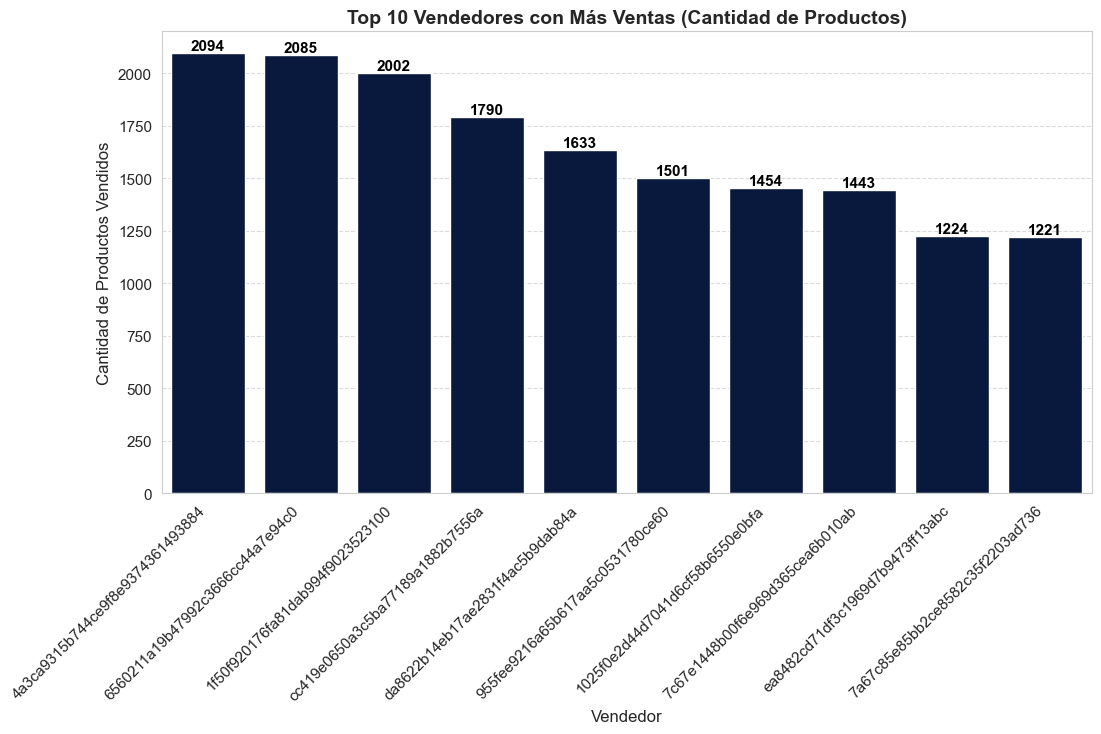

In [180]:
# Paso 1: Asegurar que no haya valores nulos en "seller_names"
df = df.dropna(subset=['seller_id'])

# Paso 2: Obtener los 10 vendedores con más ventas (por cantidad de productos vendidos)
top_sellers = (
    df.groupby("seller_id")["order_item_id"]
    .count()
    .nlargest(10)
    .reset_index()
)

# Paso 3: Configurar el gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_sellers,
    x="seller_id",
    y="order_item_id",
    palette=["#001647"] 
)

# Paso 4: Agregar valores sobre las barras
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )

# Paso 5: Personalizar el diseño del gráfico
plt.title("Top 10 Vendedores con Más Ventas (Cantidad de Productos)", fontsize=14, fontweight='bold')
plt.xlabel("Vendedor", fontsize=12)
plt.ylabel("Cantidad de Productos Vendidos", fontsize=12)
plt.xticks(rotation=45, fontsize=11, ha='right') 
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


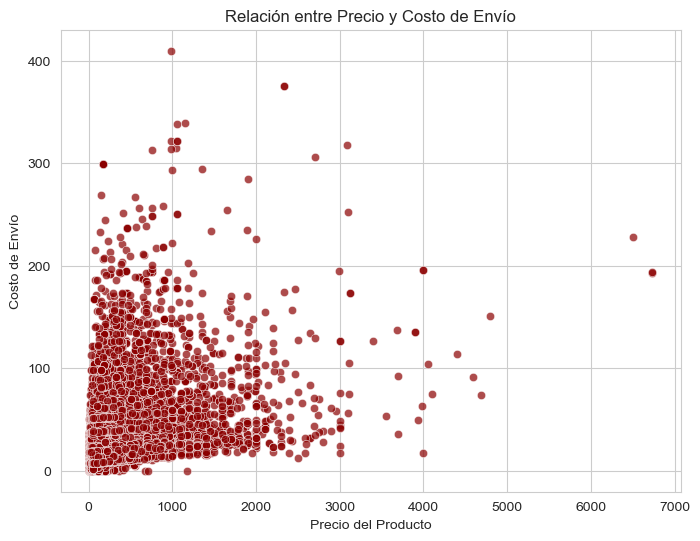

In [181]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["price"], y=df["freight_value"], alpha=0.7, color="darkred")
plt.title("Relación entre Precio y Costo de Envío")
plt.xlabel("Precio del Producto")
plt.ylabel("Costo de Envío")
plt.show()



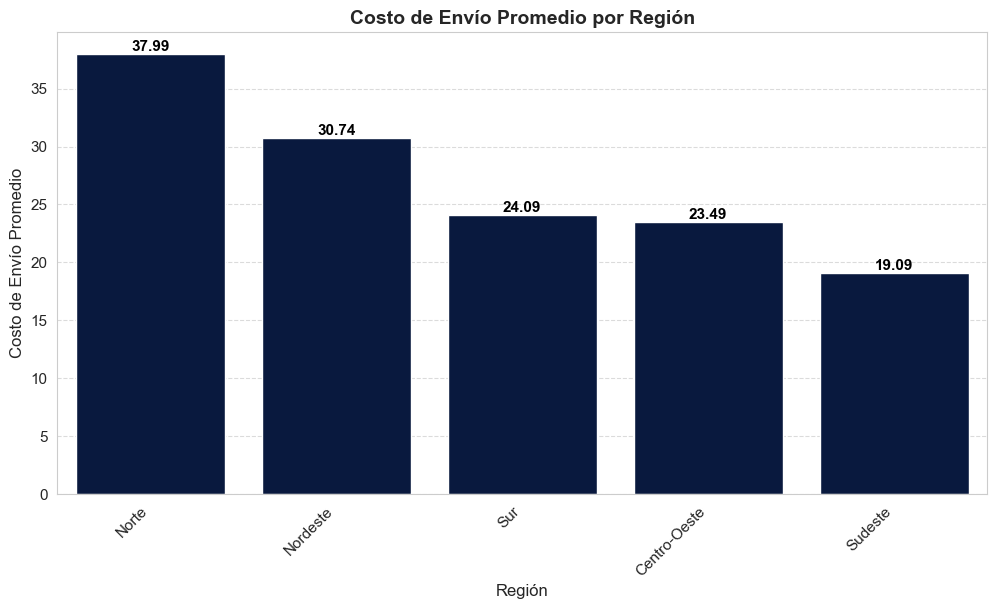

In [182]:
# Paso 1: Asegurar que las columnas sean numéricas y no contengan valores nulos
df = df.dropna(subset=['price', 'freight_value'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce')

# Paso 2: Calcular el precio promedio y costo de envío promedio por región
seller_summary = df.groupby("seller_region").agg(
    precio_promedio=("price", "mean"),
    envio_promedio=("freight_value", "mean")
).reset_index()

# Paso 3: Ordenar por costo de envío promedio en orden descendente
top_sellers_envio = seller_summary.sort_values(by="envio_promedio", ascending=False)

# Paso 4: Configurar el gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_sellers_envio,
    x="seller_region",
    y="envio_promedio",
    palette=["#001647"]  # Azul oscuro para uniformidad
)

# Paso 5: Agregar etiquetas con los valores sobre las barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )

# Paso 6: Personalizar el diseño del gráfico
plt.title("Costo de Envío Promedio por Región", fontsize=14, fontweight='bold')
plt.xlabel("Región", fontsize=12)
plt.ylabel("Costo de Envío Promedio", fontsize=12)
plt.xticks(rotation=45, fontsize=11, ha='right')  # Rotación para mejor visibilidad
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()



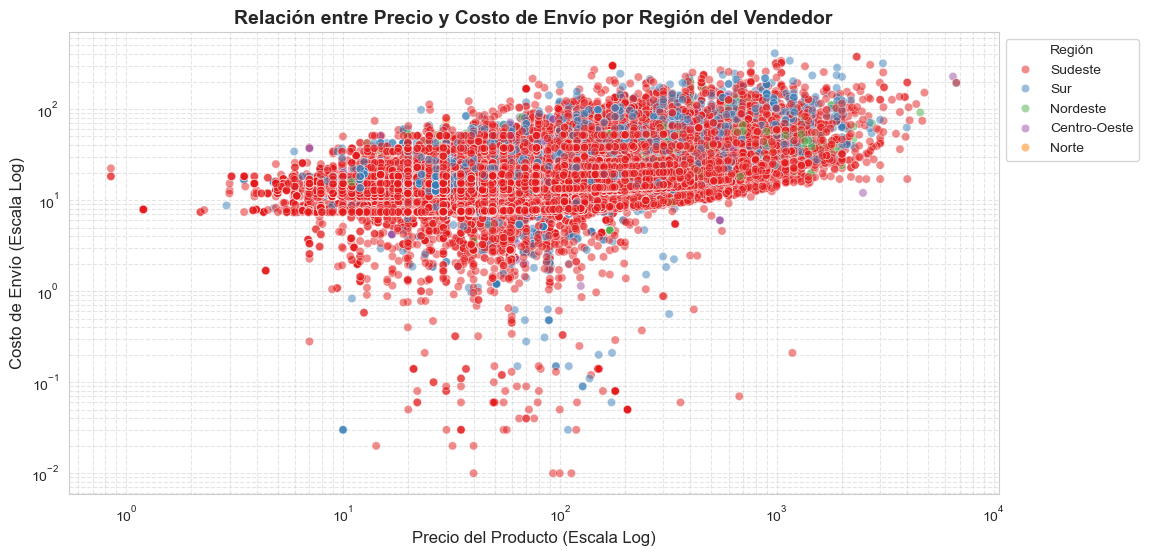

In [183]:

# Asegurar que las columnas sean numéricas y eliminar valores nulos o negativos
df = df.dropna(subset=['price', 'freight_value'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce')

# Filtrar valores fuera de un rango razonable
df = df[(df['price'] > 0) & (df['freight_value'] > 0)]

# Configurar el gráfico con mejor visualización
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x="price",
    y="freight_value",
    hue="seller_region",
    alpha=0.5,  
    palette="Set1"  
)

# Usar escala logarítmica si hay mucha dispersión
plt.xscale("log")
plt.yscale("log")

# Títulos y etiquetas
plt.title("Relación entre Precio y Costo de Envío por Región del Vendedor", fontsize=14, fontweight='bold')
plt.xlabel("Precio del Producto (Escala Log)", fontsize=12)
plt.ylabel("Costo de Envío (Escala Log)", fontsize=12)
plt.legend(title="Región", bbox_to_anchor=(1, 1))  

# Ajustar la cuadrícula para una mejor lectura
plt.grid(True, which="both", linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()


**Conclusiones generales**

- No se observa una relación significativa entre el precio y el costo de envío. Los costos de envío dependen en mayor medida de la región del vendedor y factores logísticos, que del precio del producto.
  
- La región del Sudeste destaca por tener el mayor volumen de ventas. Esto podría estar relacionado con una infraestructura de distribución más eficiente y costos de envío más bajos.

- Las regiones del Sur y Norte presentan costos de envío más elevados, lo cual podría explicarse por distancias más largas o una menor disponibilidad de transportistas en estas áreas.

- En algunos casos, los productos de mayor precio tienen costos de envío bajos, lo que podría ser el resultado de estrategias de reducción de costos logísticos o subsidios destinados a incentivar la compra de artículos de alto valor.

**Acciones y recomendaciones de negocio**

1. **Optimización de costos logísticos en el Sur y Norte**: Evaluar diferentes transportistas o considerar la apertura de centros de distribución en estas regiones para reducir los costos asociados.

2. **Análisis de rentabilidad por región**: Si los costos de envío son elevados en ciertas áreas, podría ser necesario ajustar los precios de venta o explorar opciones de subsidios logísticos.

3. **Estrategias de fijación de precios y promociones**: Implementar envíos gratuitos o descuentos en los costos de envío en las regiones con tarifas más altas para mejorar la conversión de ventas.

4. **Exploración de tarifas diferenciadas**: Si el costo de envío no está alineado con el precio de los productos, se podría considerar aplicar tarifas más justas, basadas en categorías de productos y la ubicación del vendedor.


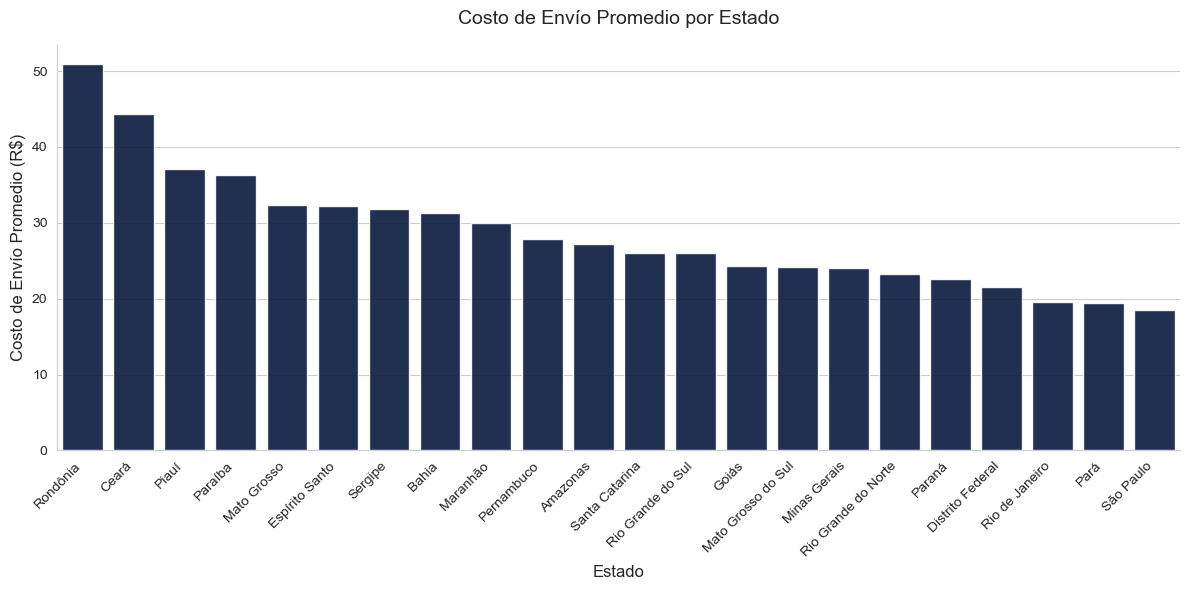

In [184]:
# Calcular el costo de envío promedio por estado del vendedor, ordenado de mayor a menor
costo_envio_estado = (
    df.groupby("seller_full_state")["freight_value"]
    .mean()
    .sort_values(ascending=False)
)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar barras
sns.barplot(
    x=costo_envio_estado.index,
    y=costo_envio_estado.values,
    color="#001647",  # Azul oscuro
    alpha=0.9
)

# Personalizar
plt.title("Costo de Envío Promedio por Estado", fontsize=14, pad=15)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Costo de Envío Promedio (R$)", fontsize=12)
plt.xticks(rotation=45, ha='right') 
sns.despine(top=True, right=True) 

plt.tight_layout()
plt.show()

**Análisis del Gráfico: Costo de Envío Promedio por Estado**  


- **1️⃣ Rondônia (RO) tiene el costo de envío más alto**, superando los **50 reales**, seguido de Ceará (CE) y Piauí (PI), lo que indica posibles dificultades logísticas en estas regiones.  

- **2️⃣ Los estados del Norte y Nordeste tienen costos de envío más elevados**, probablemente debido a **mayores distancias de transporte** y **menor infraestructura logística** en comparación con el Sudeste y Sur.  

- **3️⃣ São Paulo (SP) y Pará (PA) tienen los costos de envío más bajos**, con valores cercanos a **18-20 reales**, lo que sugiere que en estas regiones hay **más opciones logísticas, mayor volumen de envíos o distancias más cortas entre vendedores y clientes**.  

- **4️⃣ La diferencia de costos es significativa entre los extremos**, con RO casi **triplicando el costo de SP**, lo que puede impactar la **competitividad de los vendedores en ciertas regiones** y desincentivar compras en lugares con tarifas más altas.  

- **5️⃣ Los estados del Sur (PR, SC, RS) y Sudeste (SP, RJ, MG) tienen costos de envío relativamente bajos**, lo que puede favorecer el comercio en estas áreas y hacerlas más atractivas para vendedores y compradores.  

**Conclusión:**
Para reducir costos de envío en estados con valores altos, sería clave mejorar la **infraestructura logística**, aumentar la presencia de **centros de distribución** y negociar **mejores tarifas con transportistas**.



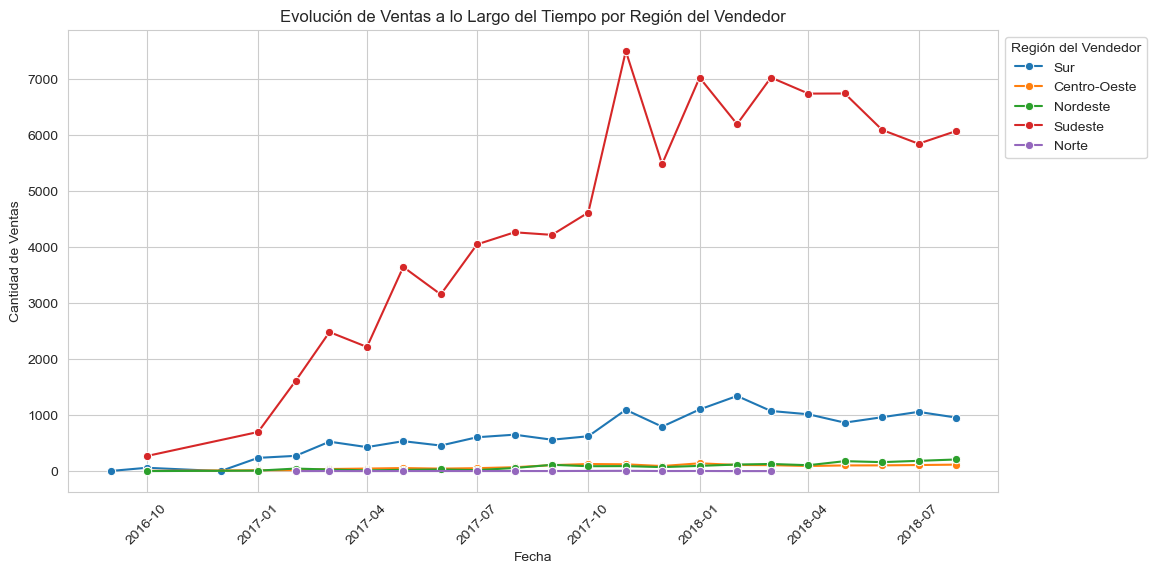

In [185]:
# Agrupar las ventas por fecha y región
ventas_por_region = df.groupby([df["order_purchase_timestamp"].dt.to_period("M"), "seller_region"])["order_item_id"].count().reset_index()

# Renombrar columnas
ventas_por_region.columns = ["fecha", "seller_region", "ventas"]

# Convertir la fecha a formato datetime
ventas_por_region["fecha"] = ventas_por_region["fecha"].astype(str)
ventas_por_region["fecha"] = pd.to_datetime(ventas_por_region["fecha"])

# Configurar el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_region, x="fecha", y="ventas", hue="seller_region", marker="o")

# Personalizar el gráfico
plt.title("Evolución de Ventas a lo Largo del Tiempo por Región del Vendedor")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.legend(title="Región del Vendedor", bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

**Análisis del Gráfico: Evolución de Ventas a lo Largo del Tiempo por Región del Vendedor**

Este gráfico de líneas muestra cómo han evolucionado las ventas mensuales en cada región del vendedor a lo largo del tiempo.

- **Puntos clave del análisis**

1. **Sudeste domina el mercado con una tendencia de crecimiento clara**
   - La región Sudeste (línea roja) tiene una cantidad de ventas mucho mayor que las demás regiones.
   - Hay un crecimiento sostenido desde 2017, con picos notables en ciertos meses.
   - Se observa un gran aumento de ventas a finales de 2017 e inicios de 2018, seguido de fluctuaciones, pero manteniéndose en valores altos.
   
   **Posible causa:**
   - Sudeste es la región más industrializada de Brasil, con mejores redes logísticas y mayor concentración de vendedores.

2. **Otras regiones tienen ventas significativamente menores**
   - El Sur (línea azul) es la segunda región con más ventas, aunque muy por debajo del Sudeste.
   - Centro-Oeste, Nordeste y Norte tienen ventas casi insignificantes en comparación.
   - Todas las regiones muestran un crecimiento leve, pero sin picos pronunciados como en Sudeste.

   **Posible causa:**
   - Puede haber menos vendedores en estas regiones, problemas de logística o menor demanda de productos.

3. **Patrones estacionales y picos de ventas**
   - Finales de 2017 e inicios de 2018 muestran un pico fuerte de ventas en Sudeste.
   - En otras regiones, los aumentos son más suaves y no muestran cambios abruptos.

   **Posible causa:**
   - Eventos como Black Friday (noviembre) y Navidad podrían haber impulsado ventas en esa época.
   - Campañas de marketing o mejoras logísticas en Sudeste pueden haber generado más ventas.

- **Conclusiones generales**
- Sudeste es la región líder en ventas y crece constantemente.
- Las otras regiones tienen ventas mucho más bajas y crecimiento moderado.
- Eventos como Black Friday o campañas específicas pueden haber impulsado picos en ciertas fechas.

**Acciones y Recomendaciones**

1. **Expansión de vendedores en otras regiones**
   - Incentivar más vendedores en Sur, Centro-Oeste, Nordeste y Norte para aumentar la presencia en el mercado.

2. **Optimización logística en regiones con menos ventas**
   - Si el problema es la falta de transportistas o altos costos de envío, buscar soluciones como nuevas rutas logísticas o alianzas con empresas de transporte.

3. **Estrategias de promoción en otras regiones**
   - Campañas específicas en Nordeste, Norte y Centro-Oeste para aumentar la demanda en esas zonas.

4. **Análisis de picos en Sudeste**
   - Identificar qué impulsó el fuerte aumento en 2017-2018 y replicar estrategias en otras regiones.


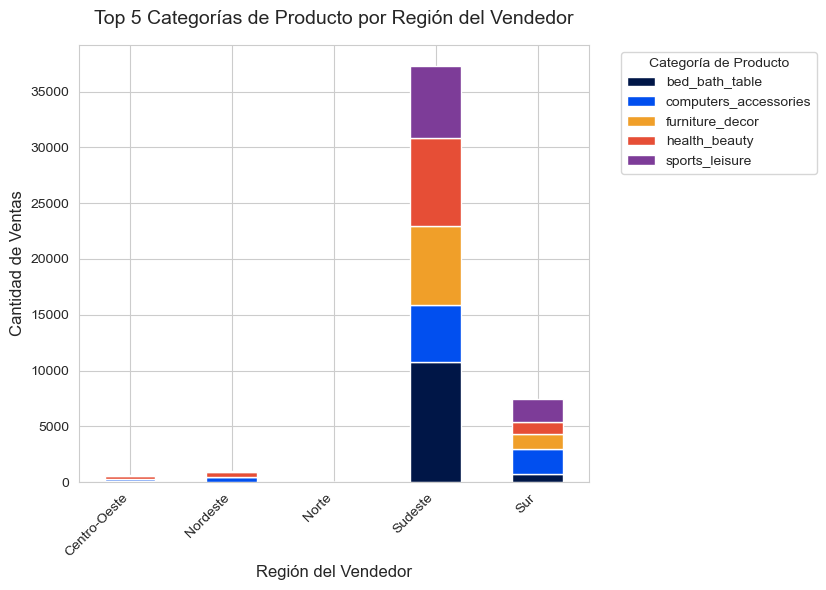

In [186]:
# Agrupar ventas por región y categoría de producto
ventas_categoria_region = df.groupby(["seller_region", "product_category"])["order_item_id"].count().reset_index()

# Seleccionar las 5 categorías más vendidas
top_categorias = ventas_categoria_region.groupby("product_category")["order_item_id"].sum().nlargest(5).index
ventas_filtradas = ventas_categoria_region[ventas_categoria_region["product_category"].isin(top_categorias)]

# Pivotear la tabla para graficar en formato apilado
ventas_pivot = ventas_filtradas.pivot(index="seller_region", columns="product_category", values="order_item_id")

# Definir colores oscuros en consonancia con la paleta usada
colors = ["#001647", "#014FEF", "#F09F29", "#E64E36", "#7D3C98"] 

# Crear el gráfico de barras apiladas con la nueva paleta
ax = ventas_pivot.plot(kind="bar", stacked=True, figsize=(10, 6), color=colors)

# Personalizar el gráfico
ax.set_title("Top 5 Categorías de Producto por Región del Vendedor", fontsize=14, pad=15)
ax.set_xlabel("Región del Vendedor", fontsize=12)
ax.set_ylabel("Cantidad de Ventas", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Ubicar la leyenda fuera del área de dibujo (a la derecha)
plt.legend(
    title="Categoría de Producto",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()


**Análisis del Gráfico: Top 5 Categorías de Producto por Región del Vendedor**

- **Sudeste domina el mercado** → La gran mayoría de las ventas provienen de esta región, con una diferencia enorme frente a las demás.

- **Las categorías más vendidas son variadas** → bed_bath_table, computers_accessories, furniture_decor, health_beauty, y sports_leisure tienen una presencia fuerte en Sudeste.

- **El Sur es la segunda región más activa** → Aunque con un volumen mucho menor, sigue mostrando una diversidad de categorías vendidas.

- **Centro-Oeste, Nordeste y Norte tienen ventas mínimas** → Poca presencia de vendedores o demanda limitada en estas regiones.

- **Oportunidad en regiones menos activas** → Potencial para expandir categorías de productos en Nordeste y Norte mediante estrategias de marketing y logística.


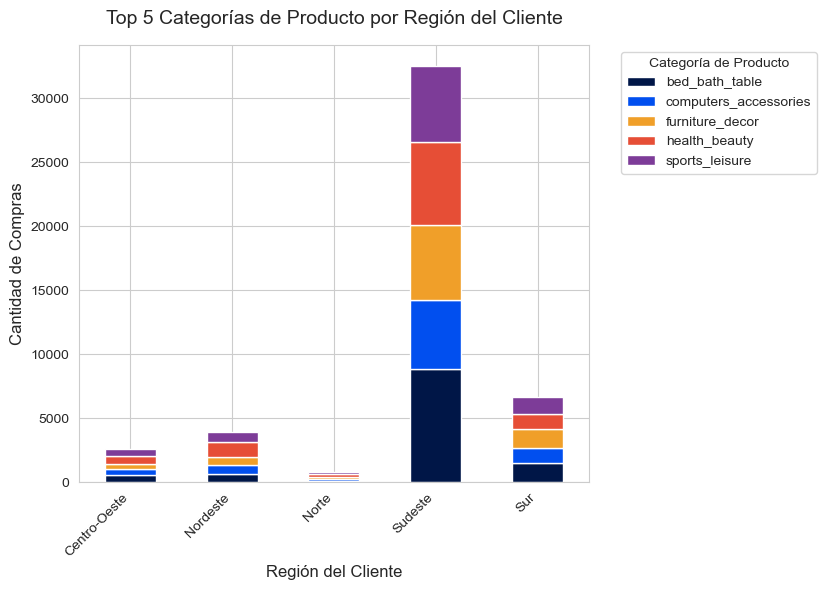

In [187]:
# Asignar la región a cada cliente
df["customer_region"] = df["customer_state"].map(region_map)

# Agrupar ventas por región del cliente y categoría de producto
ventas_categoria_cliente = (
    df.groupby(["customer_region", "product_category"])["order_item_id"]
      .count()
      .reset_index()
)

# Seleccionar las 5 categorías más compradas
top_categorias = (
    ventas_categoria_cliente
    .groupby("product_category")["order_item_id"]
    .sum()
    .nlargest(5)
    .index
)
ventas_filtradas = ventas_categoria_cliente[
    ventas_categoria_cliente["product_category"].isin(top_categorias)
]

# Pivotear la tabla para graficar en formato apilado
ventas_pivot = ventas_filtradas.pivot(
    index="customer_region",
    columns="product_category",
    values="order_item_id"
)

# Definir una lista de colores oscuros
colores = ["#001647", "#014FEF", "#F09F29", "#E64E36", "#7D3C98"]

# Crear el gráfico de barras apiladas con colores personalizados
ax = ventas_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=colores
)

# Personalizar el gráfico
ax.set_title("Top 5 Categorías de Producto por Región del Cliente", fontsize=14, pad=15)
ax.set_xlabel("Región del Cliente", fontsize=12)
ax.set_ylabel("Cantidad de Compras", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mover la leyenda a la derecha fuera del área de dibujo
plt.legend(
    title="Categoría de Producto",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

# Ajustar layout para no recortar la leyenda
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar el gráfico
plt.show()


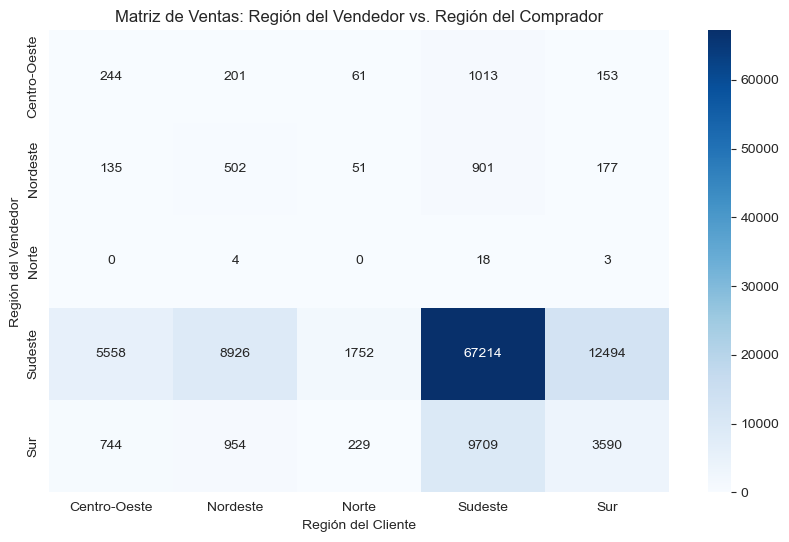

In [188]:
# Asignar la región a vendedores y clientes
df["seller_region"] = df["seller_state"].map(region_map)
df["customer_region"] = df["customer_state"].map(region_map)

# Crear una tabla cruzada (matriz) de ventas entre regiones
matriz_envios = df.pivot_table(index="seller_region", columns="customer_region", values="order_item_id", aggfunc="count", fill_value=0)

# Crear un mapa de calor para visualizar la distribución
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_envios, annot=True, fmt=".0f", cmap="Blues")

# Personalizar el gráfico
plt.title("Matriz de Ventas: Región del Vendedor vs. Región del Comprador")
plt.xlabel("Región del Cliente")
plt.ylabel("Región del Vendedor")

# Mostrar el gráfico
plt.show()

**Puntos clave del análisis**

1. **Sudeste es el epicentro del comercio en Brasil**

   - Los vendedores de Sudeste realizan la mayor cantidad de ventas dentro de su propia región (67,468 transacciones).
   - Sudeste también abastece a otras regiones, con un número significativo de envíos a:
     - **Nordeste (8,976)**
     - **Centro-Oeste (5,584)**
     - **Sur (12,548)**
   
   Esto indica que Sudeste no solo vende a compradores locales, sino que también abastece a todo el país.

   **Conclusión:**
   - Sudeste es el principal hub logístico y de ventas en Brasil.
   - Si hay problemas en la distribución en esta región, afectaría a todo el país.

2. **Las demás regiones dependen de Sudeste para el abastecimiento**

   - Centro-Oeste, Nordeste, Norte y Sur compran principalmente a vendedores de Sudeste.
   - Las ventas dentro de cada una de estas regiones son bajas, lo que sugiere que hay pocos vendedores locales.

   **Conclusión:**
   - Oportunidad de atraer más vendedores locales en Norte, Nordeste y Centro-Oeste para reducir la dependencia de Sudeste.
   - Puede ser más eficiente desarrollar centros de distribución en otras regiones para optimizar la logística.

3. **Las ventas dentro de cada región son muy desiguales**

   - Sudeste y Sur tienen un buen volumen de ventas internas (lo que indica que la oferta y la demanda son altas en esas regiones).
   - Nordeste, Norte y Centro-Oeste tienen muy pocas ventas dentro de sí mismas (lo que sugiere que dependen de otras regiones para abastecerse).

   **Conclusión:**
   - Se puede incentivar el crecimiento de vendedores en regiones como Nordeste y Centro-Oeste.
   - Estrategias como reducción de costos de envío o incentivos para vendedores locales pueden ayudar a equilibrar la distribución.

4. **Las ventas en Norte son extremadamente bajas**

   - Casi no hay vendedores en Norte (solo 4 transacciones de vendedores del Norte a compradores de Nordeste).
   - La mayoría de las compras en Norte provienen de Sudeste y Nordeste.

   **Conclusión:**
   - Oportunidad de inversión en infraestructura de ventas en el Norte.
   - Problema logístico: Si el Norte depende de otras regiones para abastecerse, los costos de envío podrían ser altos.

**Conclusiones y Recomendaciones**

- **Sudeste es el principal centro de ventas, abasteciendo a todo Brasil.**
- **Las regiones Nordeste, Norte y Centro-Oeste dependen de vendedores de Sudeste.**
- **En Norte casi no hay vendedores locales, lo que puede generar altos costos de envío y tiempos de entrega largos.**
- **Oportunidad de crecimiento en Nordeste y Centro-Oeste para fortalecer el comercio local y reducir la dependencia de Sudeste.**


In [189]:
# Contar las transacciones entre cada par de regiones
flows = df.groupby(["seller_region", "customer_region"])["order_item_id"].count().reset_index()

# Convertir datos para Sankey
sources = flows["seller_region"].tolist()
targets = flows["customer_region"].tolist()
values = flows["order_item_id"].tolist()

# Crear lista única de nombres de regiones
regions = list(set(sources + targets))

# Mapear nombres a índices
region_index = {region: i for i, region in enumerate(regions)}

# Convertir nombres en índices
source_indices = [region_index[src] for src in sources]
target_indices = [region_index[tgt] for tgt in targets]

# Crear el gráfico de Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15, thickness=20, line=dict(color="black", width=0.5),
        label=regions, color=["blue"] * len(regions)
    ),
    link=dict(
        source=source_indices, target=target_indices, value=values,
        color="rgba(150, 150, 250, 0.5)"
    )
))

# Personalizar el título
fig.update_layout(title_text="Flujo de Ventas Entre Regiones (Sankey)", font_size=12)

# Mostrar el gráfico
fig.show()

**Puntos clave del análisis**

1. **Sudeste domina como la principal región vendedora**

   - Sudeste es la región con mayor volumen de ventas y abastece a todo Brasil.
   - La mayoría de las ventas se quedan dentro de Sudeste, pero también hay envíos significativos a Sur, Nordeste, Centro-Oeste y Norte.

   **Conclusión:**
   - Sudeste es el centro logístico del país, abasteciendo tanto a compradores locales como a otras regiones.
   - Si hay problemas de distribución en Sudeste, pueden afectar todo el comercio nacional.

2. **Las otras regiones dependen de Sudeste para abastecerse**

   - Las líneas que van desde Sudeste hacia las demás regiones son más gruesas, indicando que las compras en otras regiones provienen principalmente de Sudeste.
   - Sur es la segunda región más activa, con una parte importante de ventas locales y envíos a otras regiones.

   **Conclusión:**
   - Nordeste, Centro-Oeste y Norte no tienen suficiente oferta local y dependen de vendedores de Sudeste.
   - Esto puede aumentar los costos de envío y tiempos de entrega en esas regiones.
   - Oportunidad para atraer más vendedores locales en regiones con alta demanda.

3. **Centro-Oeste y Norte tienen un comercio interno muy bajo**

   - Centro-Oeste y Norte apenas aparecen como vendedores, lo que significa que tienen muy pocos vendedores locales.
   - La mayoría de las compras en estas regiones provienen de Sudeste o Sur.

   **Conclusión:**
   - Estas regiones pueden ser mercados subdesarrollados con oportunidades para atraer más vendedores.
   - Incentivar nuevos vendedores en estas regiones podría reducir costos logísticos y mejorar la distribución.

**Conclusiones y Recomendaciones**

- **Sudeste es el centro de ventas de Brasil, abasteciendo a todo el país.**
- **Las regiones Nordeste, Centro-Oeste y Norte dependen fuertemente de Sudeste para sus compras.**
- **Centro-Oeste y Norte tienen muy pocos vendedores, lo que puede generar altos costos de envío y largos tiempos de entrega.**
- **Oportunidad para incentivar nuevos vendedores en Nordeste y Norte y descentralizar el comercio.**


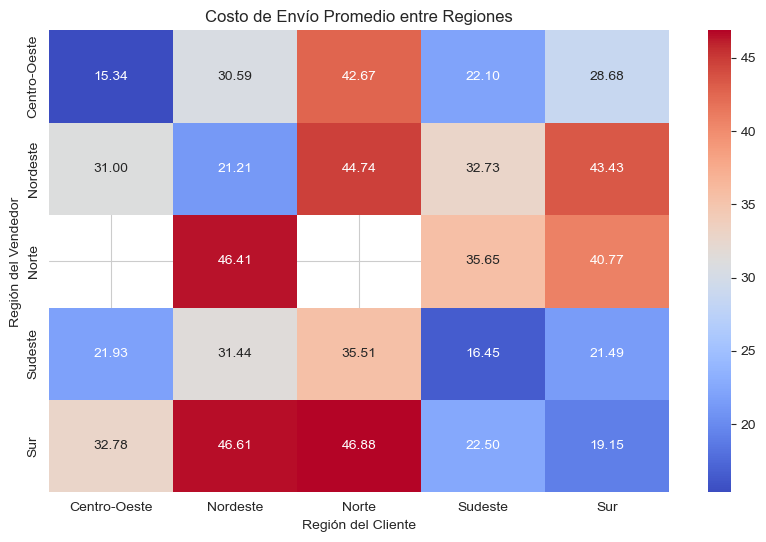

In [190]:
# Agrupar por región del vendedor y región del cliente para obtener el costo de envío promedio
costo_envio_region = df.groupby(["seller_region", "customer_region"])["freight_value"].mean().reset_index()

# Crear matriz de costos de envío
costo_envio_matriz = costo_envio_region.pivot(index="seller_region", columns="customer_region", values="freight_value")

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(costo_envio_matriz, annot=True, fmt=".2f", cmap="coolwarm")

# Personalizar el gráfico
plt.title("Costo de Envío Promedio entre Regiones")
plt.xlabel("Región del Cliente")
plt.ylabel("Región del Vendedor")

# Mostrar el gráfico
plt.show()

1. **Las rutas más económicas corresponden a envíos dentro de la misma región en Centro-Oeste y Sur**:  
   - **Centro-Oeste → Centro-Oeste** es la más barata (15.34).  
   - **Sur → Sur** también destaca con un costo bajo (15.90).  

2. **Existen rutas interregionales sorprendentemente baratas**:  
   - **Sur → Sudeste** (19.15) resulta más económico que otros envíos dentro de la misma región en Norte (35.24).  

3. **Costos intra-regionales variables**:  
   - **Nordeste → Nordeste** (21.21) y **Sudeste → Sudeste** (21.40) se ubican en una franja moderada.  
   - **Norte → Norte** (35.24) es inusualmente alto en comparación con otros envíos intra-regionales.  

4. **Las rutas más costosas suelen involucrar grandes distancias o regiones menos conectadas**:  
   - **Sur → Centro-Oeste** (46.61) y **Sur → Nordeste** (46.60) alcanzan los valores más altos.  
   - **Sudeste → Norte** (46.18) y **Norte → Centro-Oeste** (46.41) también se sitúan por encima de 45.  

5. **Norte presenta varias rutas de costo elevado**:  
   - Además de su alto costo interno (35.24), los envíos hacia Centro-Oeste (46.41) o desde Sudeste (46.18) superan los 40, lo que sugiere mayores distancias o infraestructura menos desarrollada.


**Recomendaciones para optimizar costos de envío basadas en la matriz de costos entre regiones:**

1. **Establecer o fortalecer centros de distribución en regiones clave**  
   - Dado que los costos más altos se observan en envíos largos (p. ej., Sur → Centro-Oeste o Sudeste → Norte), la apertura de almacenes o hubs logísticos más cercanos podría reducir el tiempo y costo de transporte.

2. **Negociar tarifas con proveedores logísticos en rutas específicas**  
   - En rutas donde el volumen de pedidos es alto pero los costos también lo son (por ejemplo, Sudeste ↔ Norte), se podrían lograr mejores acuerdos tarifarios aprovechando economías de escala.

3. **Analizar la viabilidad de transportes alternativos**  
   - Para regiones con costos muy elevados, considerar otros medios (transporte marítimo, fluvial o ferroviario, si están disponibles) puede reducir los costos y la dependencia del transporte por carretera o aéreo.

4. **Segmentar y planificar la demanda según la región**  
   - Identificar las rutas con mayor demanda y ajustar la estrategia de inventario (p. ej., mantener más stock en la región donde haya mayor concentración de clientes) para reducir la necesidad de envíos de larga distancia.

5. **Optimizar la gestión de pedidos y empaques**  
   - Consolidar pedidos para evitar envíos fragmentados y así disminuir el costo por paquete. Además, usar empaques eficientes en peso y volumen contribuye a un menor costo de flete en rutas costosas.

Estas recomendaciones buscan equilibrar la logística entre regiones, aprovechando las rutas con menores costos y buscando soluciones para aquellas con tarifas más elevadas. Con una estrategia integral que combine hubs logísticos, negociación de tarifas y optimización de inventarios, es posible reducir de manera significativa el costo total de envío.  


## Análisis de Experiencia y Logística
**(a) Tiempos de Entrega vs. Satisfacción**

Este apartado busca correlacionar las métricas de tiempo logístico (por ejemplo, delivery_delay, processing_time, late_delivery) con el nivel de satisfacción del cliente (review_score). El objetivo es determinar si los retrasos en la entrega o el exceso de tiempo de procesamiento impactan negativamente la reseña del cliente. Una correlación alta (negativa) sugeriría que a mayor retraso, menor puntuación de satisfacción.

In [191]:

# 1) Ver la correlación entre tiempos y review_score
cols_interes = ['delivery_delay', 'processing_time', 'review_score']
corr_matrix = df[cols_interes].corr()
print("Matriz de correlación:\n", corr_matrix)

Matriz de correlación:
                  delivery_delay  processing_time  review_score
delivery_delay         1.000000         0.598950     -0.228846
processing_time        0.598950         1.000000     -0.303852
review_score          -0.228846        -0.303852      1.000000


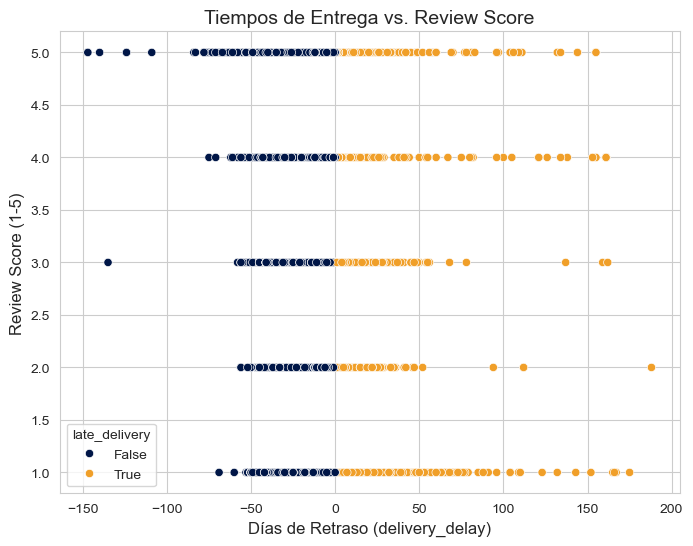

In [192]:
# 2) Scatterplot: delivery_delay vs. review_score
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='delivery_delay',
    y='review_score',
    hue='late_delivery',  
    palette=['#001647', '#f09f29']  
)
plt.title("Tiempos de Entrega vs. Review Score", fontsize=14)
plt.xlabel("Días de Retraso (delivery_delay)", fontsize=12)
plt.ylabel("Review Score (1-5)", fontsize=12)
plt.show()

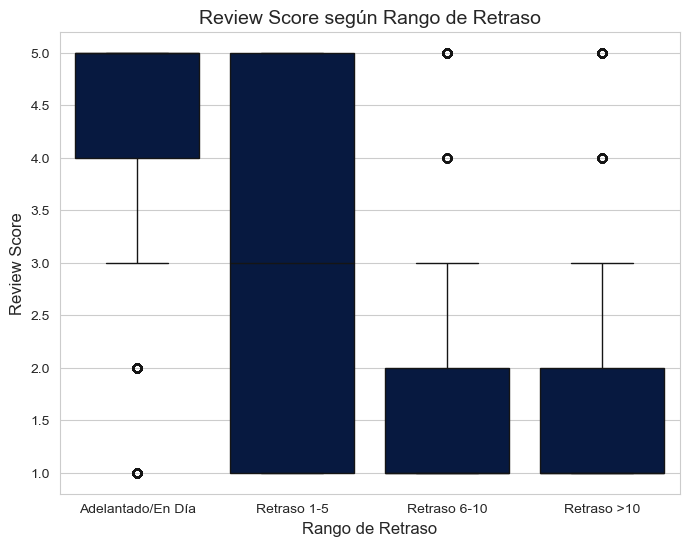

In [193]:
# 3) Boxplot según rangos de retraso
df['delay_bin'] = pd.cut(
    df['delivery_delay'],
    bins=[-999, 0, 5, 10, 999],
    labels=['Adelantado/En Día', 'Retraso 1-5', 'Retraso 6-10', 'Retraso >10']
)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='delay_bin',
    y='review_score',
    color='#001647',
    saturation=0.8
)
plt.title("Review Score según Rango de Retraso", fontsize=14)
plt.xlabel("Rango de Retraso", fontsize=12)
plt.ylabel("Review Score", fontsize=12)
plt.show()

**(b) Regiones y Tiempos de Envío**
El objetivo aquí es detectar si ciertas regiones de origen (seller_region) o destino (customer_region) presentan más retrasos en envío (shipping_late_days, delivery_delay, etc.). Esto permite optimizar la red de transporte o priorizar mejoras logísticas en zonas problemáticas.

In [194]:
# 1) Agrupar por región de vendedor y cliente para ver retraso medio
region_delay = (
    df.groupby(['seller_region', 'customer_region'])[['shipping_late_days', 'delivery_delay']]
    .mean()
    .reset_index()
)
print(region_delay.head(10))

  seller_region customer_region  shipping_late_days  delivery_delay
0  Centro-Oeste    Centro-Oeste           -3.823770      -10.922131
1  Centro-Oeste        Nordeste           -3.373134      -11.905473
2  Centro-Oeste           Norte           -2.721311      -16.147541
3  Centro-Oeste         Sudeste           -3.849951      -14.889437
4  Centro-Oeste             Sur           -4.013072      -14.405229
5      Nordeste    Centro-Oeste           -3.992593      -12.970370
6      Nordeste        Nordeste           -3.304781      -11.858566
7      Nordeste           Norte           -3.078431      -14.784314
8      Nordeste         Sudeste           -3.301887      -14.542730
9      Nordeste             Sur           -3.355932      -13.751412


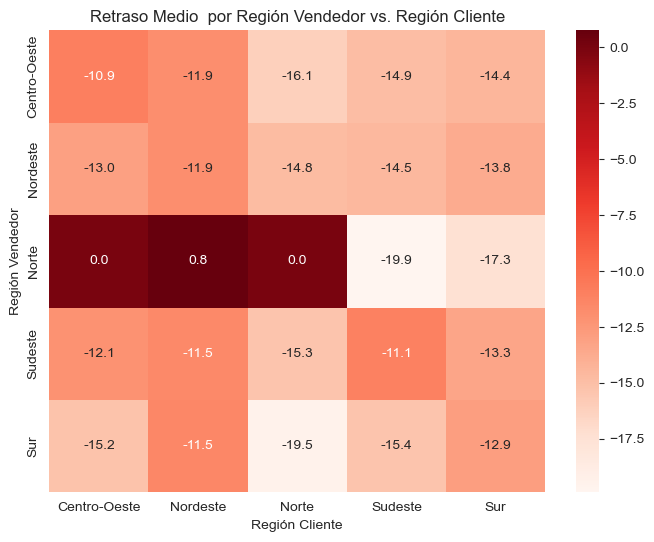

In [195]:
# 2) Crear un mapa de calor para visualizar el retraso medio
pivot_delay = region_delay.pivot(
    index='seller_region',
    columns='customer_region',
    values='delivery_delay'
).fillna(0)
# 3) Visualizar con un heatmap

plt.figure(figsize=(8,6))
sns.heatmap(pivot_delay, annot=True, fmt=".1f", cmap="Reds")
plt.title("Retraso Medio  por Región Vendedor vs. Región Cliente")
plt.xlabel("Región Cliente")
plt.ylabel("Región Vendedor")
plt.show()

In [196]:
df.to_csv('DATA/df_EDA.csv', index=False)
df_EDA = pd.read_csv('DATA/df_EDA.csv')
df_EDA.head()


order_id                       customer_id  \
0  0a0837a5eee9e7a9ce2b1fa831944d27  4f3f778022aefa22b9f9e52d2c47edf3   
1  b533dea24ada4dc5c1a9041d25d7c812  3a4ccb2c6fb972d301b8f9edfbf81fbd   
2  c022b7da8ab7a4a04bd561c8f765a14a  c797ffdbae65b56c177d3c1368d03628   
3  6219ece1f053a3ffa649340e87cd93d2  356e49e06716cab5d634234a371dba70   
4  22474d84064cd7eb4a907ba3fd8a6398  85f03d59e05ad20dc077b89342b9f710   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2016-10-04 09:06:10  2016-10-06 11:43:20   
1    delivered      2016-10-08 21:12:48  2016-10-11 04:56:40   
2    delivered      2017-01-17 23:40:42  2017-01-17 23:50:15   
3    delivered      2017-01-20 15:08:05  2017-01-20 15:21:48   
4    delivered      2017-01-25 09:09:46  2017-01-25 09:22:26   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2016-10-15 10:33:08           2016-10-22 14:51:18   
1          2016-10-21 12:37:01           2016-10-28 16:31:34   
2          2017-01-18 13:59:38           2017-01-25 12:51:51   
3          2017-01-23 10:17:42           2017-02-02 15:15:52   
4          2017-01-31 10:18:50           2017-02-02 16:56:10   

  order_estimated_delivery_date                customer_unique_id  \
0                    2016-11-24  cd5a5843d35eebdf90368bf24d4a04cf   
1                    2016-12-02  ff822e5e1322cef6c211ad8a0591999e   
2                    2017-03-01  b77373c1be1866a704f28814c378b253   
3                    2017-03-08  8416fd034dbaeface8a52c0819d3dffa   
4                    2017-03-02  a34dc635486de07782636bdef2afd77a   

   customer_zip_code_prefix customer_city customer_state  order_item_id  \
0                      9390          maua             SP              1   
1                     25740    petropolis             RJ              1   
2                     32400       ibirite             MG              1   
3                     74870       goiania             GO              1   
4                      3630     sao paulo             SP              1   

                         product_id                         seller_id  \
0  583916a5dae918f5e89baec139141c54  3481aa57cd91f9f9d3fa1fa12d9a3bf7   
1  661e3bba6bdb874638367462b49ae590  23613d49c3ac2bd302259e55c06c050c   
2  d36c8237f8a0a889aa9d6ac7816097e3  80e6699fe29150b372a0c8a1ebf7dcc8   
3  aa2b29bee083c3eb3779f39fc09527b7  46dc3b2cc0980fb8ec44634e21d2718e   
4  6f6f3b1a96452e2fbad0cd4f7082765b  ff314fa6033cc68ec451c47aee2d6ba4   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2016-10-10 11:43:22   49.99          15.51                 1.0   
1  2016-10-15 04:56:41   15.90          14.52                 1.0   
2  2017-01-21 23:40:42  169.00          25.00                 1.0   
3  2017-01-24 15:08:05  349.99          20.69                 1.0   
4  2017-01-29 09:09:46  279.90          16.88                 1.0   

  payment_type  payment_installments  payment_value  \
0   debit_card                   1.0          65.50   
1       boleto                   1.0          30.42   
2  credit_card                   1.0         194.00   
3  credit_card                   3.0         370.68   
4  credit_card                   4.0         296.78   

                          review_id  review_score review_comment_title  \
0  1e90e853bc88ad9caca6311a2e497399           5.0                  NaN   
1  1d05fc92b63e46f67761f2a33053fb64           5.0                  NaN   
2  16fb8d46e948a7cfe0e47aa500fd84f2           5.0                  NaN   
3  80952cab0b6a36c4bdd70872dc0896ab           5.0                  NaN   
4  d26120d9971ed6aefccc2440a5d28db5           5.0                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2016-10-25 00:00:00   
1  Abriram, sumiram com a nota, mas não era droga...           2016-10-29   
2                                                NaN  2017-01-26 00:00:00   
3             

In [2]:
import nbformat
from IPython.display import display, Markdown

# Ruta de tu notebook
notebook_path = r"C:\Users\Usuario\Desktop\GITHUB\Proyecto-Analisis-Avanzado-de-Datos-y-Sentimientos-en-E-Commerce\EDA.ipynb"

# Leer el notebook
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Extraer todos los markdowns
markdown_cells = [cell['source'] for cell in nb.cells if cell['cell_type'] == 'markdown']

# Unir todos los markdowns en un solo bloque de texto
todo_el_markdown = '\n\n---\n\n'.join(markdown_cells)

# Mostrarlo como bloque de código para poder copiarlo fácilmente
display(Markdown(f"```\n{todo_el_markdown}\n```"))


```
# Librerías

---

# Cargar datos

---

# Función exploración inicial

---

# Normalización de columnas

---

## **`product_category`**

Se utilizó `df_categorias` para traducir `df['product_category_name']` a inglés.  
Al detectar algunas categorías faltantes, las creamos y realizamos un merge.  
La nueva columna con las categorías en inglés es `product_category`.

---

Se comprueba que no haya nulos en la columna `product_category`

---

## Fecha

Se estandarizan las columnas de fecha del DataFrame, asegurando que todas estén correctamente formateadas como `datetime`.

A partir de ellas, se generan variables temporales para análisis exploratorio y patrones de comportamiento a lo largo del tiempo.

También se calculan métricas clave del proceso logístico, como tiempos de aprobación, preparación, envío y retraso en la entrega.  

Se comprueba que las transformaciones no generen datos nulos.

---

## Geográficas

Se agrupan los estados de clientes y vendedores en regiones geográficas de Brasil para facilitar los análisis por zona;  
estas categorías se almacenan en las columnas `customer_region` y `seller_region`.

Se traducen los códigos de estado a sus nombres completos para mejorar la legibilidad y facilitar la interpretación;  
los resultados se almacenan en las columnas `customer_full_state` y `seller_full_state`.

Estas transformaciones permiten interpretar y visualizar la información territorial de manera más intuitiva y estructurada.

---

## Agrupación de pedidos: productos, cuotas, tipo de pago, precio ticket, beneficio ticket

En este bloque se crean varias columnas clave para analizar la estructura de los pedidos y los patrones de pago. A continuación se detallan las columnas generadas y su propósito:

1. **`max_order_item_id`**: Identifica el artículo con el identificador más alto en cada pedido, lo cual es esencial para conocer la cantidad de productos involucrados en cada transacción y analizar las características de los mismos.

2. **`max_payment_sequential`**: Captura el número máximo de pagos realizados en un solo pedido. Este dato es útil para estudiar el comportamiento de pago del cliente, como los pagos fraccionados o la modalidad de pago por cuotas.

3. **`most_frequent_payment_type`**: Determina el tipo de pago más común dentro de cada pedido. Esto permite identificar las preferencias del cliente con respecto a los métodos de pago, y puede ayudar a optimizar las opciones de pago disponibles.

4. **`precio_ticket`**: Representa el valor total de cada pedido, calculado sumando los montos de los pagos realizados. Esta columna es fundamental para el análisis de la facturación total de cada cliente.

5. **`beneficio_ticket`**: Calcula el beneficio neto de cada pedido, restando el costo total de los productos y el costo de envío al valor recibido en los pagos. Este valor es crítico para evaluar la rentabilidad de los pedidos y ajustar estrategias de precios y costos.

Estas columnas permiten obtener una comprensión más profunda del comportamiento de compra de los clientes, las preferencias de pago y la rentabilidad de cada pedido. Además, facilitan el análisis de tendencias que pueden ser cruciales para la optimización de las operaciones de venta y la toma de decisiones estratégicas.

---

# Segmentaciones

---

## Segmentación de clientes

---

**Conclusiones Claves**

- **Demasiadas compras únicas:** La mayoría de los clientes compran solo una vez, lo que indica una baja fidelización.  
- **El ticket medio (75-350) domina:** Este segmento concentra la mayor parte del gasto y la cantidad de pedidos.  
- **Clientes de alto valor poco frecuentes:** Los que gastan más de 500 tienen poca recurrencia, pero generan ingresos relevantes.  
- **Frecuencia y ticket están inversamente relacionados:** A mayor ticket, menor número de pedidos repetidos.  

**Recomendaciones**  
- Implementar estrategias de **retención** para reducir la cantidad de clientes de compra única.  
- **Optimizar precios y promociones** en el rango de **75-350**, ya que concentra el mayor gasto.  
- Desarrollar estrategias de **fidelización** para clientes de alto ticket con incentivos exclusivos.  

---

## Segmentación categorías

---

**Conclusiones Claves**

- **La mayoría de los pedidos son de compras diarias y de bajo precio (< 200).**  
- **Las compras más caras (> 500) tienen baja frecuencia, pero representan una parte importante del gasto total.**  
- **El segmento de compra semanal es el más relevante después del diario en términos de volumen y gasto.**  
- **Las compras quincenales, mensuales y estacionales son marginales y tienen poco impacto en las ventas.**  

**Recomendaciones**
- **Optimizar precios y promociones** en los segmentos de compras diarias y semanales, especialmente en el rango de **75-200**.  
- **Fomentar la recurrencia** en clientes de compras de alto precio mediante programas de fidelización o beneficios exclusivos.  
- **Explorar estrategias para aumentar la frecuencia de compra** en clientes quincenales y mensuales.  

---

**Conclusiones Claves**

- **Los clientes más activos (segmentos 1-2) concentran la mayoría de las compras, especialmente diarias y semanales.**  
- **Los clientes con menor actividad (segmentos 3-4) apenas contribuyen al volumen de compras.**  
- **Las compras de bajo valor (< 75) representan la mayor parte del gasto total.**  
- **El gasto en productos de alto precio (> 500) es marginal y está concentrado en pocos clientes.**  

**Recomendaciones**
- **Focalizar estrategias de retención** en los clientes de segmentos 1-2, ya que son los más rentables.  
- **Diseñar incentivos para aumentar la actividad** de los clientes del segmento 3 y evitar que migren a inactividad.  
- **Explorar promociones en productos de mayor precio** para aumentar su participación en las ventas.  

---

# ¿Cuáles son las categorías más populares?

---

# ¿Cuáles son los estados en los que más se compra?

---

## ¿Cuáles son las regiones en las que más se compra?

---

## ¿Cuáles son las categorías más vendidas por Estado?

---

# ¿Cuál es el medio de pago predominante?

---

# ¿Cuál es el gasto promedio atendiendo al número de cuotas?

---

Payment installments indica el nº de cuotas totales de un pedido. Se contabiliza el precio del ticket para ver la tendencia a la hora de aplazar pagos.

---

# ¿Cuál es la distribución de las calificaciones de los clientes en las reseñas?

---

# ¿Qué categorías de productos tienen las mejores y peores calificaciones?

---

# ¿Cómo se distribuyen las calificaciones por Estado?

---

# ¿Los clientes que dejan comentarios negativos tienen patrones de compra distintos a los que dejan comentarios positivos?

---

# ¿Cómo impacta el tiempo de entrega en la calificación del pedido?

---

Se crea columna `delivery_delay`, indica la diferencia entre la fecha estimada de entrega y la fecha real de entrega.

Se crean las columnas `on_time, `late_delivery`que de manera independiente informan si la entrega se hizo a tiempo o tarde

---

# ¿Cuáles son los plazos en las distintas fases de envío?

---

# ¿Cuáles son las tendencias de compras a lo largo del año?

---

## Análisis de Ventas en Black Friday (24 de Noviembre de 2017)

---

## Fin de semana de Black Friday hasta Cyber Monday

---

# Sellers y Logistica


---

**Conclusiones generales**

- No se observa una relación significativa entre el precio y el costo de envío. Los costos de envío dependen en mayor medida de la región del vendedor y factores logísticos, que del precio del producto.
  
- La región del Sudeste destaca por tener el mayor volumen de ventas. Esto podría estar relacionado con una infraestructura de distribución más eficiente y costos de envío más bajos.

- Las regiones del Sur y Norte presentan costos de envío más elevados, lo cual podría explicarse por distancias más largas o una menor disponibilidad de transportistas en estas áreas.

- En algunos casos, los productos de mayor precio tienen costos de envío bajos, lo que podría ser el resultado de estrategias de reducción de costos logísticos o subsidios destinados a incentivar la compra de artículos de alto valor.

**Acciones y recomendaciones de negocio**

1. **Optimización de costos logísticos en el Sur y Norte**: Evaluar diferentes transportistas o considerar la apertura de centros de distribución en estas regiones para reducir los costos asociados.

2. **Análisis de rentabilidad por región**: Si los costos de envío son elevados en ciertas áreas, podría ser necesario ajustar los precios de venta o explorar opciones de subsidios logísticos.

3. **Estrategias de fijación de precios y promociones**: Implementar envíos gratuitos o descuentos en los costos de envío en las regiones con tarifas más altas para mejorar la conversión de ventas.

4. **Exploración de tarifas diferenciadas**: Si el costo de envío no está alineado con el precio de los productos, se podría considerar aplicar tarifas más justas, basadas en categorías de productos y la ubicación del vendedor.


---

**Análisis del Gráfico: Costo de Envío Promedio por Estado**  


- **1️⃣ Rondônia (RO) tiene el costo de envío más alto**, superando los **50 reales**, seguido de Ceará (CE) y Piauí (PI), lo que indica posibles dificultades logísticas en estas regiones.  

- **2️⃣ Los estados del Norte y Nordeste tienen costos de envío más elevados**, probablemente debido a **mayores distancias de transporte** y **menor infraestructura logística** en comparación con el Sudeste y Sur.  

- **3️⃣ São Paulo (SP) y Pará (PA) tienen los costos de envío más bajos**, con valores cercanos a **18-20 reales**, lo que sugiere que en estas regiones hay **más opciones logísticas, mayor volumen de envíos o distancias más cortas entre vendedores y clientes**.  

- **4️⃣ La diferencia de costos es significativa entre los extremos**, con RO casi **triplicando el costo de SP**, lo que puede impactar la **competitividad de los vendedores en ciertas regiones** y desincentivar compras en lugares con tarifas más altas.  

- **5️⃣ Los estados del Sur (PR, SC, RS) y Sudeste (SP, RJ, MG) tienen costos de envío relativamente bajos**, lo que puede favorecer el comercio en estas áreas y hacerlas más atractivas para vendedores y compradores.  

**Conclusión:**
Para reducir costos de envío en estados con valores altos, sería clave mejorar la **infraestructura logística**, aumentar la presencia de **centros de distribución** y negociar **mejores tarifas con transportistas**.



---

**Análisis del Gráfico: Evolución de Ventas a lo Largo del Tiempo por Región del Vendedor**

Este gráfico de líneas muestra cómo han evolucionado las ventas mensuales en cada región del vendedor a lo largo del tiempo.

- **Puntos clave del análisis**

1. **Sudeste domina el mercado con una tendencia de crecimiento clara**
   - La región Sudeste (línea roja) tiene una cantidad de ventas mucho mayor que las demás regiones.
   - Hay un crecimiento sostenido desde 2017, con picos notables en ciertos meses.
   - Se observa un gran aumento de ventas a finales de 2017 e inicios de 2018, seguido de fluctuaciones, pero manteniéndose en valores altos.
   
   **Posible causa:**
   - Sudeste es la región más industrializada de Brasil, con mejores redes logísticas y mayor concentración de vendedores.

2. **Otras regiones tienen ventas significativamente menores**
   - El Sur (línea azul) es la segunda región con más ventas, aunque muy por debajo del Sudeste.
   - Centro-Oeste, Nordeste y Norte tienen ventas casi insignificantes en comparación.
   - Todas las regiones muestran un crecimiento leve, pero sin picos pronunciados como en Sudeste.

   **Posible causa:**
   - Puede haber menos vendedores en estas regiones, problemas de logística o menor demanda de productos.

3. **Patrones estacionales y picos de ventas**
   - Finales de 2017 e inicios de 2018 muestran un pico fuerte de ventas en Sudeste.
   - En otras regiones, los aumentos son más suaves y no muestran cambios abruptos.

   **Posible causa:**
   - Eventos como Black Friday (noviembre) y Navidad podrían haber impulsado ventas en esa época.
   - Campañas de marketing o mejoras logísticas en Sudeste pueden haber generado más ventas.

- **Conclusiones generales**
- Sudeste es la región líder en ventas y crece constantemente.
- Las otras regiones tienen ventas mucho más bajas y crecimiento moderado.
- Eventos como Black Friday o campañas específicas pueden haber impulsado picos en ciertas fechas.

**Acciones y Recomendaciones**

1. **Expansión de vendedores en otras regiones**
   - Incentivar más vendedores en Sur, Centro-Oeste, Nordeste y Norte para aumentar la presencia en el mercado.

2. **Optimización logística en regiones con menos ventas**
   - Si el problema es la falta de transportistas o altos costos de envío, buscar soluciones como nuevas rutas logísticas o alianzas con empresas de transporte.

3. **Estrategias de promoción en otras regiones**
   - Campañas específicas en Nordeste, Norte y Centro-Oeste para aumentar la demanda en esas zonas.

4. **Análisis de picos en Sudeste**
   - Identificar qué impulsó el fuerte aumento en 2017-2018 y replicar estrategias en otras regiones.


---

**Análisis del Gráfico: Top 5 Categorías de Producto por Región del Vendedor**

- **Sudeste domina el mercado** → La gran mayoría de las ventas provienen de esta región, con una diferencia enorme frente a las demás.

- **Las categorías más vendidas son variadas** → bed_bath_table, computers_accessories, furniture_decor, health_beauty, y sports_leisure tienen una presencia fuerte en Sudeste.

- **El Sur es la segunda región más activa** → Aunque con un volumen mucho menor, sigue mostrando una diversidad de categorías vendidas.

- **Centro-Oeste, Nordeste y Norte tienen ventas mínimas** → Poca presencia de vendedores o demanda limitada en estas regiones.

- **Oportunidad en regiones menos activas** → Potencial para expandir categorías de productos en Nordeste y Norte mediante estrategias de marketing y logística.


---

**Puntos clave del análisis**

1. **Sudeste es el epicentro del comercio en Brasil**

   - Los vendedores de Sudeste realizan la mayor cantidad de ventas dentro de su propia región (67,468 transacciones).
   - Sudeste también abastece a otras regiones, con un número significativo de envíos a:
     - **Nordeste (8,976)**
     - **Centro-Oeste (5,584)**
     - **Sur (12,548)**
   
   Esto indica que Sudeste no solo vende a compradores locales, sino que también abastece a todo el país.

   **Conclusión:**
   - Sudeste es el principal hub logístico y de ventas en Brasil.
   - Si hay problemas en la distribución en esta región, afectaría a todo el país.

2. **Las demás regiones dependen de Sudeste para el abastecimiento**

   - Centro-Oeste, Nordeste, Norte y Sur compran principalmente a vendedores de Sudeste.
   - Las ventas dentro de cada una de estas regiones son bajas, lo que sugiere que hay pocos vendedores locales.

   **Conclusión:**
   - Oportunidad de atraer más vendedores locales en Norte, Nordeste y Centro-Oeste para reducir la dependencia de Sudeste.
   - Puede ser más eficiente desarrollar centros de distribución en otras regiones para optimizar la logística.

3. **Las ventas dentro de cada región son muy desiguales**

   - Sudeste y Sur tienen un buen volumen de ventas internas (lo que indica que la oferta y la demanda son altas en esas regiones).
   - Nordeste, Norte y Centro-Oeste tienen muy pocas ventas dentro de sí mismas (lo que sugiere que dependen de otras regiones para abastecerse).

   **Conclusión:**
   - Se puede incentivar el crecimiento de vendedores en regiones como Nordeste y Centro-Oeste.
   - Estrategias como reducción de costos de envío o incentivos para vendedores locales pueden ayudar a equilibrar la distribución.

4. **Las ventas en Norte son extremadamente bajas**

   - Casi no hay vendedores en Norte (solo 4 transacciones de vendedores del Norte a compradores de Nordeste).
   - La mayoría de las compras en Norte provienen de Sudeste y Nordeste.

   **Conclusión:**
   - Oportunidad de inversión en infraestructura de ventas en el Norte.
   - Problema logístico: Si el Norte depende de otras regiones para abastecerse, los costos de envío podrían ser altos.

**Conclusiones y Recomendaciones**

- **Sudeste es el principal centro de ventas, abasteciendo a todo Brasil.**
- **Las regiones Nordeste, Norte y Centro-Oeste dependen de vendedores de Sudeste.**
- **En Norte casi no hay vendedores locales, lo que puede generar altos costos de envío y tiempos de entrega largos.**
- **Oportunidad de crecimiento en Nordeste y Centro-Oeste para fortalecer el comercio local y reducir la dependencia de Sudeste.**


---

**Puntos clave del análisis**

1. **Sudeste domina como la principal región vendedora**

   - Sudeste es la región con mayor volumen de ventas y abastece a todo Brasil.
   - La mayoría de las ventas se quedan dentro de Sudeste, pero también hay envíos significativos a Sur, Nordeste, Centro-Oeste y Norte.

   **Conclusión:**
   - Sudeste es el centro logístico del país, abasteciendo tanto a compradores locales como a otras regiones.
   - Si hay problemas de distribución en Sudeste, pueden afectar todo el comercio nacional.

2. **Las otras regiones dependen de Sudeste para abastecerse**

   - Las líneas que van desde Sudeste hacia las demás regiones son más gruesas, indicando que las compras en otras regiones provienen principalmente de Sudeste.
   - Sur es la segunda región más activa, con una parte importante de ventas locales y envíos a otras regiones.

   **Conclusión:**
   - Nordeste, Centro-Oeste y Norte no tienen suficiente oferta local y dependen de vendedores de Sudeste.
   - Esto puede aumentar los costos de envío y tiempos de entrega en esas regiones.
   - Oportunidad para atraer más vendedores locales en regiones con alta demanda.

3. **Centro-Oeste y Norte tienen un comercio interno muy bajo**

   - Centro-Oeste y Norte apenas aparecen como vendedores, lo que significa que tienen muy pocos vendedores locales.
   - La mayoría de las compras en estas regiones provienen de Sudeste o Sur.

   **Conclusión:**
   - Estas regiones pueden ser mercados subdesarrollados con oportunidades para atraer más vendedores.
   - Incentivar nuevos vendedores en estas regiones podría reducir costos logísticos y mejorar la distribución.

**Conclusiones y Recomendaciones**

- **Sudeste es el centro de ventas de Brasil, abasteciendo a todo el país.**
- **Las regiones Nordeste, Centro-Oeste y Norte dependen fuertemente de Sudeste para sus compras.**
- **Centro-Oeste y Norte tienen muy pocos vendedores, lo que puede generar altos costos de envío y largos tiempos de entrega.**
- **Oportunidad para incentivar nuevos vendedores en Nordeste y Norte y descentralizar el comercio.**


---

1. **Las rutas más económicas corresponden a envíos dentro de la misma región en Centro-Oeste y Sur**:  
   - **Centro-Oeste → Centro-Oeste** es la más barata (15.34).  
   - **Sur → Sur** también destaca con un costo bajo (15.90).  

2. **Existen rutas interregionales sorprendentemente baratas**:  
   - **Sur → Sudeste** (19.15) resulta más económico que otros envíos dentro de la misma región en Norte (35.24).  

3. **Costos intra-regionales variables**:  
   - **Nordeste → Nordeste** (21.21) y **Sudeste → Sudeste** (21.40) se ubican en una franja moderada.  
   - **Norte → Norte** (35.24) es inusualmente alto en comparación con otros envíos intra-regionales.  

4. **Las rutas más costosas suelen involucrar grandes distancias o regiones menos conectadas**:  
   - **Sur → Centro-Oeste** (46.61) y **Sur → Nordeste** (46.60) alcanzan los valores más altos.  
   - **Sudeste → Norte** (46.18) y **Norte → Centro-Oeste** (46.41) también se sitúan por encima de 45.  

5. **Norte presenta varias rutas de costo elevado**:  
   - Además de su alto costo interno (35.24), los envíos hacia Centro-Oeste (46.41) o desde Sudeste (46.18) superan los 40, lo que sugiere mayores distancias o infraestructura menos desarrollada.


---

**Recomendaciones para optimizar costos de envío basadas en la matriz de costos entre regiones:**

1. **Establecer o fortalecer centros de distribución en regiones clave**  
   - Dado que los costos más altos se observan en envíos largos (p. ej., Sur → Centro-Oeste o Sudeste → Norte), la apertura de almacenes o hubs logísticos más cercanos podría reducir el tiempo y costo de transporte.

2. **Negociar tarifas con proveedores logísticos en rutas específicas**  
   - En rutas donde el volumen de pedidos es alto pero los costos también lo son (por ejemplo, Sudeste ↔ Norte), se podrían lograr mejores acuerdos tarifarios aprovechando economías de escala.

3. **Analizar la viabilidad de transportes alternativos**  
   - Para regiones con costos muy elevados, considerar otros medios (transporte marítimo, fluvial o ferroviario, si están disponibles) puede reducir los costos y la dependencia del transporte por carretera o aéreo.

4. **Segmentar y planificar la demanda según la región**  
   - Identificar las rutas con mayor demanda y ajustar la estrategia de inventario (p. ej., mantener más stock en la región donde haya mayor concentración de clientes) para reducir la necesidad de envíos de larga distancia.

5. **Optimizar la gestión de pedidos y empaques**  
   - Consolidar pedidos para evitar envíos fragmentados y así disminuir el costo por paquete. Además, usar empaques eficientes en peso y volumen contribuye a un menor costo de flete en rutas costosas.

Estas recomendaciones buscan equilibrar la logística entre regiones, aprovechando las rutas con menores costos y buscando soluciones para aquellas con tarifas más elevadas. Con una estrategia integral que combine hubs logísticos, negociación de tarifas y optimización de inventarios, es posible reducir de manera significativa el costo total de envío.  


---

## Análisis de Experiencia y Logística
**(a) Tiempos de Entrega vs. Satisfacción**

Este apartado busca correlacionar las métricas de tiempo logístico (por ejemplo, delivery_delay, processing_time, late_delivery) con el nivel de satisfacción del cliente (review_score). El objetivo es determinar si los retrasos en la entrega o el exceso de tiempo de procesamiento impactan negativamente la reseña del cliente. Una correlación alta (negativa) sugeriría que a mayor retraso, menor puntuación de satisfacción.

---

**(b) Regiones y Tiempos de Envío**
El objetivo aquí es detectar si ciertas regiones de origen (seller_region) o destino (customer_region) presentan más retrasos en envío (shipping_late_days, delivery_delay, etc.). Esto permite optimizar la red de transporte o priorizar mejoras logísticas en zonas problemáticas.
```

In [ ]:
import nbformat
from IPython.display import display, Markdown

# Ruta de tu notebook
notebook_path = r"C:\Users\Usuario\Desktop\GITHUB\Proyecto-Analisis-Avanzado-de-Datos-y-Sentimientos-en-E-Commerce\EDA.ipynb"

# Leer el notebook
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Extraer todos los markdowns
markdown_cells = [cell['source'] for cell in nb.cells if cell['cell_type'] == 'markdown']

# Unir todos los markdowns en un solo bloque de texto
todo_el_markdown = '\n\n---\n\n'.join(markdown_cells)

# Mostrarlo como bloque de código para poder copiarlo fácilmente
display(Markdown(f"```\n{todo_el_markdown}\n```"))


```
# Librerías

---

# Cargar datos

---

# Función exploración inicial

---

# Normalización de columnas

---

## **`product_category`**

Se utilizó `df_categorias` para traducir `df['product_category_name']` a inglés.  
Al detectar algunas categorías faltantes, las creamos y realizamos un merge.  
La nueva columna con las categorías en inglés es `product_category`.

---

Se comprueba que no haya nulos en la columna `product_category`

---

## Fecha

Se estandarizan las columnas de fecha del DataFrame, asegurando que todas estén correctamente formateadas como `datetime`.

A partir de ellas, se generan variables temporales para análisis exploratorio y patrones de comportamiento a lo largo del tiempo.

También se calculan métricas clave del proceso logístico, como tiempos de aprobación, preparación, envío y retraso en la entrega.  

Se comprueba que las transformaciones no generen datos nulos.

---

## Geográficas

Se agrupan los estados de clientes y vendedores en regiones geográficas de Brasil para facilitar los análisis por zona;  
estas categorías se almacenan en las columnas `customer_region` y `seller_region`.

Se traducen los códigos de estado a sus nombres completos para mejorar la legibilidad y facilitar la interpretación;  
los resultados se almacenan en las columnas `customer_full_state` y `seller_full_state`.

Estas transformaciones permiten interpretar y visualizar la información territorial de manera más intuitiva y estructurada.

---

## Agrupación de pedidos: productos, cuotas, tipo de pago, precio ticket, beneficio ticket

En este bloque se crean varias columnas clave para analizar la estructura de los pedidos y los patrones de pago. A continuación se detallan las columnas generadas y su propósito:

1. **`max_order_item_id`**: Identifica el artículo con el identificador más alto en cada pedido, lo cual es esencial para conocer la cantidad de productos involucrados en cada transacción y analizar las características de los mismos.

2. **`max_payment_sequential`**: Captura el número máximo de pagos realizados en un solo pedido. Este dato es útil para estudiar el comportamiento de pago del cliente, como los pagos fraccionados o la modalidad de pago por cuotas.

3. **`most_frequent_payment_type`**: Determina el tipo de pago más común dentro de cada pedido. Esto permite identificar las preferencias del cliente con respecto a los métodos de pago, y puede ayudar a optimizar las opciones de pago disponibles.

4. **`precio_ticket`**: Representa el valor total de cada pedido, calculado sumando los montos de los pagos realizados. Esta columna es fundamental para el análisis de la facturación total de cada cliente.

5. **`beneficio_ticket`**: Calcula el beneficio neto de cada pedido, restando el costo total de los productos y el costo de envío al valor recibido en los pagos. Este valor es crítico para evaluar la rentabilidad de los pedidos y ajustar estrategias de precios y costos.

Estas columnas permiten obtener una comprensión más profunda del comportamiento de compra de los clientes, las preferencias de pago y la rentabilidad de cada pedido. Además, facilitan el análisis de tendencias que pueden ser cruciales para la optimización de las operaciones de venta y la toma de decisiones estratégicas.

---

# Segmentaciones

---

## Segmentación de clientes

---

**Conclusiones Claves**

- **Demasiadas compras únicas:** La mayoría de los clientes compran solo una vez, lo que indica una baja fidelización.  
- **El ticket medio (75-350) domina:** Este segmento concentra la mayor parte del gasto y la cantidad de pedidos.  
- **Clientes de alto valor poco frecuentes:** Los que gastan más de 500 tienen poca recurrencia, pero generan ingresos relevantes.  
- **Frecuencia y ticket están inversamente relacionados:** A mayor ticket, menor número de pedidos repetidos.  

**Recomendaciones**  
- Implementar estrategias de **retención** para reducir la cantidad de clientes de compra única.  
- **Optimizar precios y promociones** en el rango de **75-350**, ya que concentra el mayor gasto.  
- Desarrollar estrategias de **fidelización** para clientes de alto ticket con incentivos exclusivos.  

---

## Segmentación categorías

---

**Conclusiones Claves**

- **La mayoría de los pedidos son de compras diarias y de bajo precio (< 200).**  
- **Las compras más caras (> 500) tienen baja frecuencia, pero representan una parte importante del gasto total.**  
- **El segmento de compra semanal es el más relevante después del diario en términos de volumen y gasto.**  
- **Las compras quincenales, mensuales y estacionales son marginales y tienen poco impacto en las ventas.**  

**Recomendaciones**
- **Optimizar precios y promociones** en los segmentos de compras diarias y semanales, especialmente en el rango de **75-200**.  
- **Fomentar la recurrencia** en clientes de compras de alto precio mediante programas de fidelización o beneficios exclusivos.  
- **Explorar estrategias para aumentar la frecuencia de compra** en clientes quincenales y mensuales.  

---

**Conclusiones Claves**

- **Los clientes más activos (segmentos 1-2) concentran la mayoría de las compras, especialmente diarias y semanales.**  
- **Los clientes con menor actividad (segmentos 3-4) apenas contribuyen al volumen de compras.**  
- **Las compras de bajo valor (< 75) representan la mayor parte del gasto total.**  
- **El gasto en productos de alto precio (> 500) es marginal y está concentrado en pocos clientes.**  

**Recomendaciones**
- **Focalizar estrategias de retención** en los clientes de segmentos 1-2, ya que son los más rentables.  
- **Diseñar incentivos para aumentar la actividad** de los clientes del segmento 3 y evitar que migren a inactividad.  
- **Explorar promociones en productos de mayor precio** para aumentar su participación en las ventas.  

---

# ¿Cuáles son las categorías más populares?

---

# ¿Cuáles son los estados en los que más se compra?

---

## ¿Cuáles son las regiones en las que más se compra?

---

## ¿Cuáles son las categorías más vendidas por Estado?

---

# ¿Cuál es el medio de pago predominante?

---

# ¿Cuál es el gasto promedio atendiendo al número de cuotas?

---

Payment installments indica el nº de cuotas totales de un pedido. Se contabiliza el precio del ticket para ver la tendencia a la hora de aplazar pagos.

---

# ¿Cuál es la distribución de las calificaciones de los clientes en las reseñas?

---

# ¿Qué categorías de productos tienen las mejores y peores calificaciones?

---

# ¿Cómo se distribuyen las calificaciones por Estado?

---

# ¿Los clientes que dejan comentarios negativos tienen patrones de compra distintos a los que dejan comentarios positivos?

---

# ¿Cómo impacta el tiempo de entrega en la calificación del pedido?

---

Se crea columna `delivery_delay`, indica la diferencia entre la fecha estimada de entrega y la fecha real de entrega.

Se crean las columnas `on_time, `late_delivery`que de manera independiente informan si la entrega se hizo a tiempo o tarde

---

# ¿Cuáles son los plazos en las distintas fases de envío?

---

# ¿Cuáles son las tendencias de compras a lo largo del año?

---

## Análisis de Ventas en Black Friday (24 de Noviembre de 2017)

---

## Fin de semana de Black Friday hasta Cyber Monday

---

# Sellers y Logistica


---

**Conclusiones generales**

- No se observa una relación significativa entre el precio y el costo de envío. Los costos de envío dependen en mayor medida de la región del vendedor y factores logísticos, que del precio del producto.
  
- La región del Sudeste destaca por tener el mayor volumen de ventas. Esto podría estar relacionado con una infraestructura de distribución más eficiente y costos de envío más bajos.

- Las regiones del Sur y Norte presentan costos de envío más elevados, lo cual podría explicarse por distancias más largas o una menor disponibilidad de transportistas en estas áreas.

- En algunos casos, los productos de mayor precio tienen costos de envío bajos, lo que podría ser el resultado de estrategias de reducción de costos logísticos o subsidios destinados a incentivar la compra de artículos de alto valor.

**Acciones y recomendaciones de negocio**

1. **Optimización de costos logísticos en el Sur y Norte**: Evaluar diferentes transportistas o considerar la apertura de centros de distribución en estas regiones para reducir los costos asociados.

2. **Análisis de rentabilidad por región**: Si los costos de envío son elevados en ciertas áreas, podría ser necesario ajustar los precios de venta o explorar opciones de subsidios logísticos.

3. **Estrategias de fijación de precios y promociones**: Implementar envíos gratuitos o descuentos en los costos de envío en las regiones con tarifas más altas para mejorar la conversión de ventas.

4. **Exploración de tarifas diferenciadas**: Si el costo de envío no está alineado con el precio de los productos, se podría considerar aplicar tarifas más justas, basadas en categorías de productos y la ubicación del vendedor.


---

**Análisis del Gráfico: Costo de Envío Promedio por Estado**  


- **1️⃣ Rondônia (RO) tiene el costo de envío más alto**, superando los **50 reales**, seguido de Ceará (CE) y Piauí (PI), lo que indica posibles dificultades logísticas en estas regiones.  

- **2️⃣ Los estados del Norte y Nordeste tienen costos de envío más elevados**, probablemente debido a **mayores distancias de transporte** y **menor infraestructura logística** en comparación con el Sudeste y Sur.  

- **3️⃣ São Paulo (SP) y Pará (PA) tienen los costos de envío más bajos**, con valores cercanos a **18-20 reales**, lo que sugiere que en estas regiones hay **más opciones logísticas, mayor volumen de envíos o distancias más cortas entre vendedores y clientes**.  

- **4️⃣ La diferencia de costos es significativa entre los extremos**, con RO casi **triplicando el costo de SP**, lo que puede impactar la **competitividad de los vendedores en ciertas regiones** y desincentivar compras en lugares con tarifas más altas.  

- **5️⃣ Los estados del Sur (PR, SC, RS) y Sudeste (SP, RJ, MG) tienen costos de envío relativamente bajos**, lo que puede favorecer el comercio en estas áreas y hacerlas más atractivas para vendedores y compradores.  

**Conclusión:**
Para reducir costos de envío en estados con valores altos, sería clave mejorar la **infraestructura logística**, aumentar la presencia de **centros de distribución** y negociar **mejores tarifas con transportistas**.



---

**Análisis del Gráfico: Evolución de Ventas a lo Largo del Tiempo por Región del Vendedor**

Este gráfico de líneas muestra cómo han evolucionado las ventas mensuales en cada región del vendedor a lo largo del tiempo.

- **Puntos clave del análisis**

1. **Sudeste domina el mercado con una tendencia de crecimiento clara**
   - La región Sudeste (línea roja) tiene una cantidad de ventas mucho mayor que las demás regiones.
   - Hay un crecimiento sostenido desde 2017, con picos notables en ciertos meses.
   - Se observa un gran aumento de ventas a finales de 2017 e inicios de 2018, seguido de fluctuaciones, pero manteniéndose en valores altos.
   
   **Posible causa:**
   - Sudeste es la región más industrializada de Brasil, con mejores redes logísticas y mayor concentración de vendedores.

2. **Otras regiones tienen ventas significativamente menores**
   - El Sur (línea azul) es la segunda región con más ventas, aunque muy por debajo del Sudeste.
   - Centro-Oeste, Nordeste y Norte tienen ventas casi insignificantes en comparación.
   - Todas las regiones muestran un crecimiento leve, pero sin picos pronunciados como en Sudeste.

   **Posible causa:**
   - Puede haber menos vendedores en estas regiones, problemas de logística o menor demanda de productos.

3. **Patrones estacionales y picos de ventas**
   - Finales de 2017 e inicios de 2018 muestran un pico fuerte de ventas en Sudeste.
   - En otras regiones, los aumentos son más suaves y no muestran cambios abruptos.

   **Posible causa:**
   - Eventos como Black Friday (noviembre) y Navidad podrían haber impulsado ventas en esa época.
   - Campañas de marketing o mejoras logísticas en Sudeste pueden haber generado más ventas.

- **Conclusiones generales**
- Sudeste es la región líder en ventas y crece constantemente.
- Las otras regiones tienen ventas mucho más bajas y crecimiento moderado.
- Eventos como Black Friday o campañas específicas pueden haber impulsado picos en ciertas fechas.

**Acciones y Recomendaciones**

1. **Expansión de vendedores en otras regiones**
   - Incentivar más vendedores en Sur, Centro-Oeste, Nordeste y Norte para aumentar la presencia en el mercado.

2. **Optimización logística en regiones con menos ventas**
   - Si el problema es la falta de transportistas o altos costos de envío, buscar soluciones como nuevas rutas logísticas o alianzas con empresas de transporte.

3. **Estrategias de promoción en otras regiones**
   - Campañas específicas en Nordeste, Norte y Centro-Oeste para aumentar la demanda en esas zonas.

4. **Análisis de picos en Sudeste**
   - Identificar qué impulsó el fuerte aumento en 2017-2018 y replicar estrategias en otras regiones.


---

**Análisis del Gráfico: Top 5 Categorías de Producto por Región del Vendedor**

- **Sudeste domina el mercado** → La gran mayoría de las ventas provienen de esta región, con una diferencia enorme frente a las demás.

- **Las categorías más vendidas son variadas** → bed_bath_table, computers_accessories, furniture_decor, health_beauty, y sports_leisure tienen una presencia fuerte en Sudeste.

- **El Sur es la segunda región más activa** → Aunque con un volumen mucho menor, sigue mostrando una diversidad de categorías vendidas.

- **Centro-Oeste, Nordeste y Norte tienen ventas mínimas** → Poca presencia de vendedores o demanda limitada en estas regiones.

- **Oportunidad en regiones menos activas** → Potencial para expandir categorías de productos en Nordeste y Norte mediante estrategias de marketing y logística.


---

**Puntos clave del análisis**

1. **Sudeste es el epicentro del comercio en Brasil**

   - Los vendedores de Sudeste realizan la mayor cantidad de ventas dentro de su propia región (67,468 transacciones).
   - Sudeste también abastece a otras regiones, con un número significativo de envíos a:
     - **Nordeste (8,976)**
     - **Centro-Oeste (5,584)**
     - **Sur (12,548)**
   
   Esto indica que Sudeste no solo vende a compradores locales, sino que también abastece a todo el país.

   **Conclusión:**
   - Sudeste es el principal hub logístico y de ventas en Brasil.
   - Si hay problemas en la distribución en esta región, afectaría a todo el país.

2. **Las demás regiones dependen de Sudeste para el abastecimiento**

   - Centro-Oeste, Nordeste, Norte y Sur compran principalmente a vendedores de Sudeste.
   - Las ventas dentro de cada una de estas regiones son bajas, lo que sugiere que hay pocos vendedores locales.

   **Conclusión:**
   - Oportunidad de atraer más vendedores locales en Norte, Nordeste y Centro-Oeste para reducir la dependencia de Sudeste.
   - Puede ser más eficiente desarrollar centros de distribución en otras regiones para optimizar la logística.

3. **Las ventas dentro de cada región son muy desiguales**

   - Sudeste y Sur tienen un buen volumen de ventas internas (lo que indica que la oferta y la demanda son altas en esas regiones).
   - Nordeste, Norte y Centro-Oeste tienen muy pocas ventas dentro de sí mismas (lo que sugiere que dependen de otras regiones para abastecerse).

   **Conclusión:**
   - Se puede incentivar el crecimiento de vendedores en regiones como Nordeste y Centro-Oeste.
   - Estrategias como reducción de costos de envío o incentivos para vendedores locales pueden ayudar a equilibrar la distribución.

4. **Las ventas en Norte son extremadamente bajas**

   - Casi no hay vendedores en Norte (solo 4 transacciones de vendedores del Norte a compradores de Nordeste).
   - La mayoría de las compras en Norte provienen de Sudeste y Nordeste.

   **Conclusión:**
   - Oportunidad de inversión en infraestructura de ventas en el Norte.
   - Problema logístico: Si el Norte depende de otras regiones para abastecerse, los costos de envío podrían ser altos.

**Conclusiones y Recomendaciones**

- **Sudeste es el principal centro de ventas, abasteciendo a todo Brasil.**
- **Las regiones Nordeste, Norte y Centro-Oeste dependen de vendedores de Sudeste.**
- **En Norte casi no hay vendedores locales, lo que puede generar altos costos de envío y tiempos de entrega largos.**
- **Oportunidad de crecimiento en Nordeste y Centro-Oeste para fortalecer el comercio local y reducir la dependencia de Sudeste.**


---

**Puntos clave del análisis**

1. **Sudeste domina como la principal región vendedora**

   - Sudeste es la región con mayor volumen de ventas y abastece a todo Brasil.
   - La mayoría de las ventas se quedan dentro de Sudeste, pero también hay envíos significativos a Sur, Nordeste, Centro-Oeste y Norte.

   **Conclusión:**
   - Sudeste es el centro logístico del país, abasteciendo tanto a compradores locales como a otras regiones.
   - Si hay problemas de distribución en Sudeste, pueden afectar todo el comercio nacional.

2. **Las otras regiones dependen de Sudeste para abastecerse**

   - Las líneas que van desde Sudeste hacia las demás regiones son más gruesas, indicando que las compras en otras regiones provienen principalmente de Sudeste.
   - Sur es la segunda región más activa, con una parte importante de ventas locales y envíos a otras regiones.

   **Conclusión:**
   - Nordeste, Centro-Oeste y Norte no tienen suficiente oferta local y dependen de vendedores de Sudeste.
   - Esto puede aumentar los costos de envío y tiempos de entrega en esas regiones.
   - Oportunidad para atraer más vendedores locales en regiones con alta demanda.

3. **Centro-Oeste y Norte tienen un comercio interno muy bajo**

   - Centro-Oeste y Norte apenas aparecen como vendedores, lo que significa que tienen muy pocos vendedores locales.
   - La mayoría de las compras en estas regiones provienen de Sudeste o Sur.

   **Conclusión:**
   - Estas regiones pueden ser mercados subdesarrollados con oportunidades para atraer más vendedores.
   - Incentivar nuevos vendedores en estas regiones podría reducir costos logísticos y mejorar la distribución.

**Conclusiones y Recomendaciones**

- **Sudeste es el centro de ventas de Brasil, abasteciendo a todo el país.**
- **Las regiones Nordeste, Centro-Oeste y Norte dependen fuertemente de Sudeste para sus compras.**
- **Centro-Oeste y Norte tienen muy pocos vendedores, lo que puede generar altos costos de envío y largos tiempos de entrega.**
- **Oportunidad para incentivar nuevos vendedores en Nordeste y Norte y descentralizar el comercio.**


---

1. **Las rutas más económicas corresponden a envíos dentro de la misma región en Centro-Oeste y Sur**:  
   - **Centro-Oeste → Centro-Oeste** es la más barata (15.34).  
   - **Sur → Sur** también destaca con un costo bajo (15.90).  

2. **Existen rutas interregionales sorprendentemente baratas**:  
   - **Sur → Sudeste** (19.15) resulta más económico que otros envíos dentro de la misma región en Norte (35.24).  

3. **Costos intra-regionales variables**:  
   - **Nordeste → Nordeste** (21.21) y **Sudeste → Sudeste** (21.40) se ubican en una franja moderada.  
   - **Norte → Norte** (35.24) es inusualmente alto en comparación con otros envíos intra-regionales.  

4. **Las rutas más costosas suelen involucrar grandes distancias o regiones menos conectadas**:  
   - **Sur → Centro-Oeste** (46.61) y **Sur → Nordeste** (46.60) alcanzan los valores más altos.  
   - **Sudeste → Norte** (46.18) y **Norte → Centro-Oeste** (46.41) también se sitúan por encima de 45.  

5. **Norte presenta varias rutas de costo elevado**:  
   - Además de su alto costo interno (35.24), los envíos hacia Centro-Oeste (46.41) o desde Sudeste (46.18) superan los 40, lo que sugiere mayores distancias o infraestructura menos desarrollada.


---

**Recomendaciones para optimizar costos de envío basadas en la matriz de costos entre regiones:**

1. **Establecer o fortalecer centros de distribución en regiones clave**  
   - Dado que los costos más altos se observan en envíos largos (p. ej., Sur → Centro-Oeste o Sudeste → Norte), la apertura de almacenes o hubs logísticos más cercanos podría reducir el tiempo y costo de transporte.

2. **Negociar tarifas con proveedores logísticos en rutas específicas**  
   - En rutas donde el volumen de pedidos es alto pero los costos también lo son (por ejemplo, Sudeste ↔ Norte), se podrían lograr mejores acuerdos tarifarios aprovechando economías de escala.

3. **Analizar la viabilidad de transportes alternativos**  
   - Para regiones con costos muy elevados, considerar otros medios (transporte marítimo, fluvial o ferroviario, si están disponibles) puede reducir los costos y la dependencia del transporte por carretera o aéreo.

4. **Segmentar y planificar la demanda según la región**  
   - Identificar las rutas con mayor demanda y ajustar la estrategia de inventario (p. ej., mantener más stock en la región donde haya mayor concentración de clientes) para reducir la necesidad de envíos de larga distancia.

5. **Optimizar la gestión de pedidos y empaques**  
   - Consolidar pedidos para evitar envíos fragmentados y así disminuir el costo por paquete. Además, usar empaques eficientes en peso y volumen contribuye a un menor costo de flete en rutas costosas.

Estas recomendaciones buscan equilibrar la logística entre regiones, aprovechando las rutas con menores costos y buscando soluciones para aquellas con tarifas más elevadas. Con una estrategia integral que combine hubs logísticos, negociación de tarifas y optimización de inventarios, es posible reducir de manera significativa el costo total de envío.  


---

## Análisis de Experiencia y Logística
**(a) Tiempos de Entrega vs. Satisfacción**

Este apartado busca correlacionar las métricas de tiempo logístico (por ejemplo, delivery_delay, processing_time, late_delivery) con el nivel de satisfacción del cliente (review_score). El objetivo es determinar si los retrasos en la entrega o el exceso de tiempo de procesamiento impactan negativamente la reseña del cliente. Una correlación alta (negativa) sugeriría que a mayor retraso, menor puntuación de satisfacción.

---

**(b) Regiones y Tiempos de Envío**
El objetivo aquí es detectar si ciertas regiones de origen (seller_region) o destino (customer_region) presentan más retrasos en envío (shipping_late_days, delivery_delay, etc.). Esto permite optimizar la red de transporte o priorizar mejoras logísticas en zonas problemáticas.
```